# `Labelling the data`

## Context:
The data from the CHU are provided with labels for extension of the arm but not for flexion. More precisely, the CHU provides the index of the cinematic data where the movement of arm flexion is done. The process of extracting the labels for flexion by CHU is not known extactly (ask Dr, using acceleration of the arm and manual fine tuning?). 
It can be interesting to get the label for both flexion and extension to train a model that can predict the movement of the arm. (preventing labeling no movement for flexion for intance)


## Warning:
- The sampling of the cinematic data is 125 Hz (whereas the sampling of the EMG data is 1024 Hz). The movement index of the cinematic data is not the same as the index of the EEG data.
- To use this ipynb the data has been stored in the folder `./../../data/raw/Data_npy/`

In [1]:
from preprocessing import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import os

# Getting all file paths
FOLDER_PATH = './../../data/raw/Data_npy/'
FILE_PATH_LIST = [FOLDER_PATH + file_path for file_path in os.listdir(FOLDER_PATH) if file_path.endswith('.npy')]

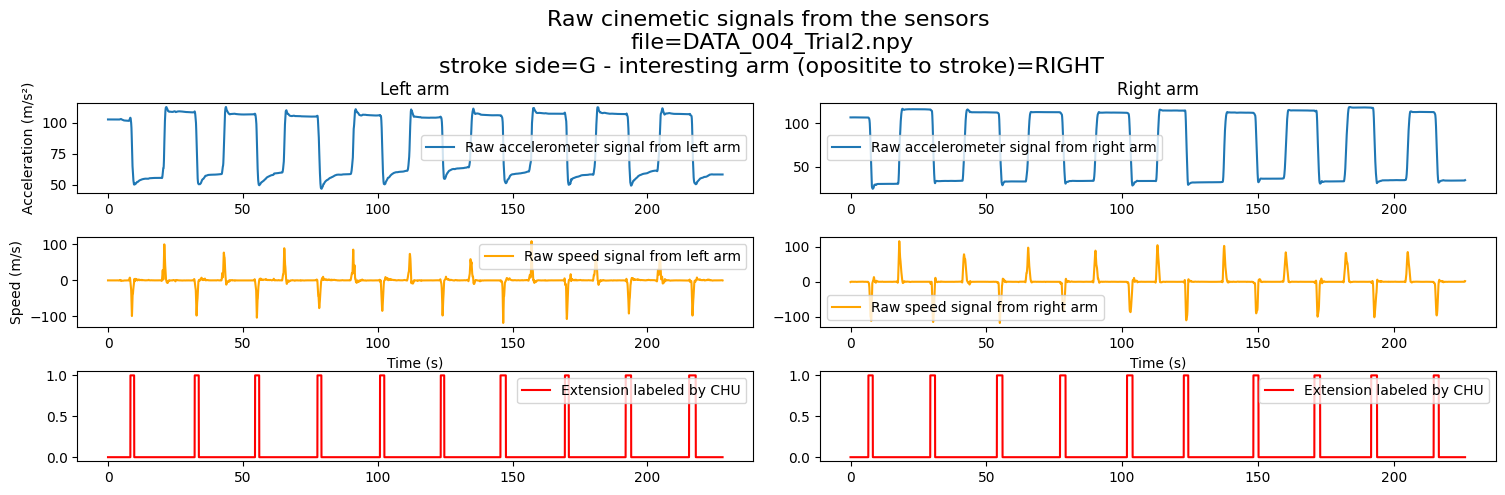

In [76]:
file = FILE_PATH_LIST[8]
data_loader = DataLoader(file)
stroke = data_loader.stroke_side
arm_side = 'LEFT' if stroke == 'D' else 'RIGHT'

fig, ax = plt.subplots(3, 2, figsize=(15, 5))
fig.suptitle(f'Raw cinemetic signals from the sensors \nfile={file.split("/")[-1]}\nstroke side={stroke} - interesting arm (opositite to stroke)={arm_side}', fontsize=16)
fig.tight_layout()

ax[0,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['AC'])) /125, data_loader.cinematic_signals_left_arm['AC'], label='Raw accelerometer signal from left arm')
ax[0,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['AC'])) /125, data_loader.cinematic_signals_right_arm['AC'], label='Raw accelerometer signal from right arm')
ax[1,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['VAC'])) /125, data_loader.cinematic_signals_left_arm['VAC'], label='Raw speed signal from left arm', c='orange')
ax[1,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['VAC'])) /125, data_loader.cinematic_signals_right_arm['VAC'], label='Raw speed signal from right arm', c='orange')
movement_chu_labeled_left = np.zeros(len(data_loader.cinematic_signals_left_arm['VAC']))
movement_chu_labeled_left[data_loader.movement_index_left_arm] = 1
movement_chu_labeled_right = np.zeros(len(data_loader.cinematic_signals_right_arm['VAC']))
movement_chu_labeled_right[data_loader.movement_index_right_arm] = 1
ax[2,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['VAC'])) /125, movement_chu_labeled_left, label='Extension labeled by CHU', c='red')
ax[2,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['VAC'])) /125, movement_chu_labeled_right, label='Extension labeled by CHU', c='red')

ax[0,0].set_title('Left arm')
ax[0,1].set_title('Right arm')
ax[0,0].set_ylabel('Acceleration (m/s²)')
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_ylabel('Speed (m/s)')
ax[1,1].set_xlabel('Time (s)')
[ax[i,j].legend() for i in range(3) for j in range(2)]

plt.show()


## Goal
The goal of this notebook is to create a method to label both flexion (label 2) and extension (label 1) as well as no movement (label 0) for the data provided by the CHU.
1. To have a hand on the labelling process.
2. To have both labels for flexion and extension.

## Challenge
- Some data are cinematic data are missing.
- Some signals are (very) noisy.

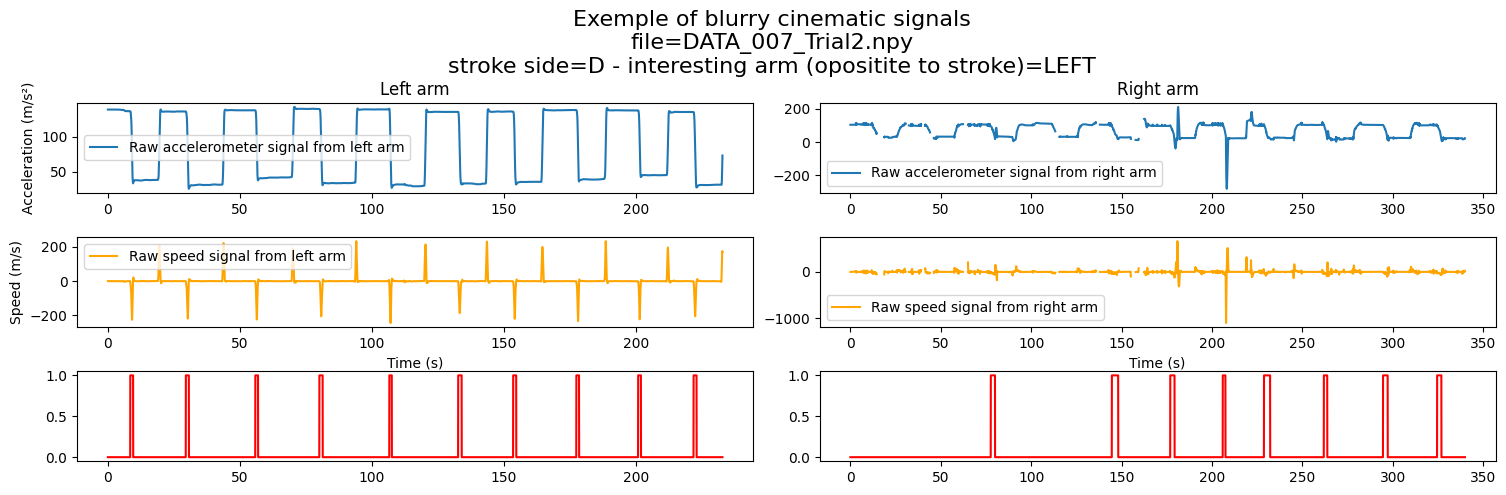

In [77]:
file = FILE_PATH_LIST[14]
data_loader = DataLoader(file)
stroke = data_loader.stroke_side
arm_side = 'LEFT' if stroke == 'D' else 'RIGHT'

fig, ax = plt.subplots(3, 2, figsize=(15, 5))
fig.suptitle(f'Exemple of blurry cinematic signals\nfile={file.split("/")[-1]}\nstroke side={stroke} - interesting arm (opositite to stroke)={arm_side}', fontsize=16)
fig.tight_layout()

ax[0,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['AC'])) /125, data_loader.cinematic_signals_left_arm['AC'], label='Raw accelerometer signal from left arm')
ax[0,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['AC'])) /125, data_loader.cinematic_signals_right_arm['AC'], label='Raw accelerometer signal from right arm')
ax[1,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['VAC'])) /125, data_loader.cinematic_signals_left_arm['VAC'], label='Raw speed signal from left arm', c='orange')
ax[1,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['VAC'])) /125, data_loader.cinematic_signals_right_arm['VAC'], label='Raw speed signal from right arm', c='orange')
movement_chu_labeled_left = np.zeros(len(data_loader.cinematic_signals_left_arm['VAC']))
movement_chu_labeled_left[data_loader.movement_index_left_arm] = 1
movement_chu_labeled_right = np.zeros(len(data_loader.cinematic_signals_right_arm['VAC']))
movement_chu_labeled_right[data_loader.movement_index_right_arm] = 1
ax[2,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['VAC'])) /125, movement_chu_labeled_left, label='Extension labeled by CHU', c='red')
ax[2,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['VAC'])) /125, movement_chu_labeled_right, label='Extension labeled by CHU', c='red')

ax[0,0].set_title('Left arm')
ax[0,1].set_title('Right arm')
ax[0,0].set_ylabel('Acceleration (m/s²)')
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_ylabel('Speed (m/s)')
ax[1,1].set_xlabel('Time (s)')
[ax[i,j].legend() for i in range(2) for j in range(2)]

plt.show()

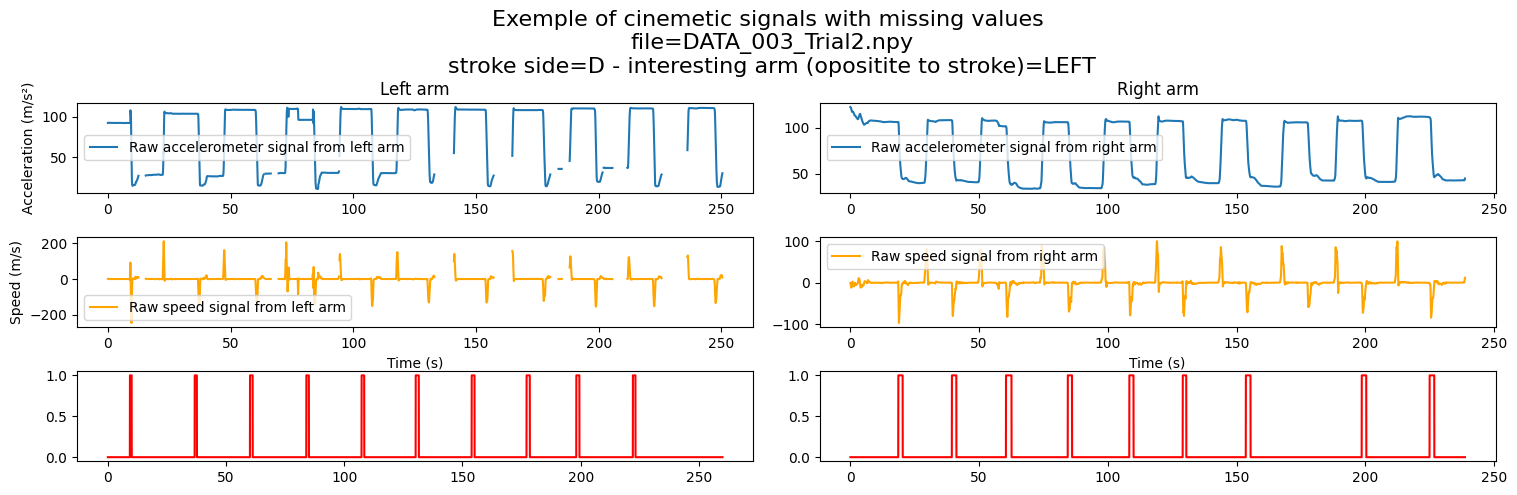

In [78]:
file = FILE_PATH_LIST[6]
data_loader = DataLoader(file)
stroke = data_loader.stroke_side
arm_side = 'LEFT' if stroke == 'D' else 'RIGHT'

fig, ax = plt.subplots(3, 2, figsize=(15, 5))
fig.suptitle(f'Exemple of cinemetic signals with missing values \nfile={file.split("/")[-1]}\nstroke side={stroke} - interesting arm (opositite to stroke)={arm_side}', fontsize=16)
fig.tight_layout()

ax[0,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['AC'])) /125, data_loader.cinematic_signals_left_arm['AC'], label='Raw accelerometer signal from left arm')
ax[0,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['AC'])) /125, data_loader.cinematic_signals_right_arm['AC'], label='Raw accelerometer signal from right arm')
ax[1,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['VAC'])) /125, data_loader.cinematic_signals_left_arm['VAC'], label='Raw speed signal from left arm', c='orange')
ax[1,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['VAC'])) /125, data_loader.cinematic_signals_right_arm['VAC'], label='Raw speed signal from right arm', c='orange')
movement_chu_labeled_left = np.zeros(len(data_loader.cinematic_signals_left_arm['VAC']))
movement_chu_labeled_left[data_loader.movement_index_left_arm] = 1
movement_chu_labeled_right = np.zeros(len(data_loader.cinematic_signals_right_arm['VAC']))
movement_chu_labeled_right[data_loader.movement_index_right_arm] = 1
ax[2,0].plot(np.arange(len(data_loader.cinematic_signals_left_arm['VAC'])) /125, movement_chu_labeled_left, label='Extension labeled by CHU', c='red')
ax[2,1].plot(np.arange(len(data_loader.cinematic_signals_right_arm['VAC'])) /125, movement_chu_labeled_right, label='Extension labeled by CHU', c='red')

ax[0,0].set_title('Left arm')
ax[0,1].set_title('Right arm')
ax[0,0].set_ylabel('Acceleration (m/s²)')
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_ylabel('Speed (m/s)')
ax[1,1].set_xlabel('Time (s)')
[ax[i,j].legend() for i in range(2) for j in range(2)]

plt.show()


## Method
The method is based on the following assumption:
- The movement of the arm is done in a single direction (flexion or extension) at a time

The method is based on the following steps:
0. Replace NAN values by their last non NAN value
1. Smoothing the acceleration data by assigning either a max or min value to each point of the acceleration data (to get a perfectly square signal).
Using a simple comparision between each poit with the mean of the signal
2. Finding the index of each transition between the max and min value
3. Assigning the label 1 to the data between each transition max to min and 2 for min to max, assigning the label 0 to the rest of the data
4. Removing labels that are too close to each other (less than 5 s), keeping only the first of a close serie of labels

In [2]:
# Functions used to process the accelerometer data and extract the labels

# 1. Filling missing values with the last non-nan value
def fill_with_last_non_nan(array):
    last_valid = None
    for i in range(len(array)):
        if not np.isnan(array[i]):
            last_valid = array[i]
        else:
            array[i] = last_valid
    return array

# 2. Smoothing the signal and labeling the movements
def acc_to_movement(acc):
    new_acc_smoothed = np.zeros(acc.shape)
    med = np.mean(acc)
    new_acc_smoothed[acc > med] = 1
    movement_new = np.zeros(new_acc_smoothed.shape)
    movement_new[1:] = new_acc_smoothed[:-1]
    movement_new = movement_new - new_acc_smoothed
    movement_new[0] = 0
    movement_new[movement_new == -1] = 2
    return movement_new

# 3. Removing the labels that are too close to each other
def remove_close_labels(data, threshold_step=5*1024, reverse=True):
    if reverse:
        data = data[::-1]
    for i in range(len(data)):
        if data[i:i+threshold_step].sum() > 2:
            data[i:i+threshold_step] = 0
    if reverse:
        data = data[::-1]
    return data

def remove_close_labels_all(data, threshold_step=5*1024):
    data_reverse = data[::-1]
    for i in range(len(data)):
        if data[i:i+threshold_step].sum() > 2:
            data[i:i+threshold_step] = 0
    for i in range(len(data_reverse)):
        if data_reverse[i:i+threshold_step].sum() > 2:
            data_reverse[i:i+threshold_step] = 0
    data_reverse = data_reverse[::-1]
    data_sum = data - data_reverse
    data_to_remove = data_sum != 0
    data[data_to_remove] = 0
    return data


## Applying the method on all the data and observing the results

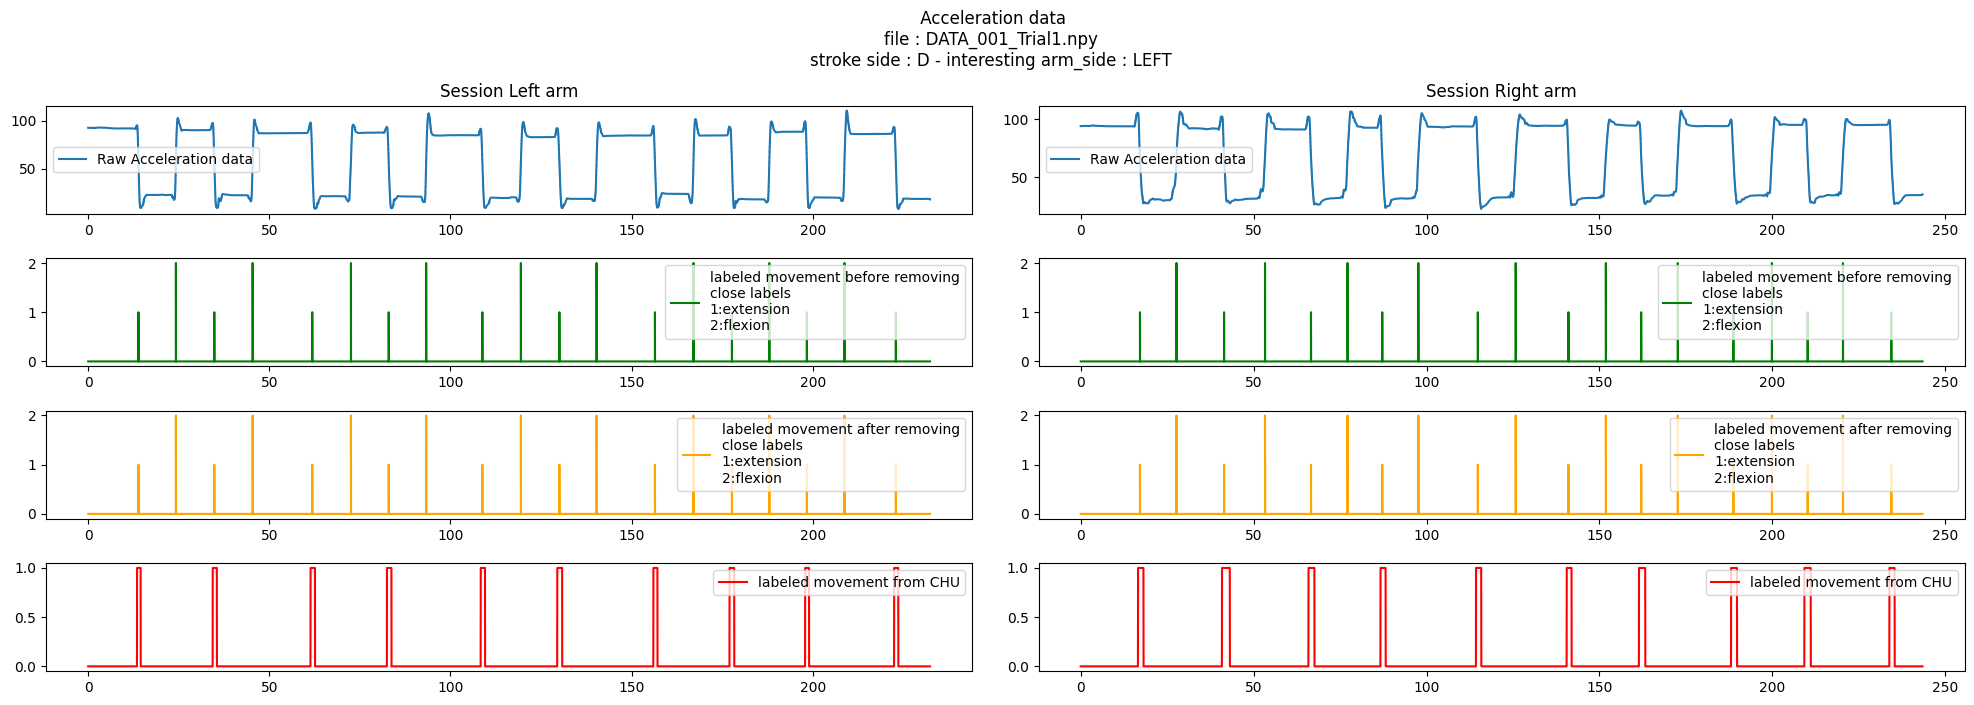

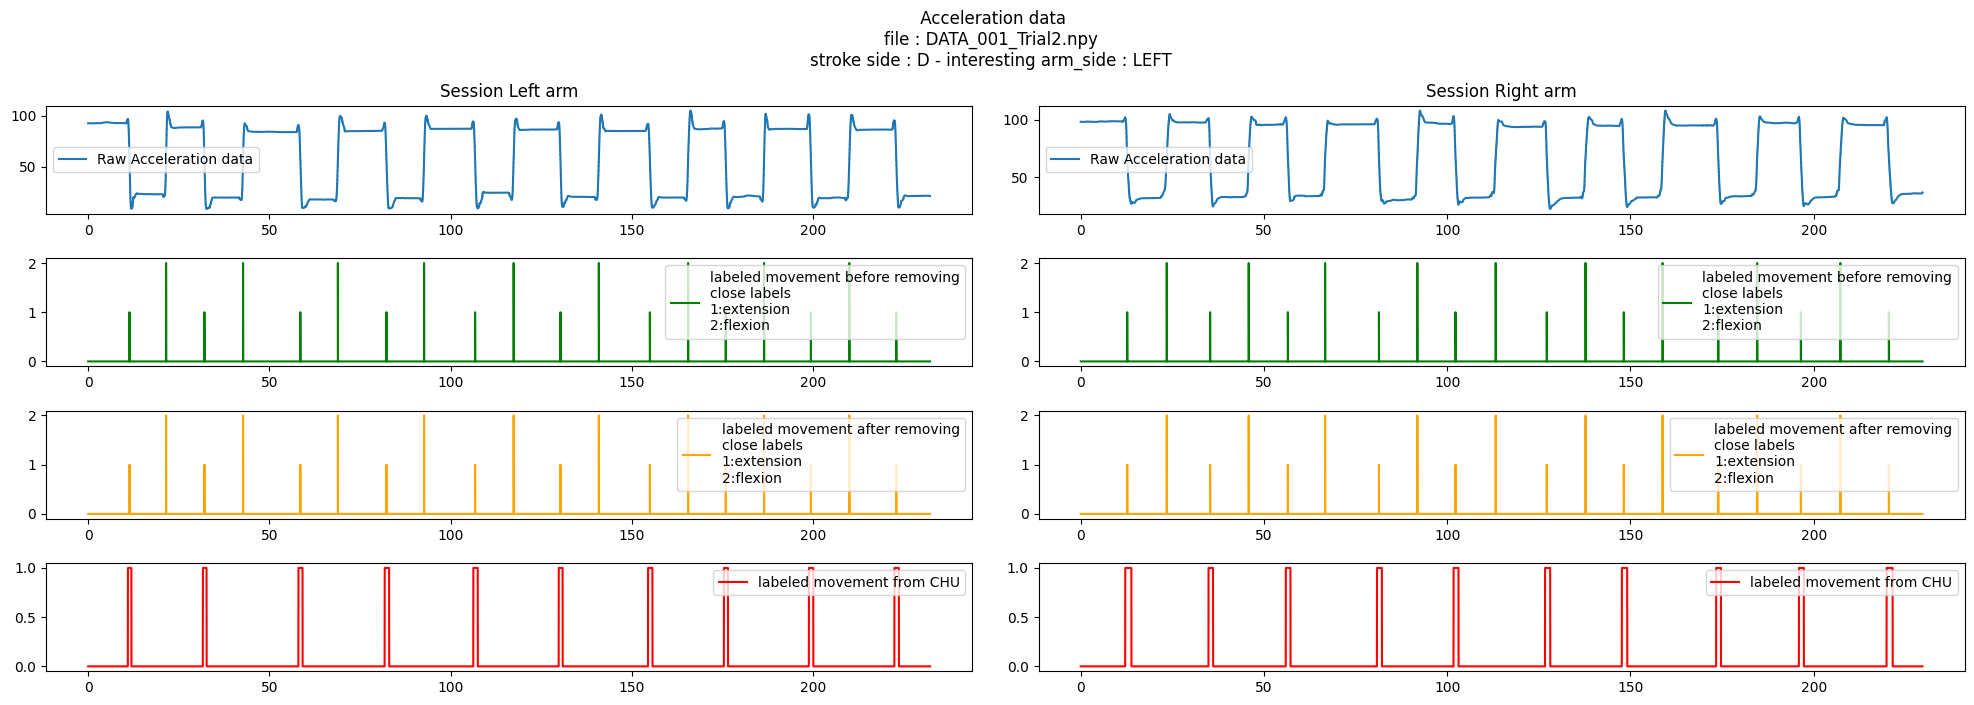

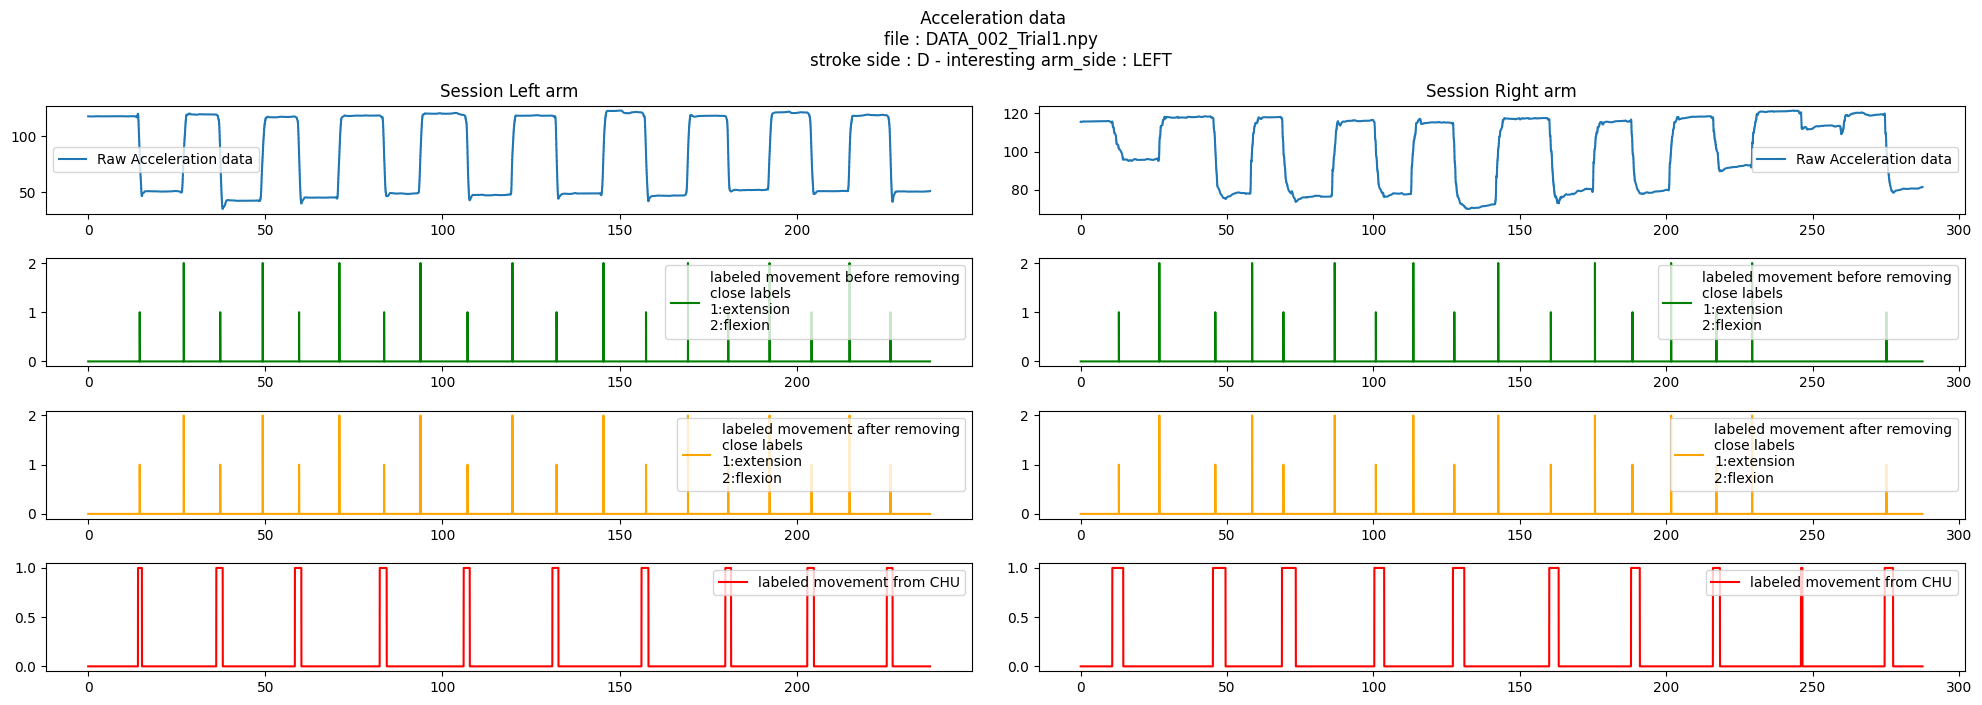

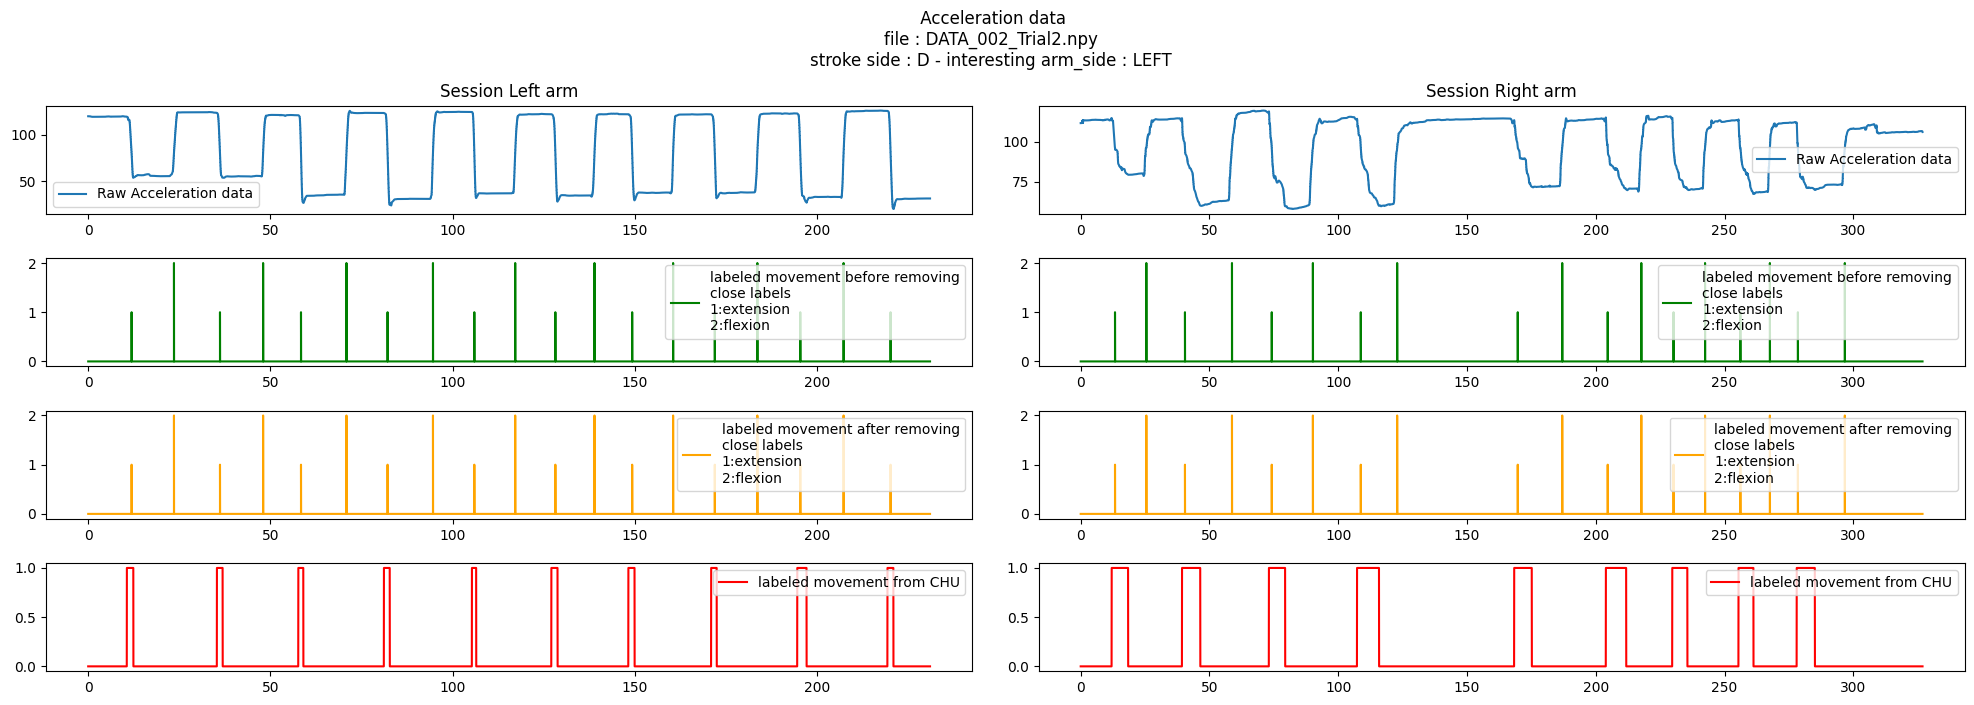

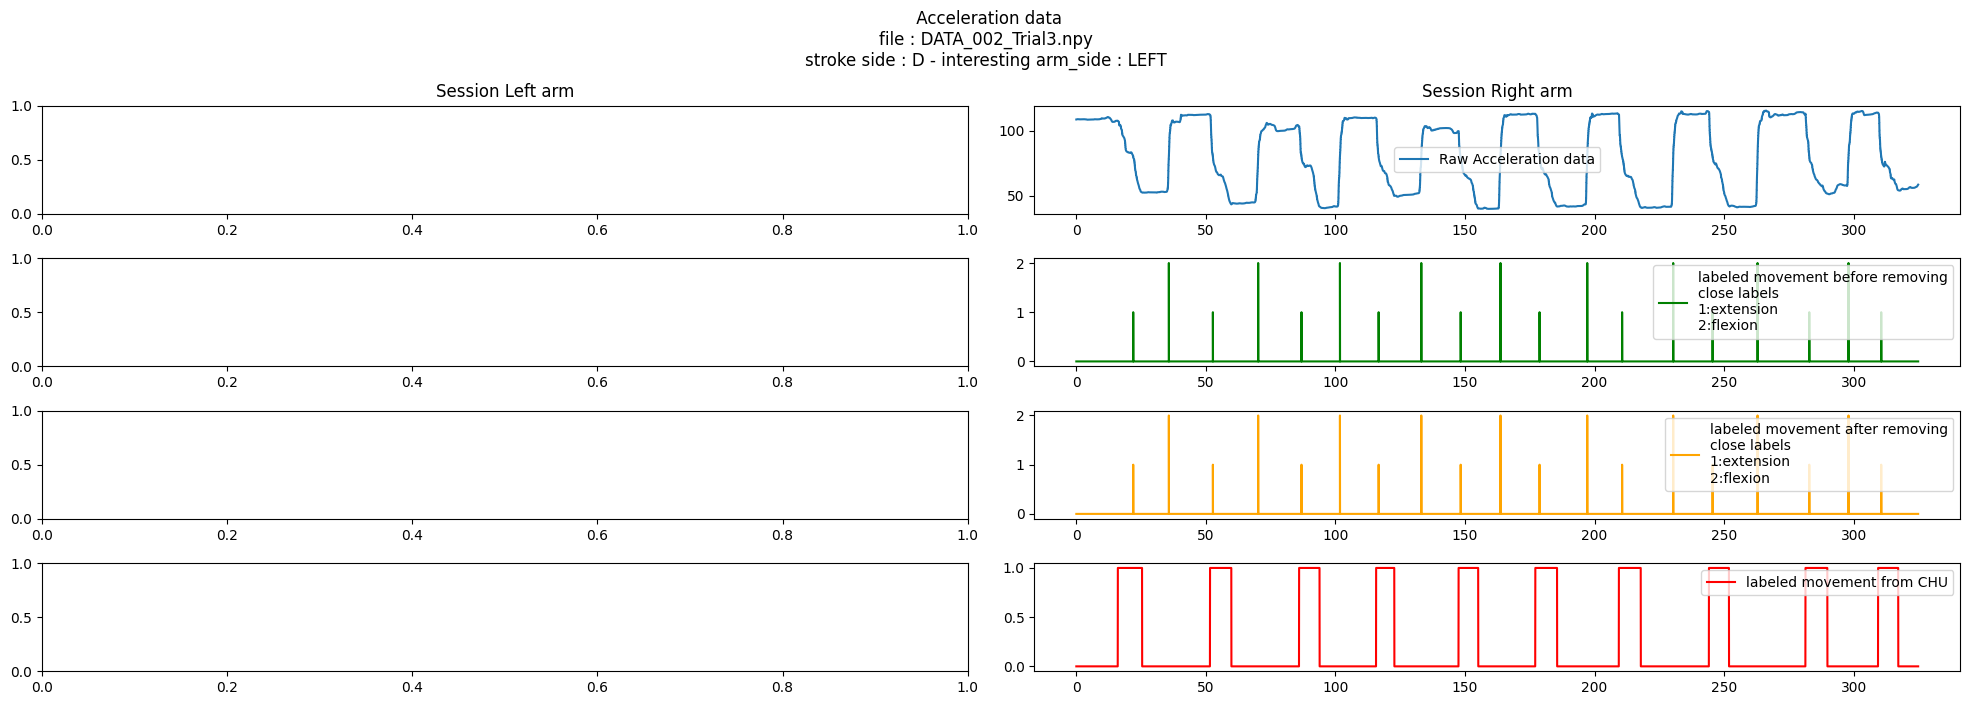

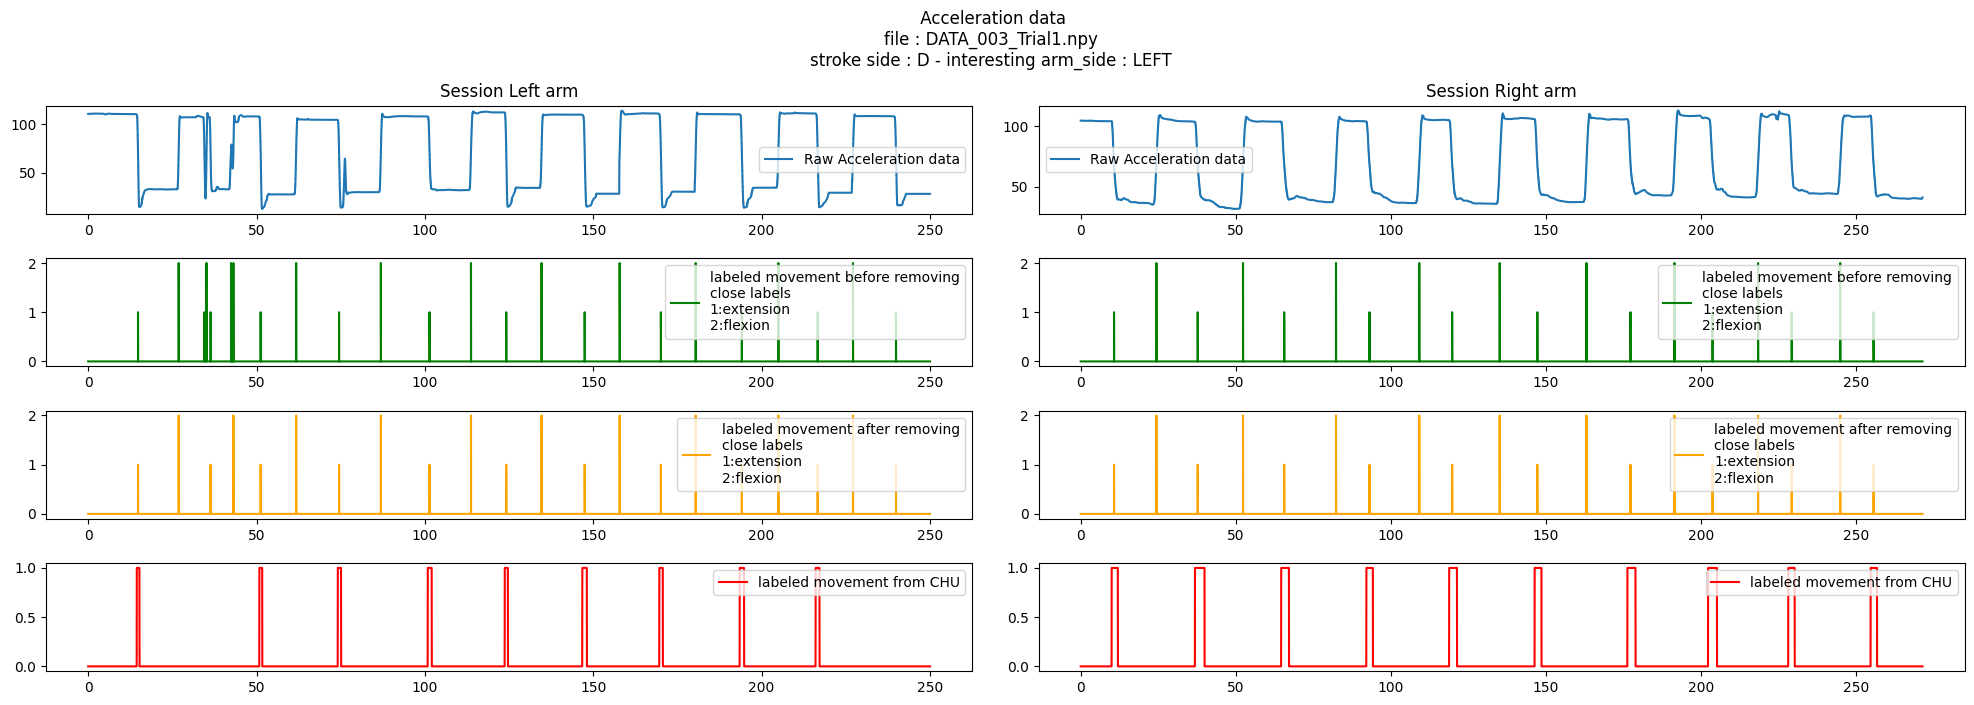

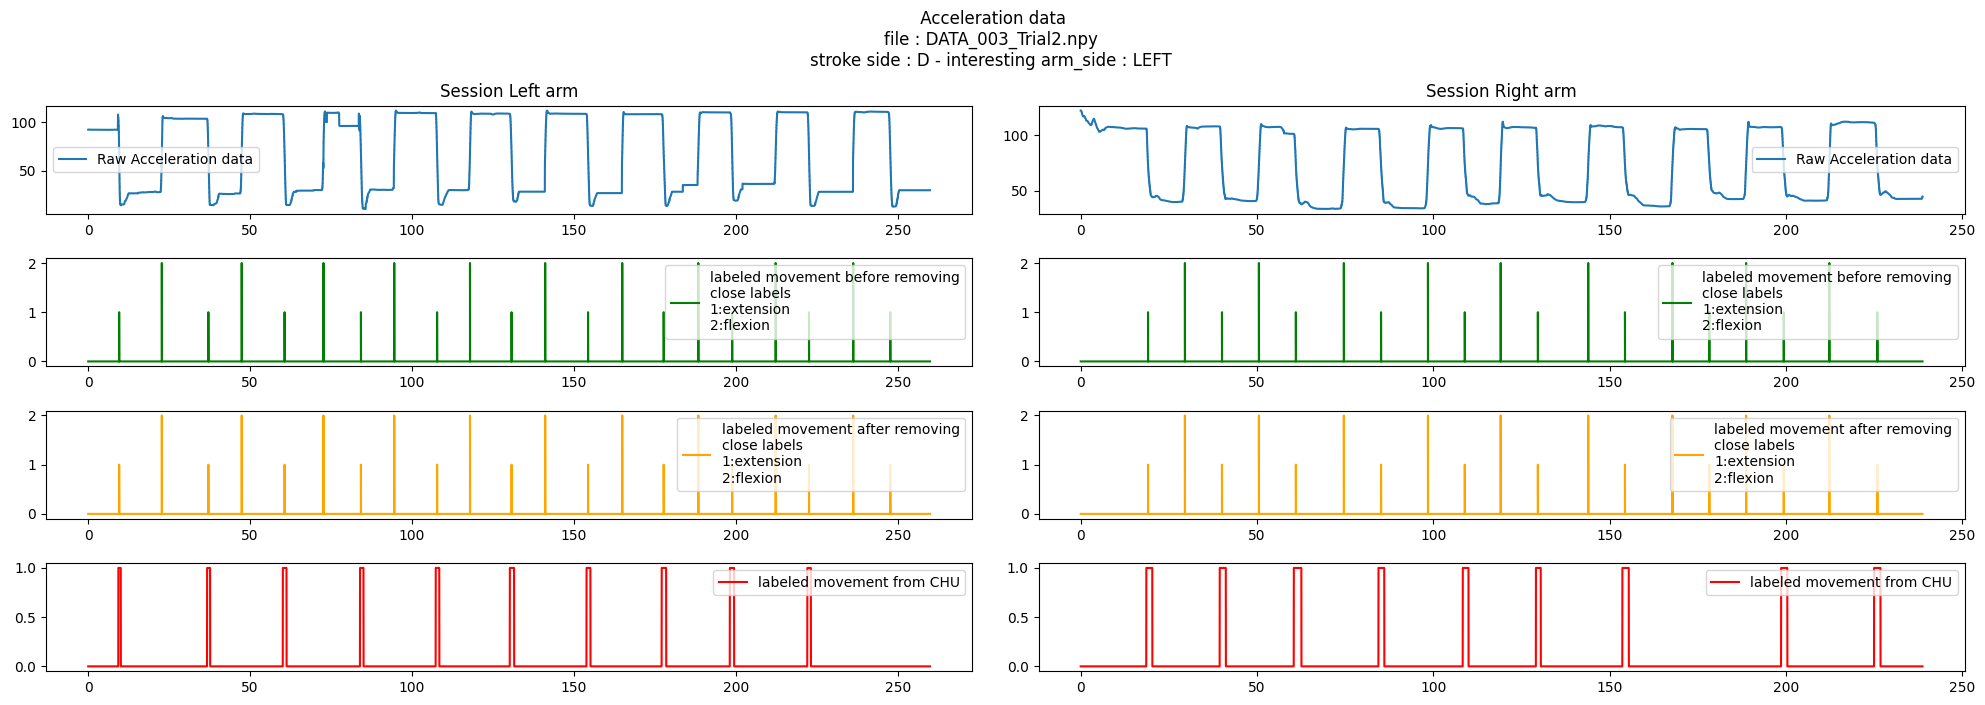

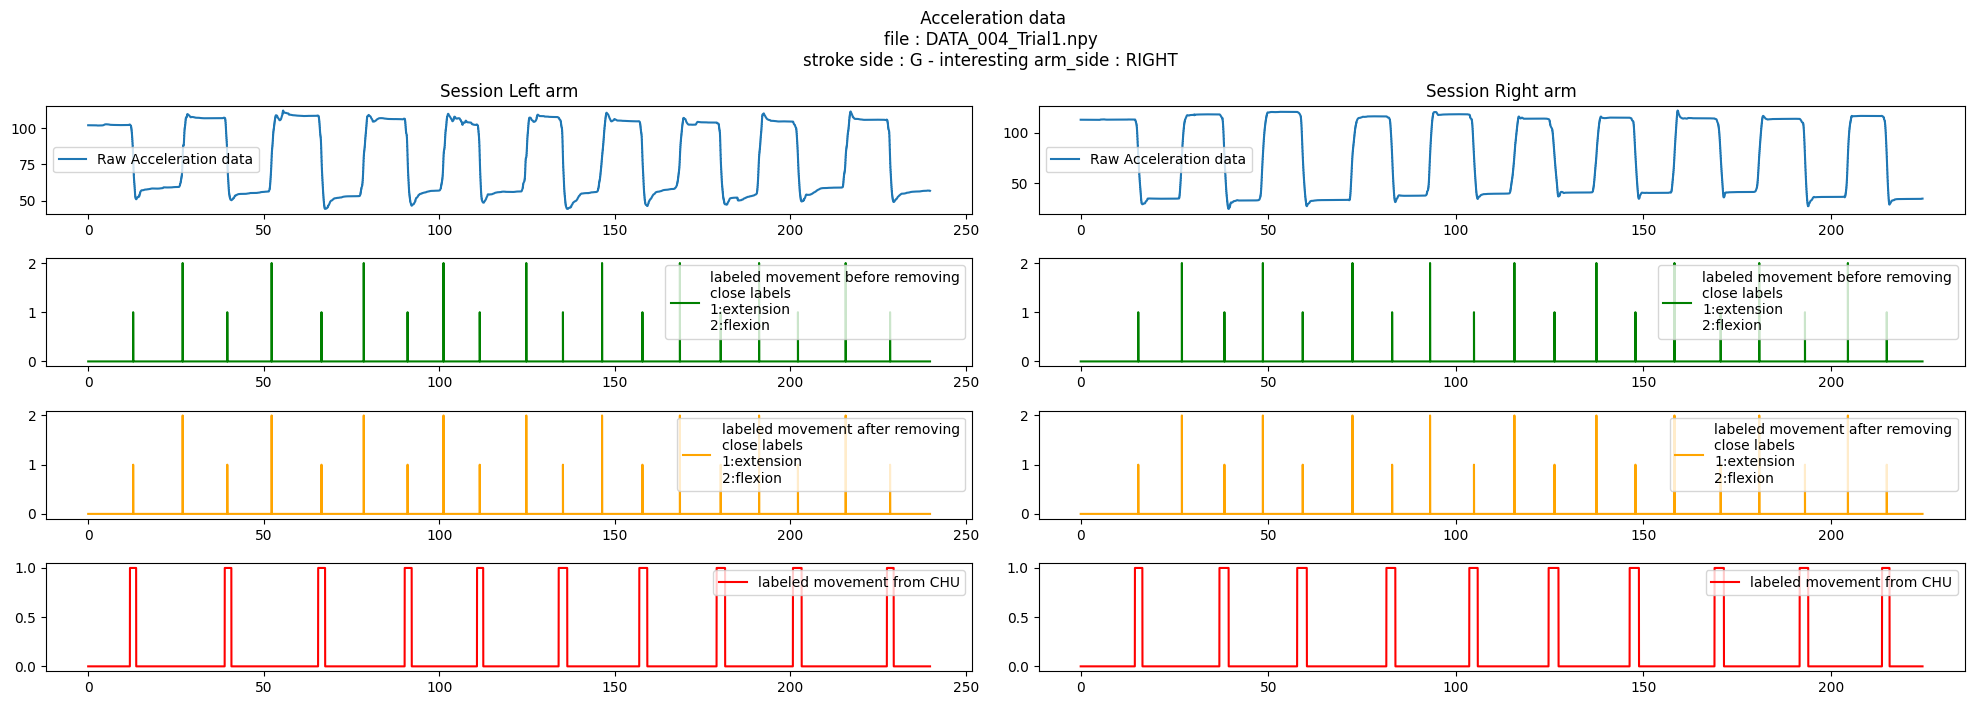

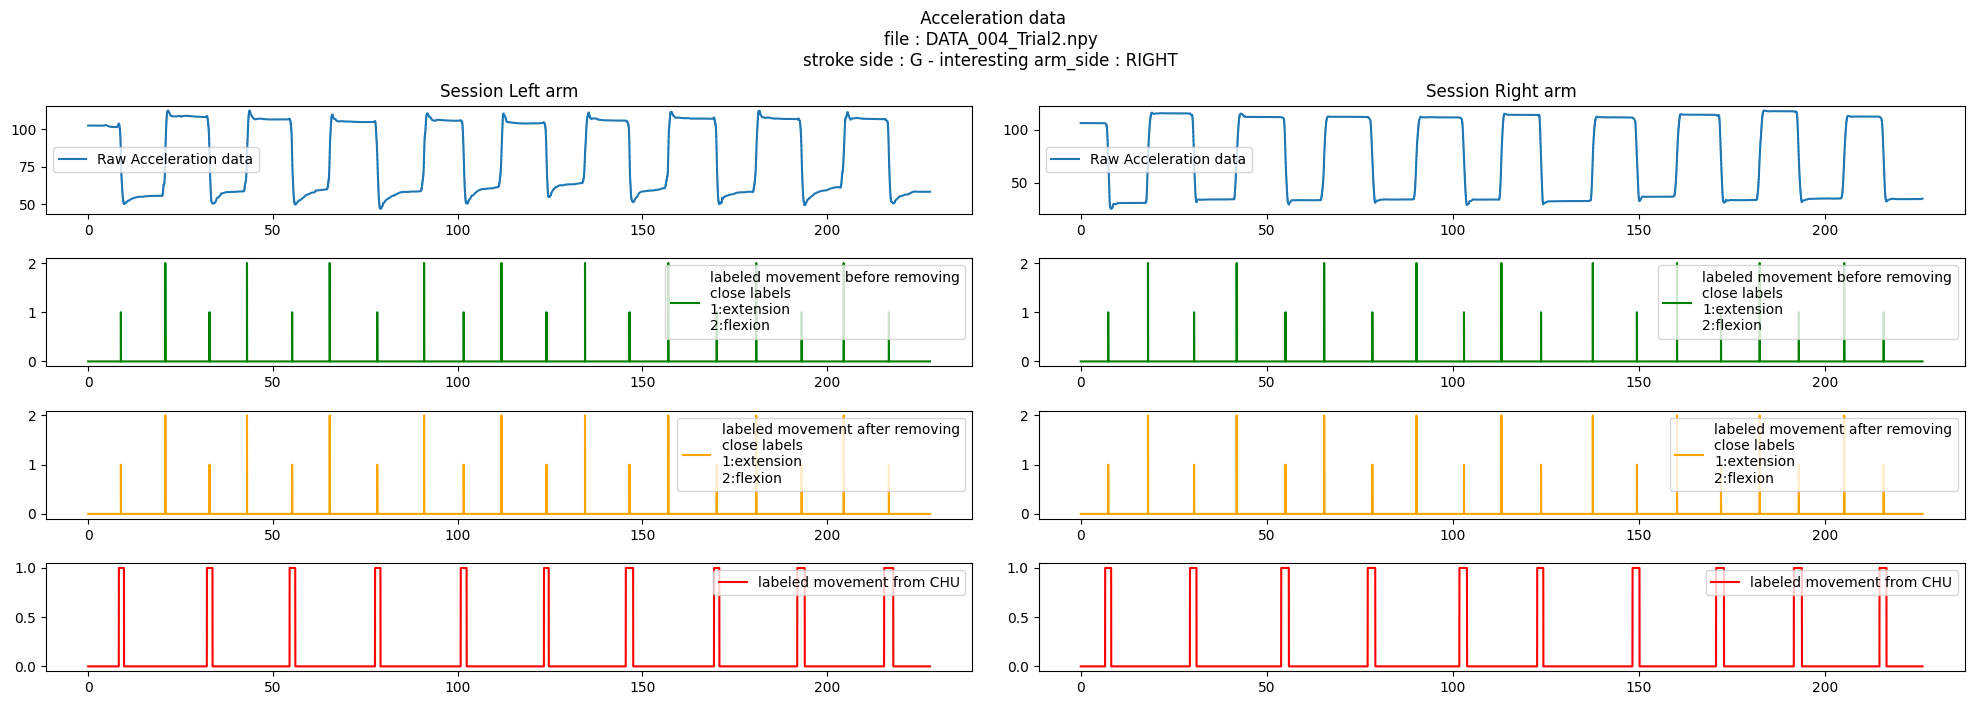

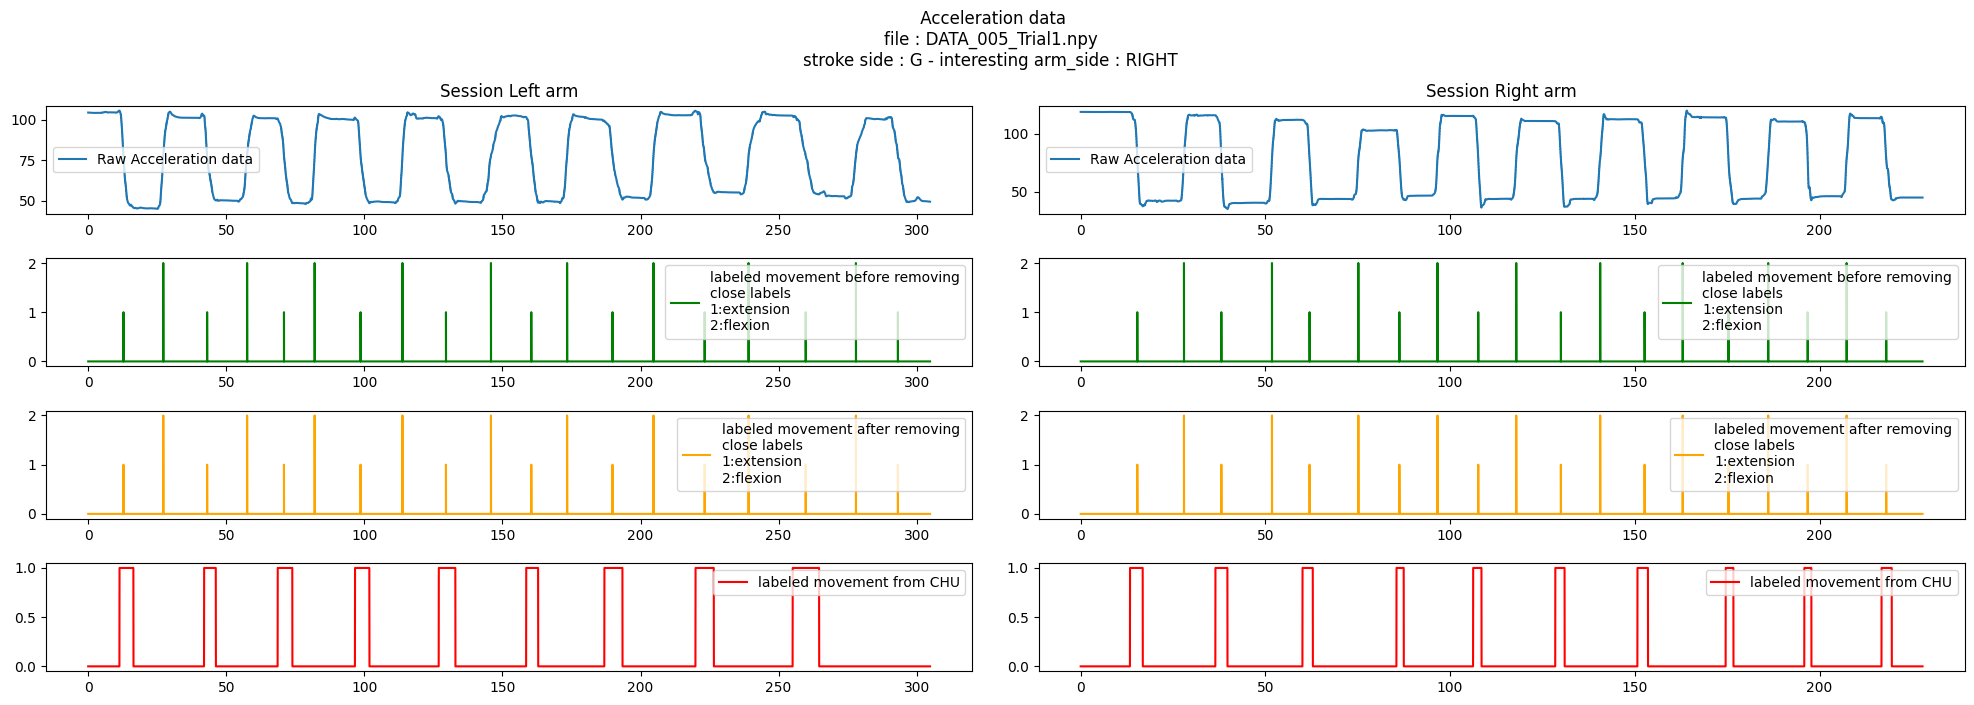

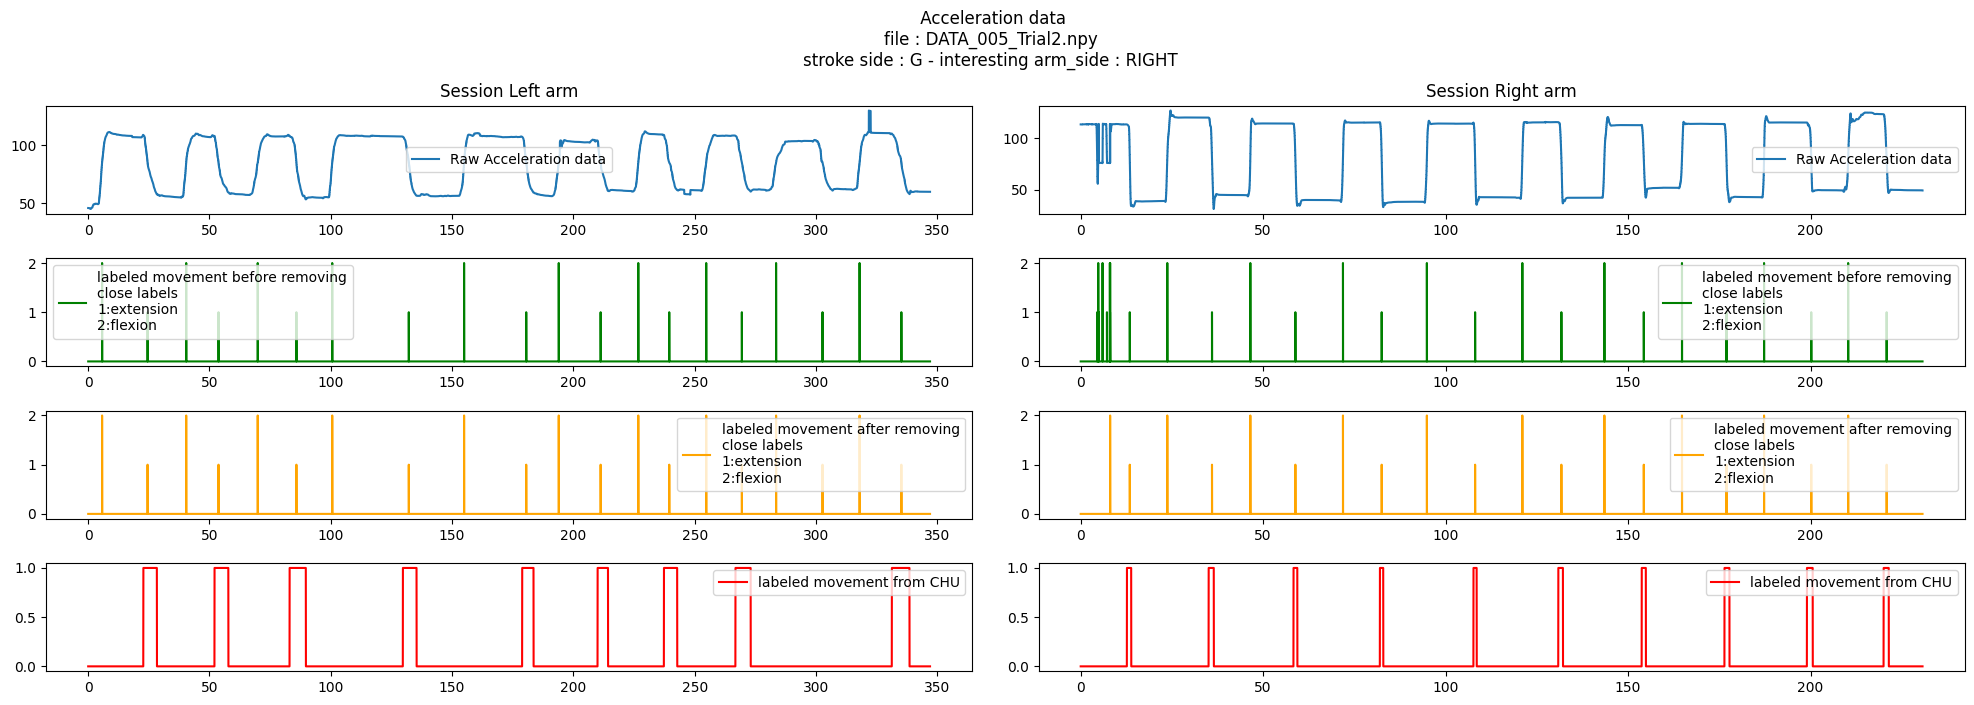

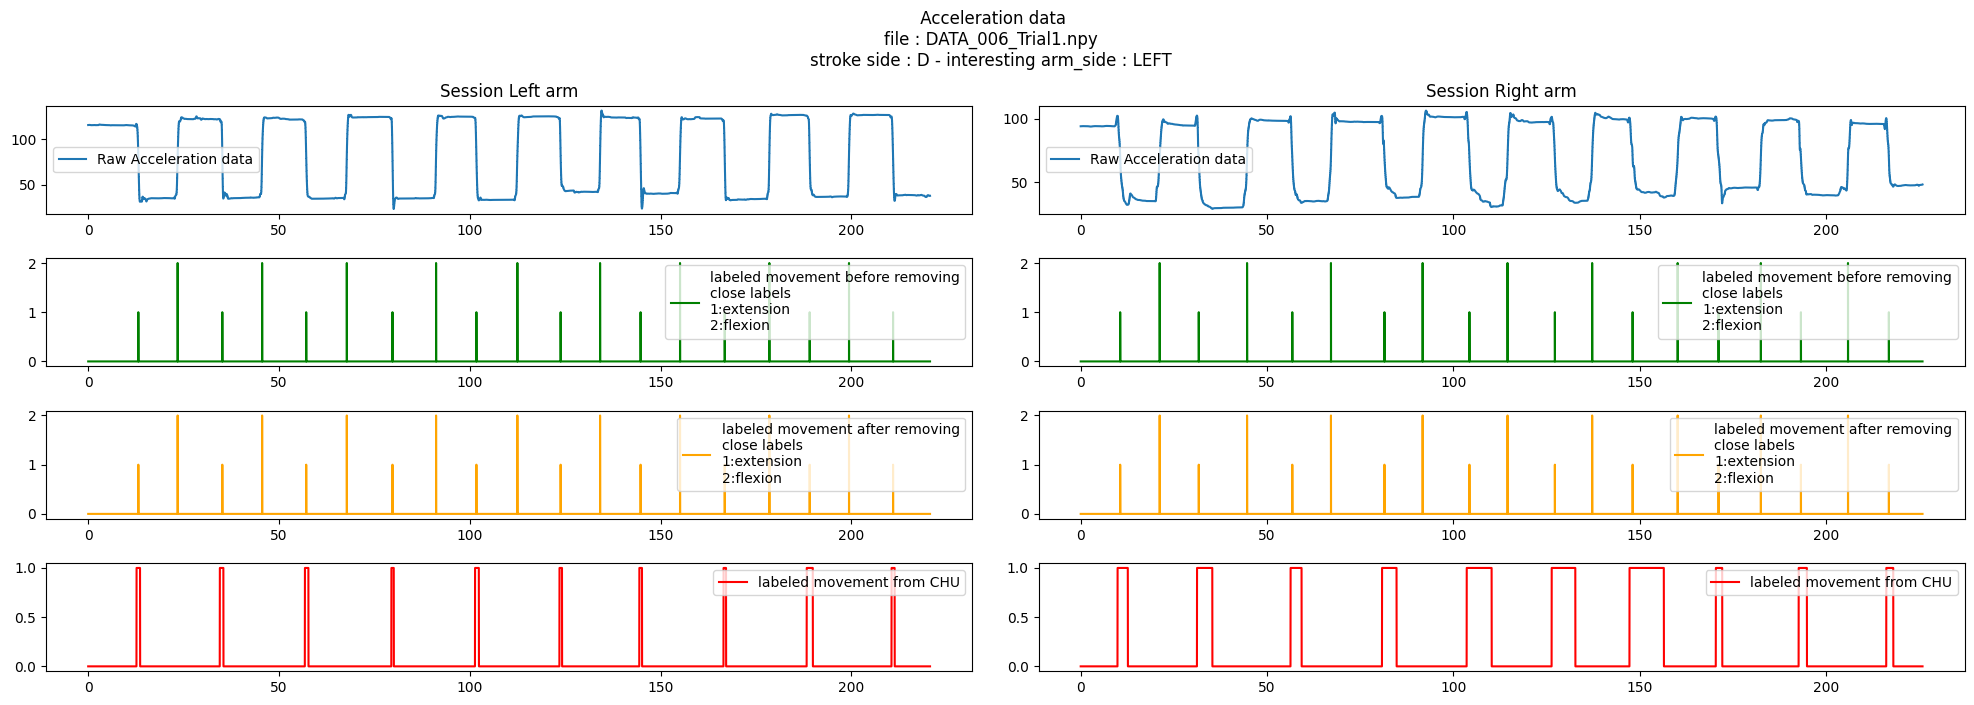

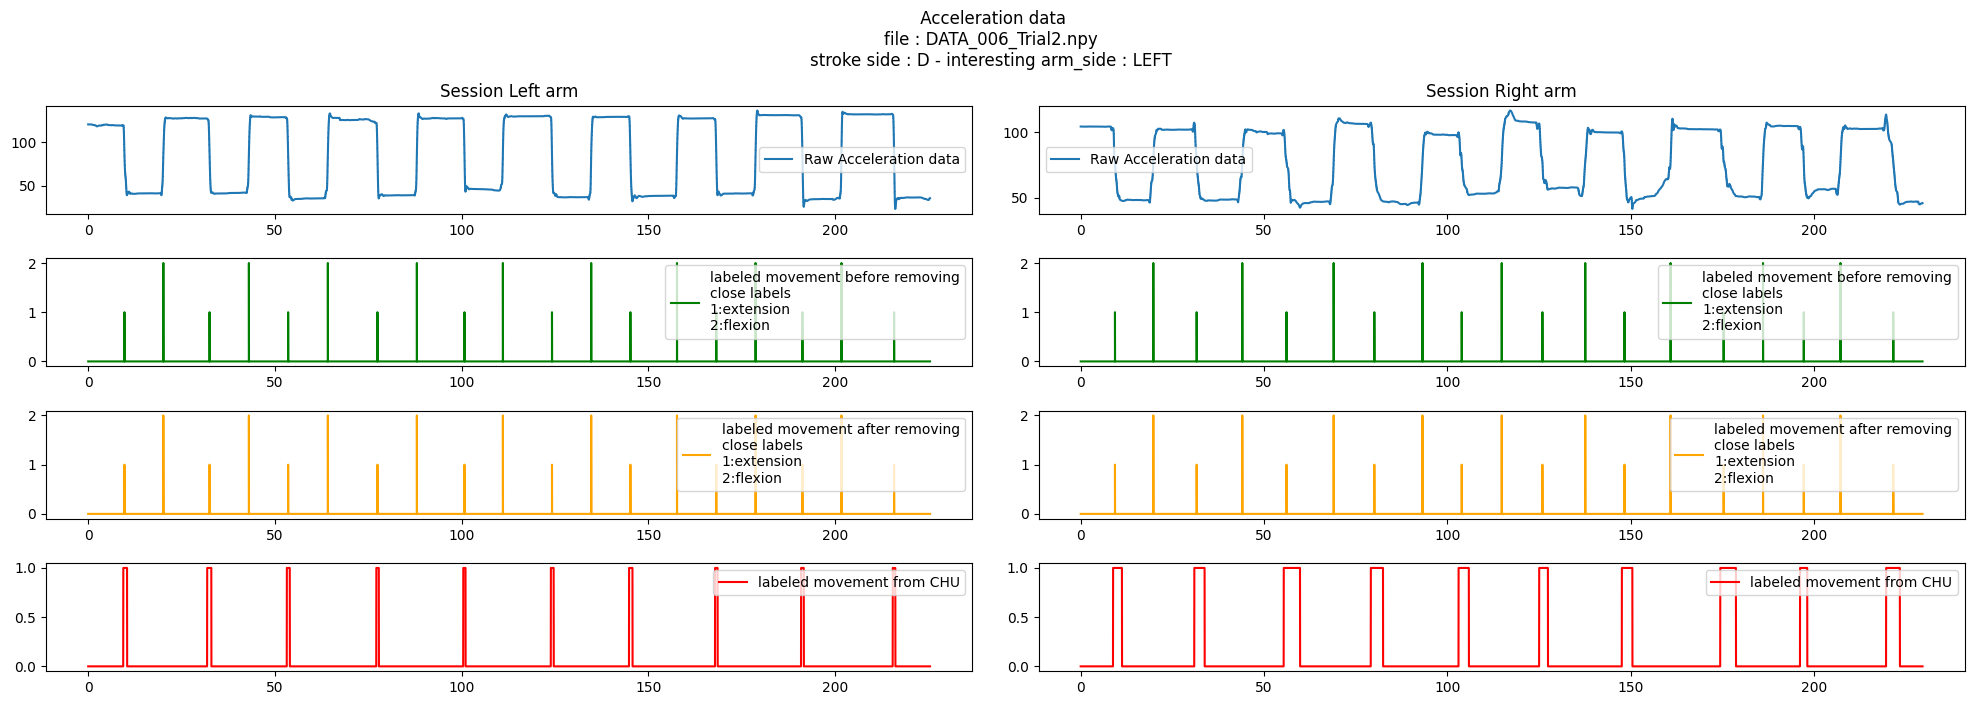

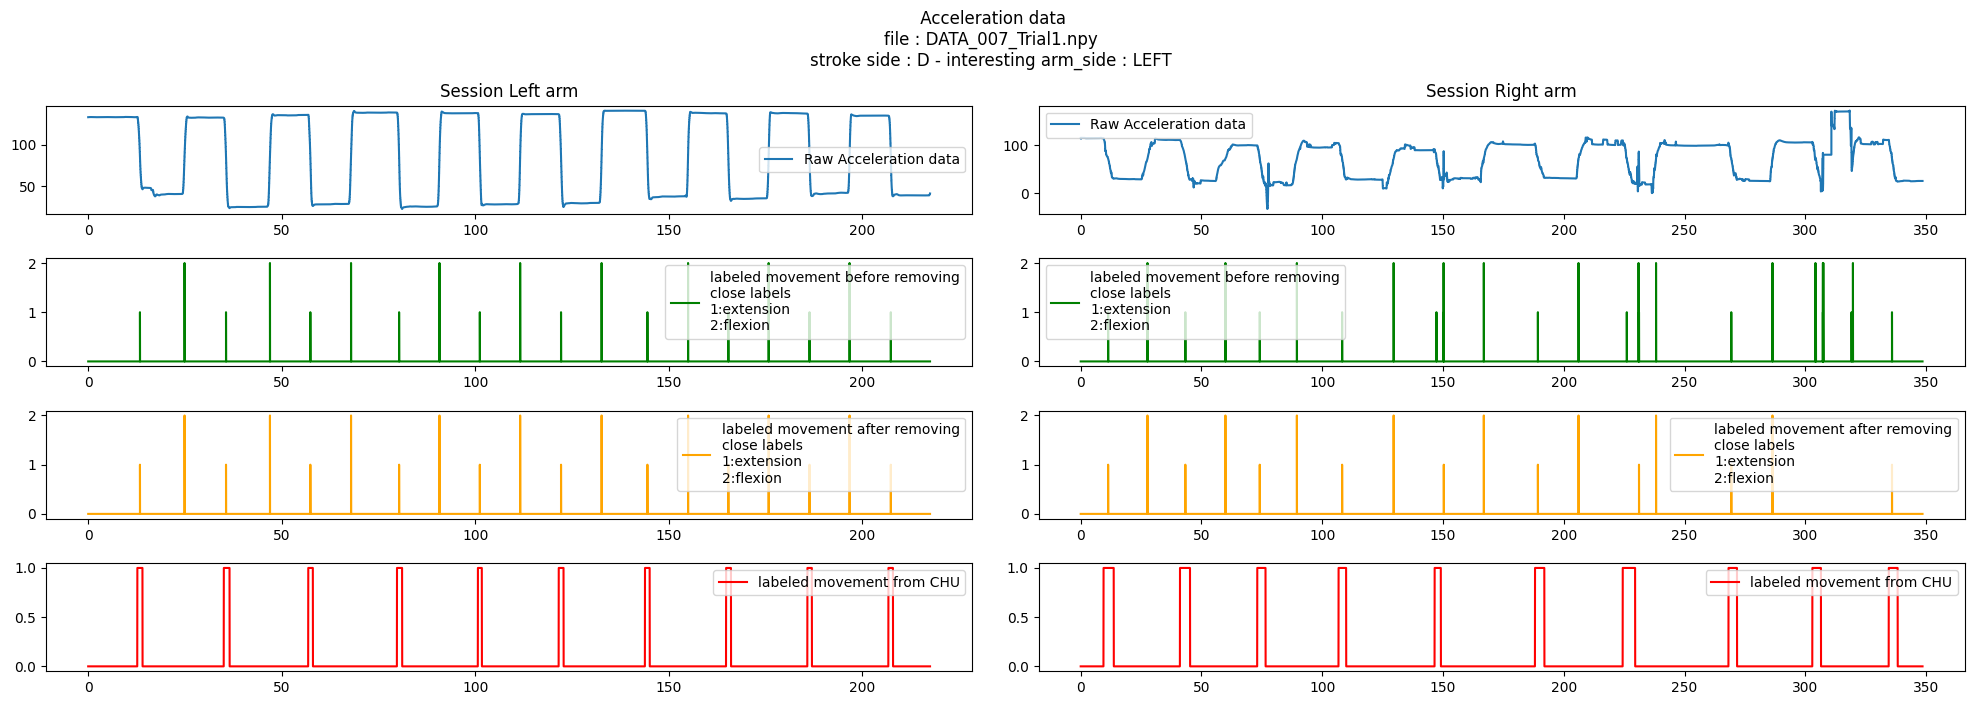

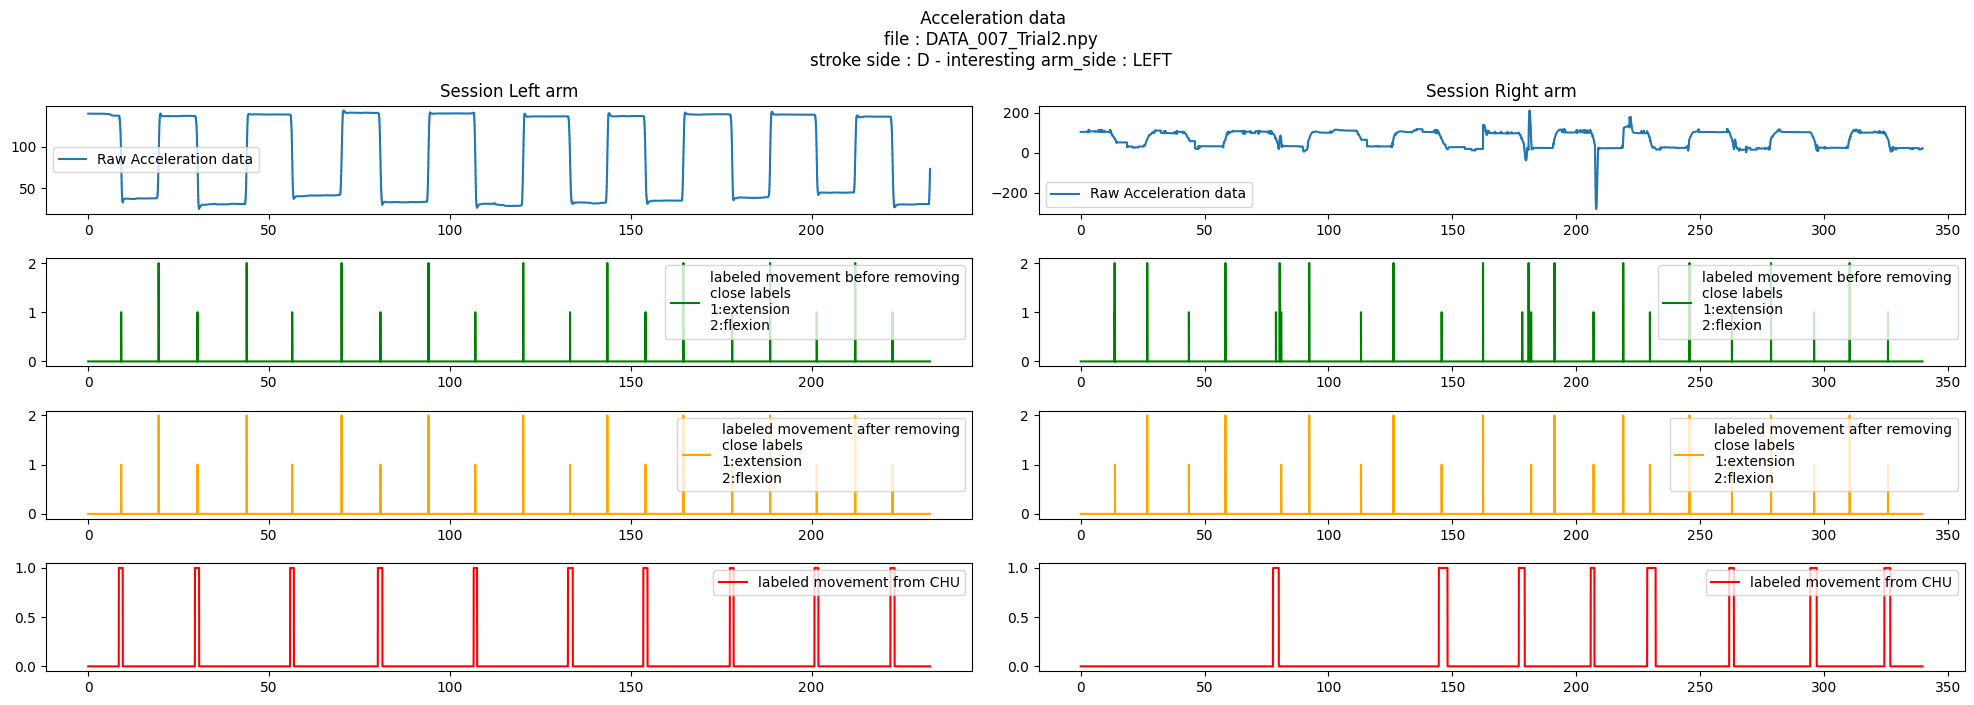

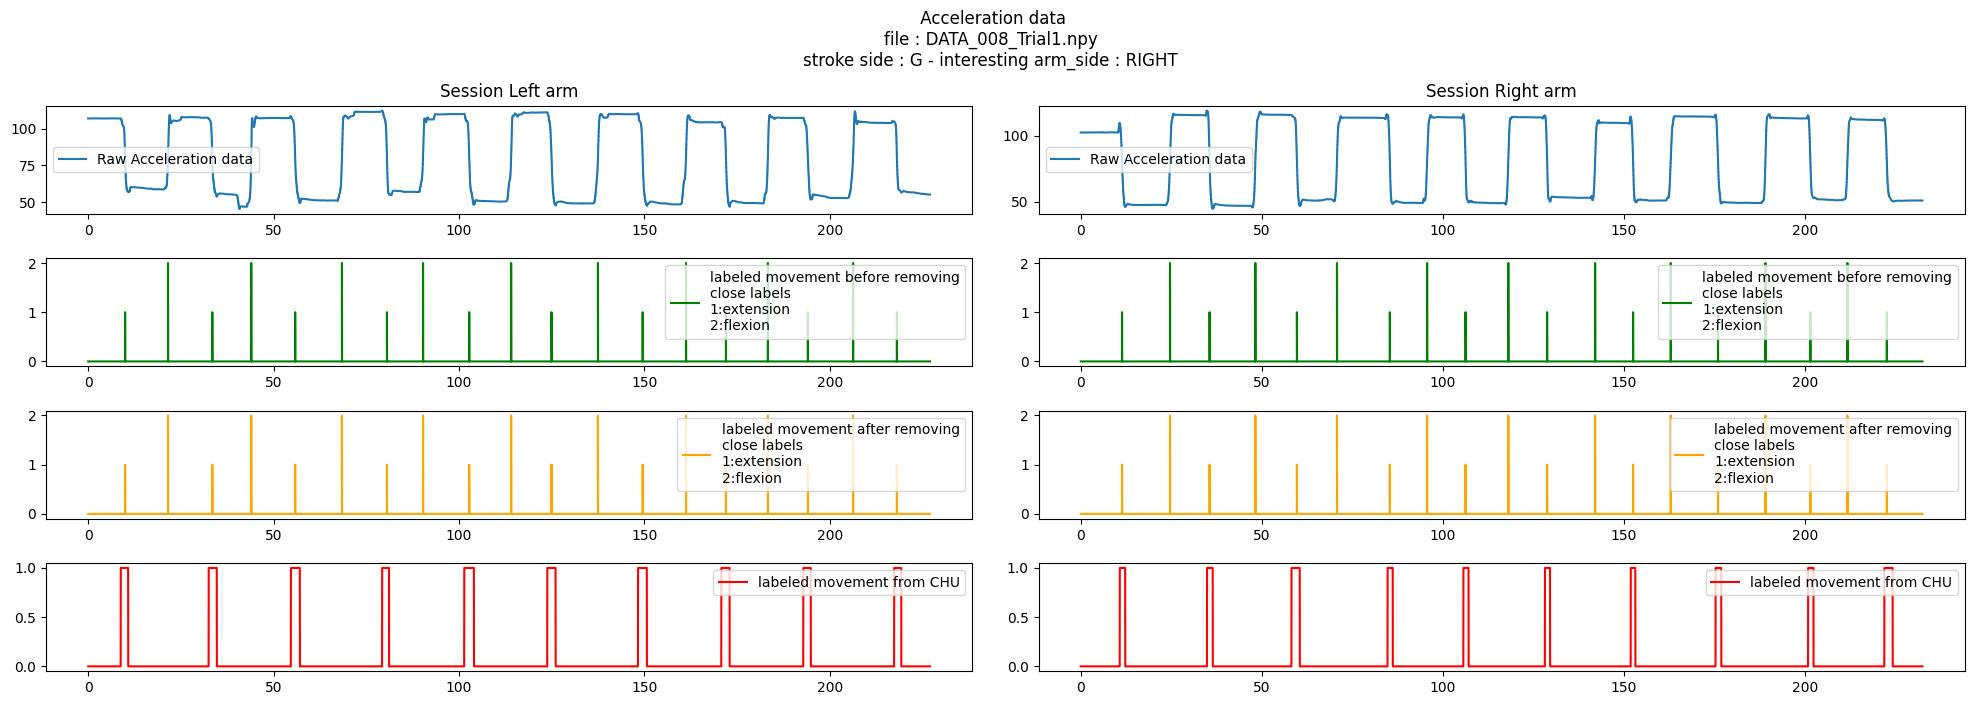

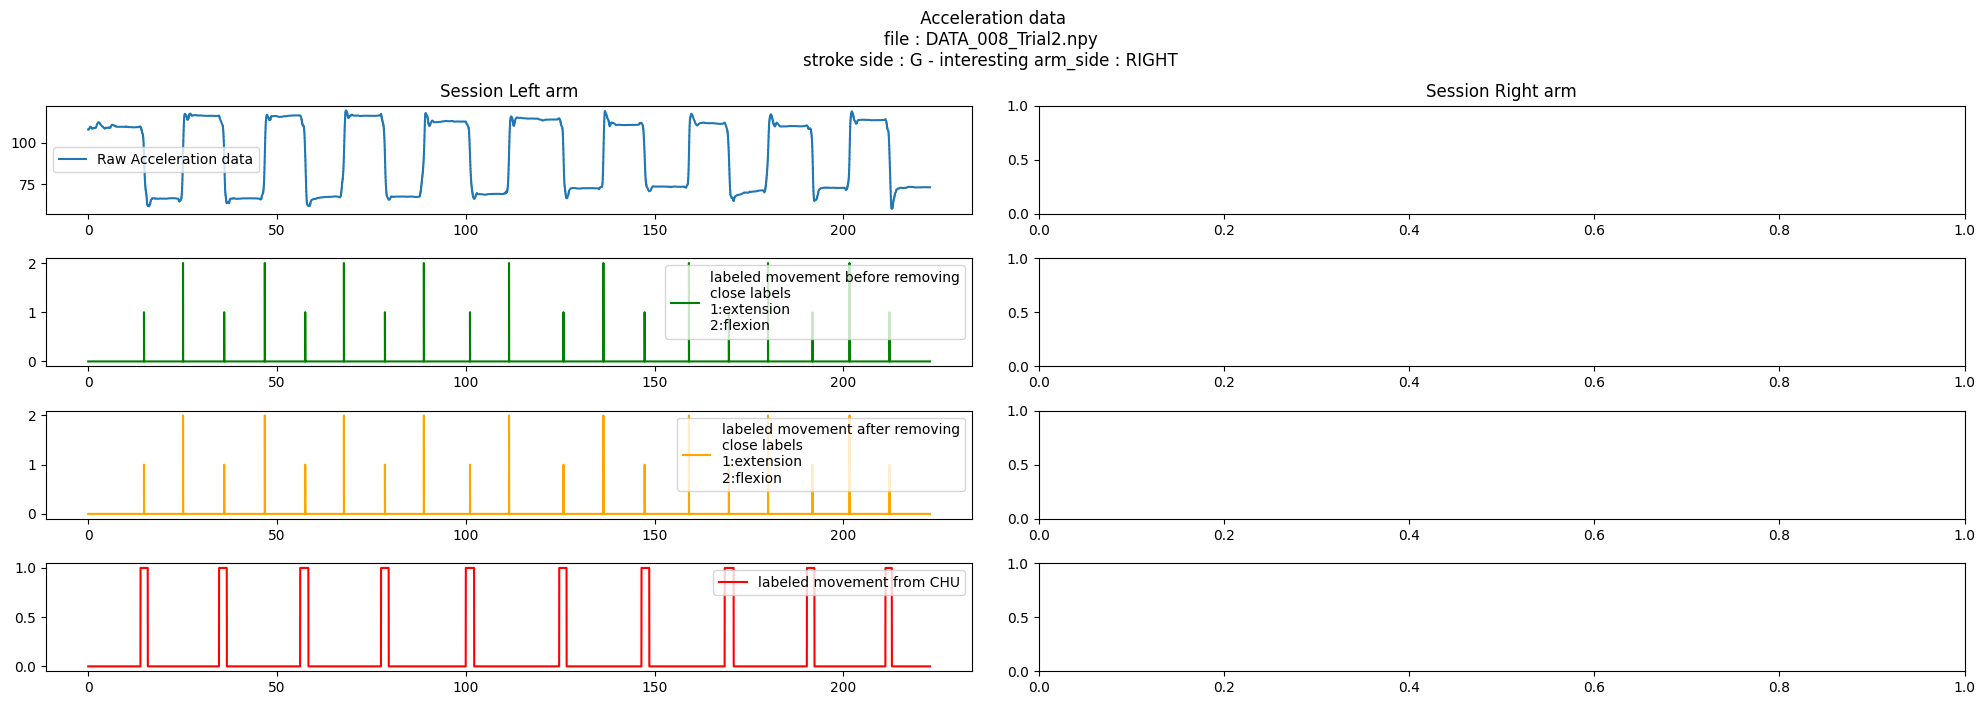

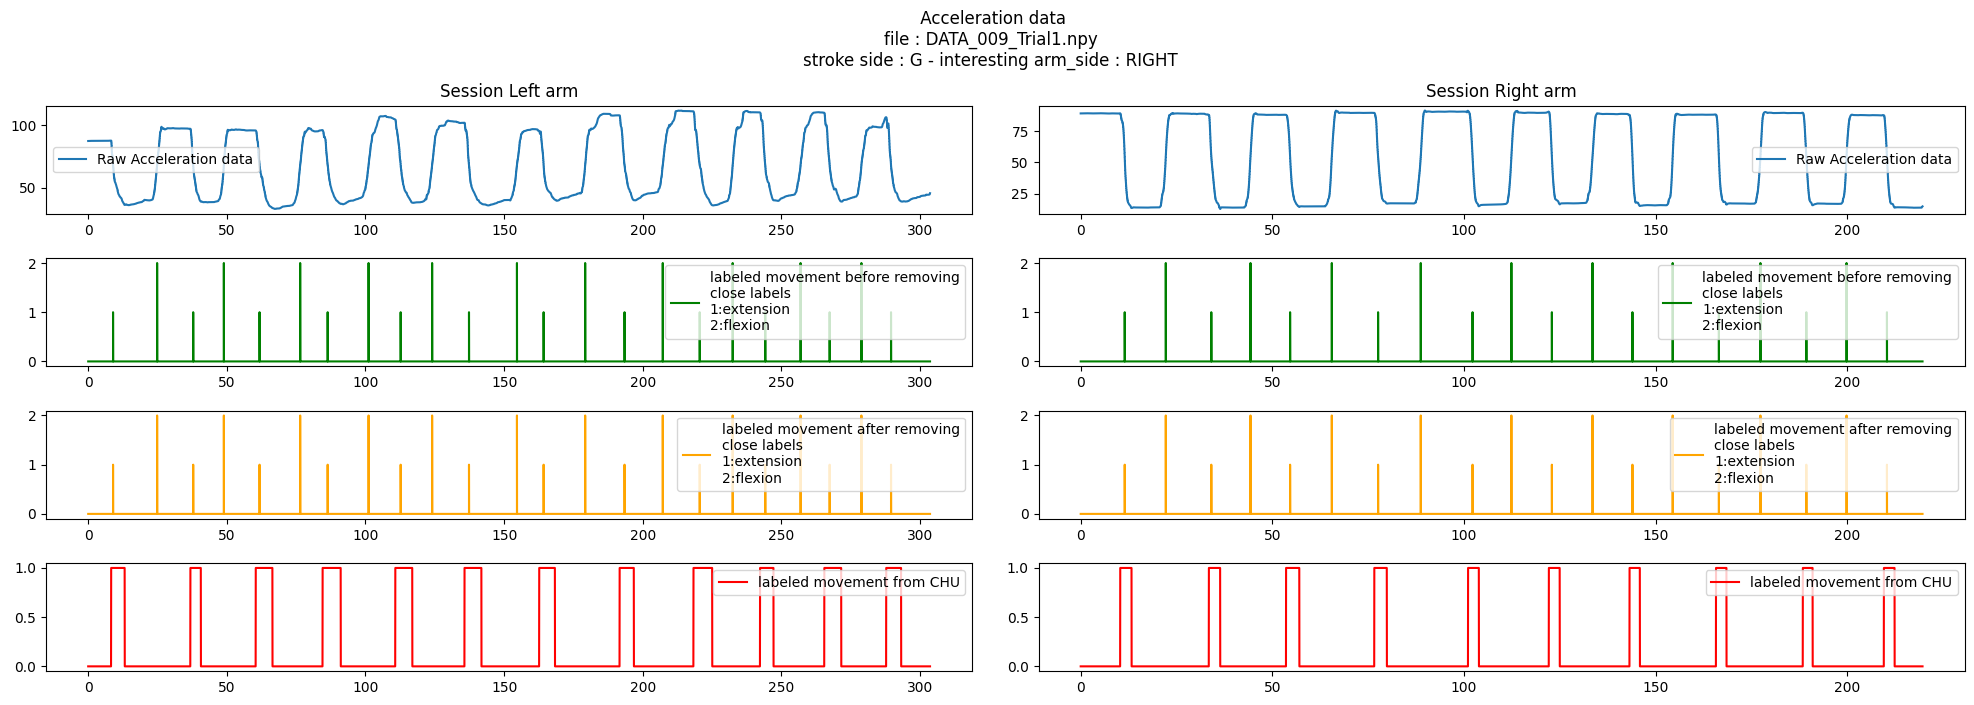

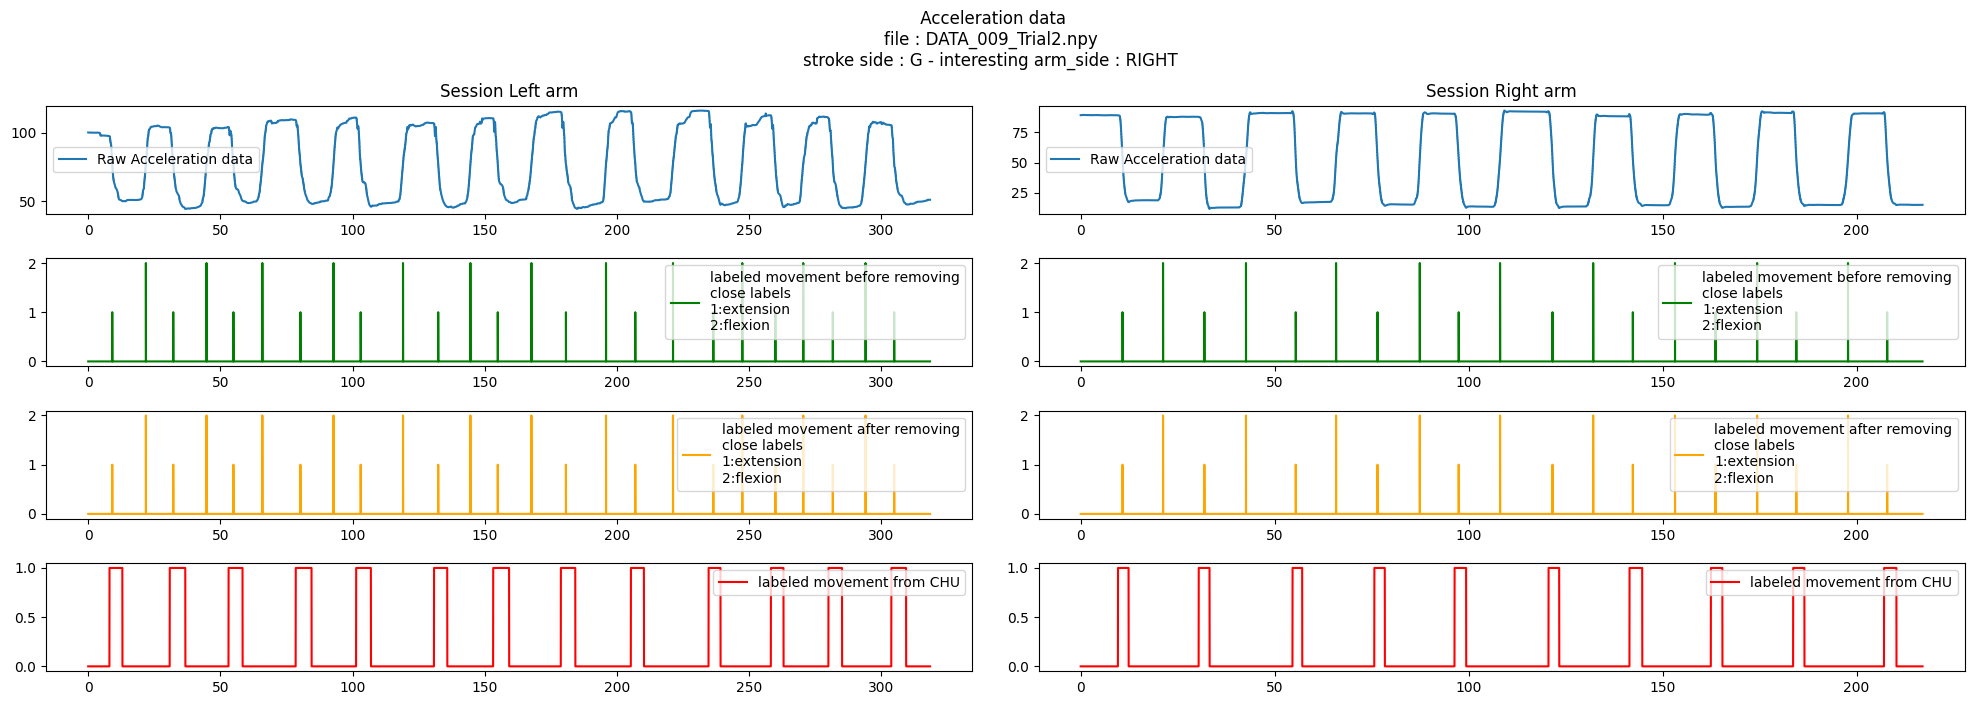

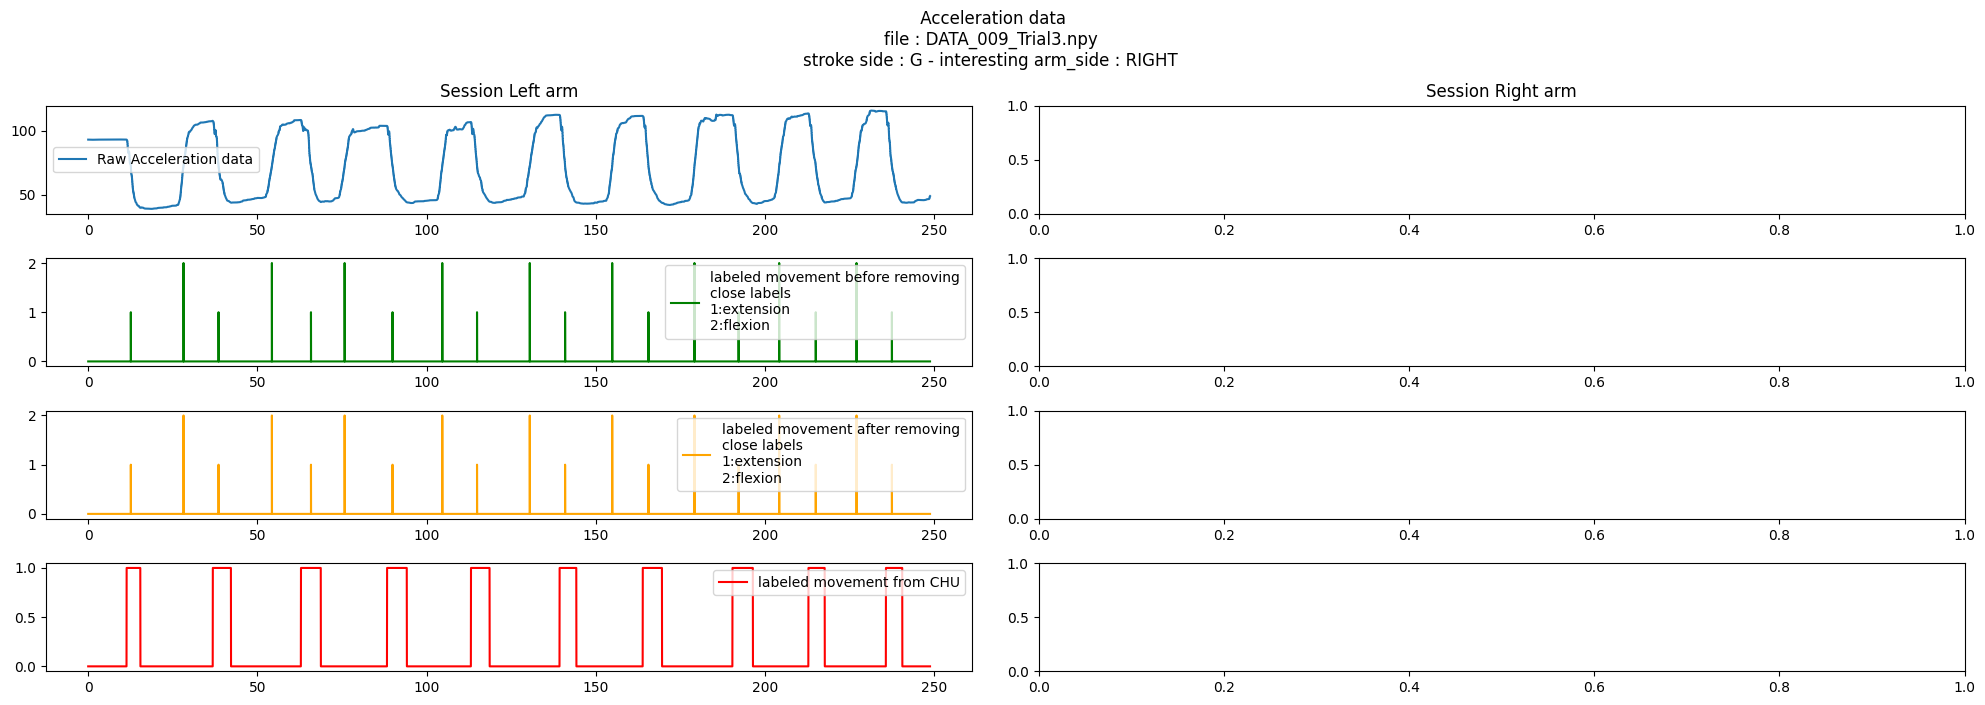

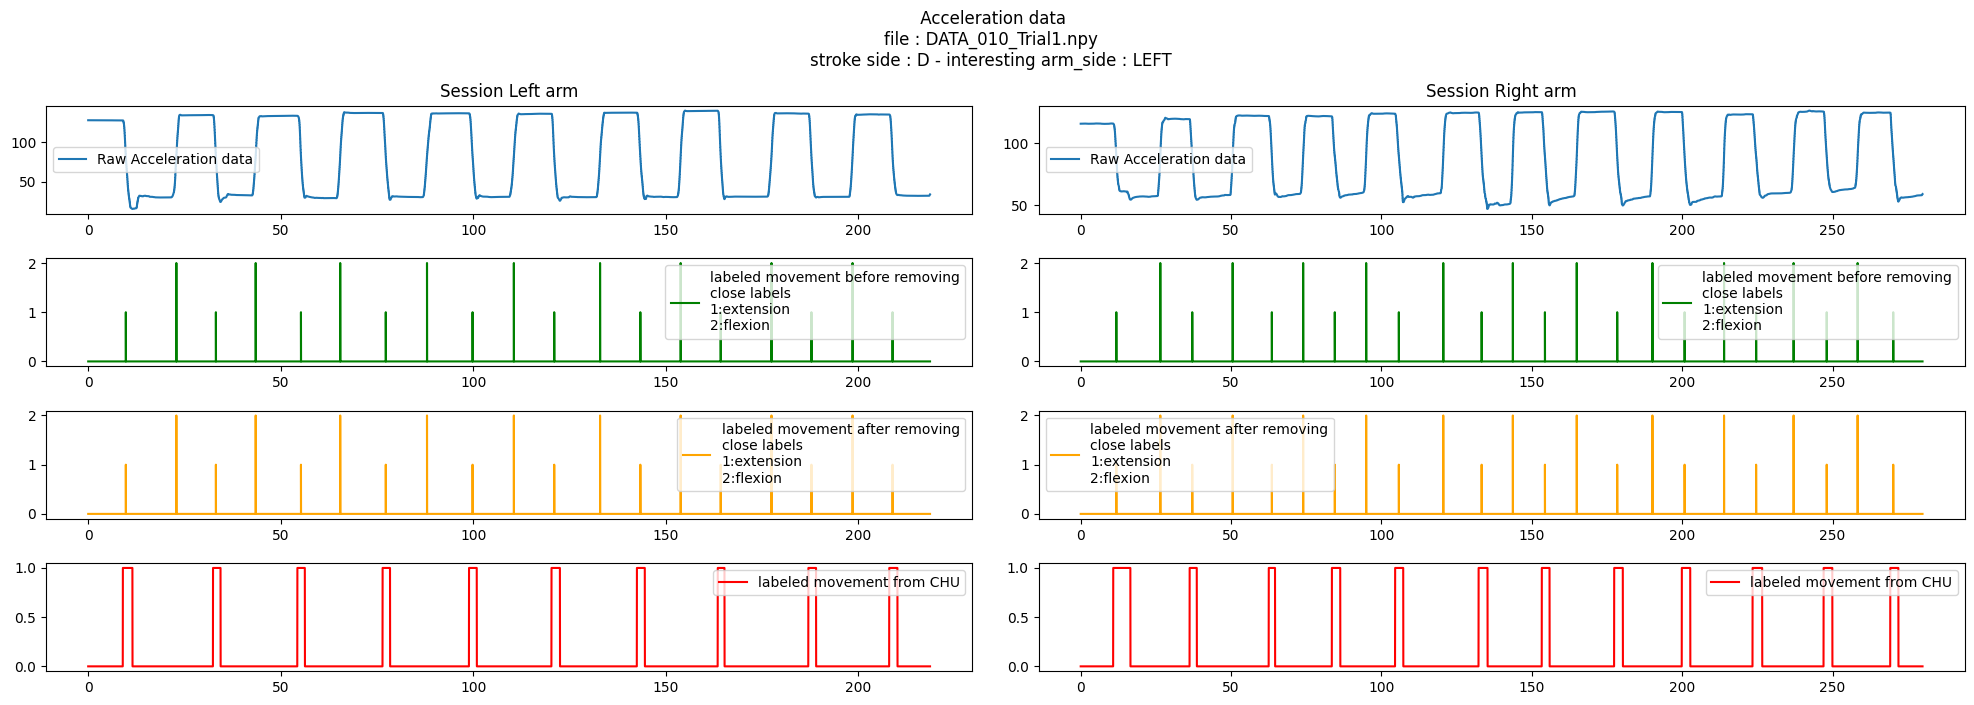

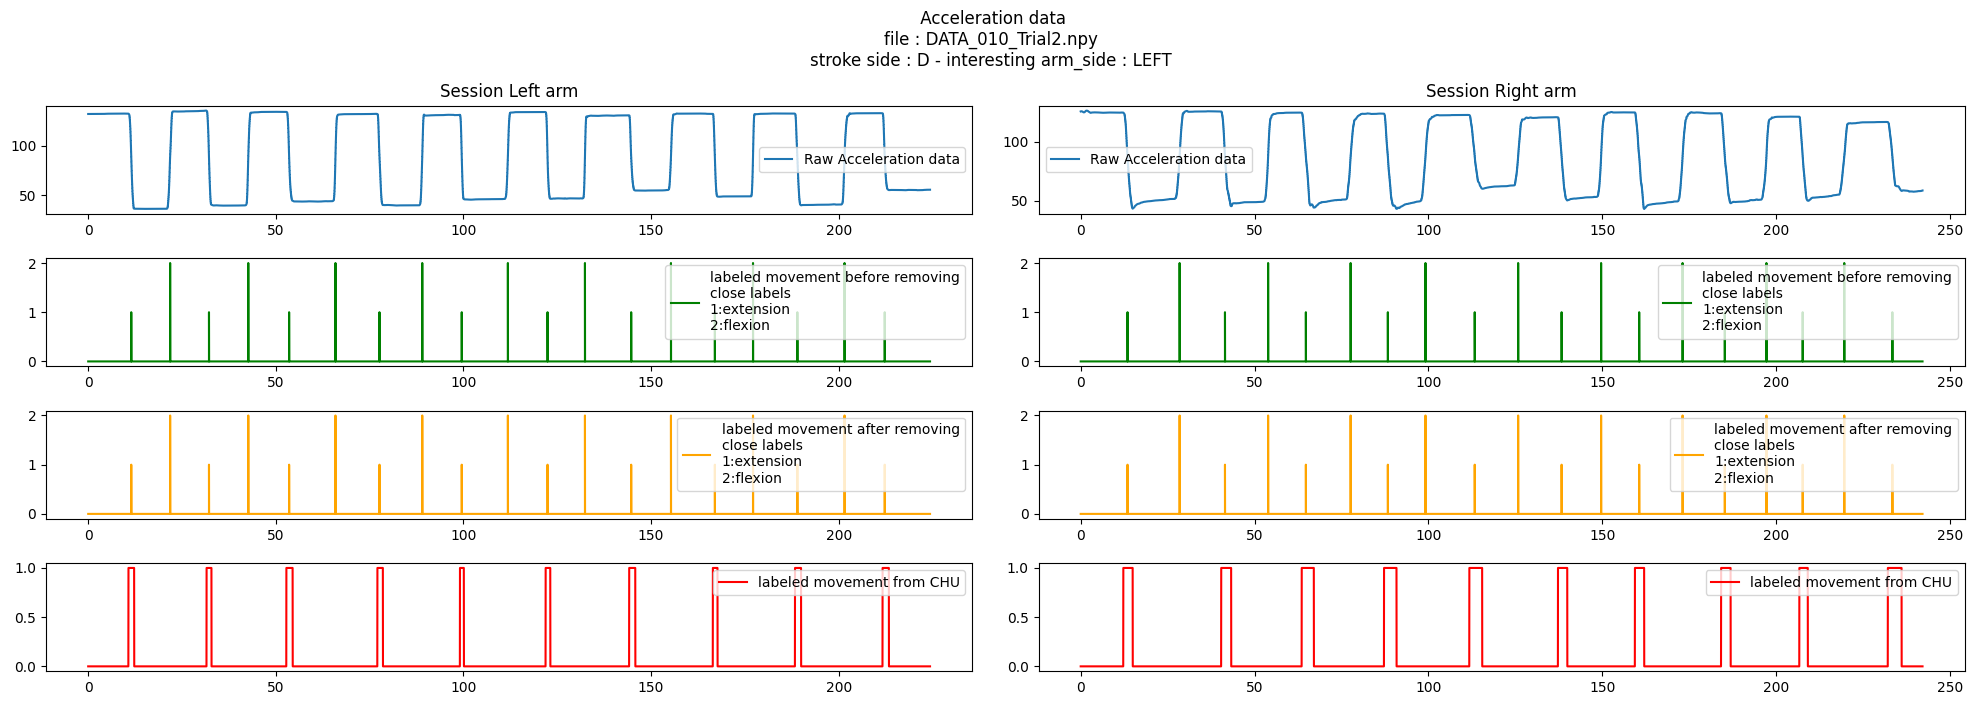

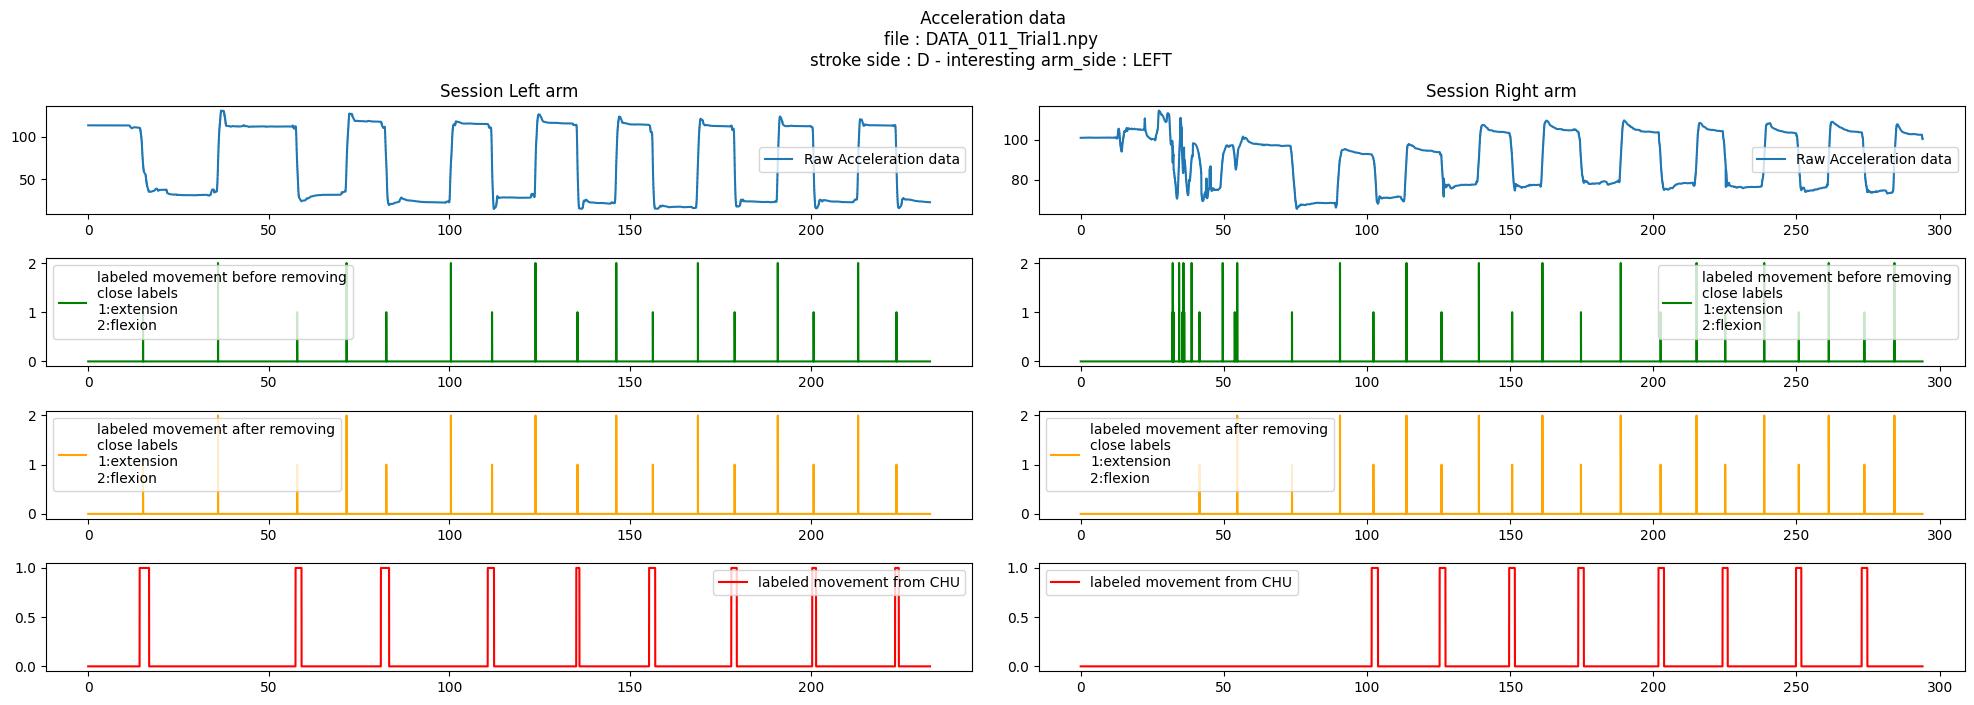

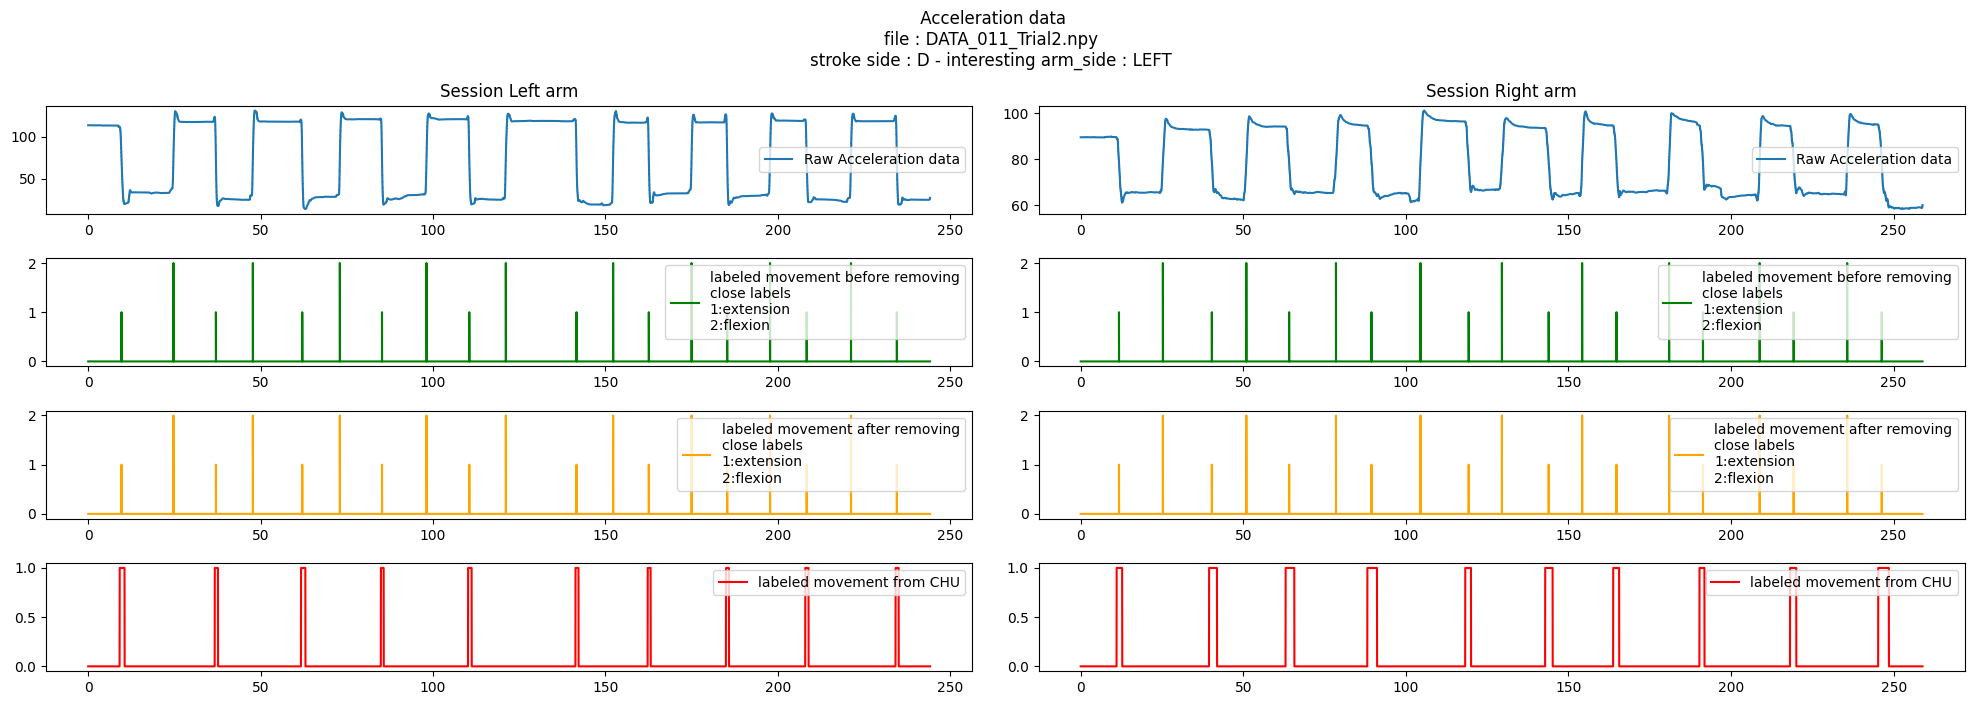

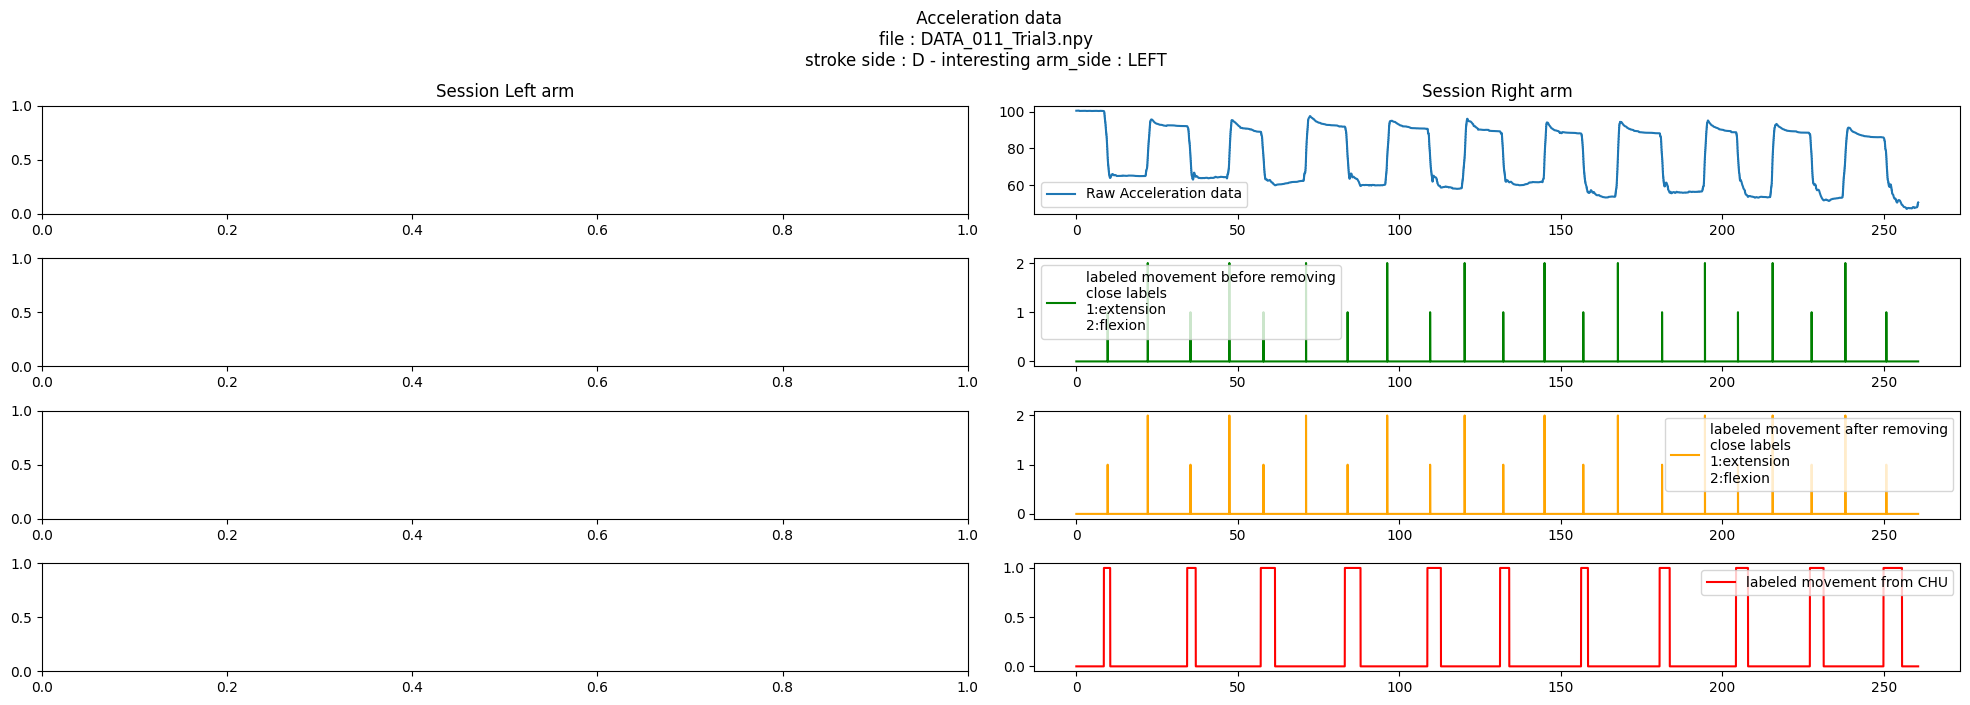

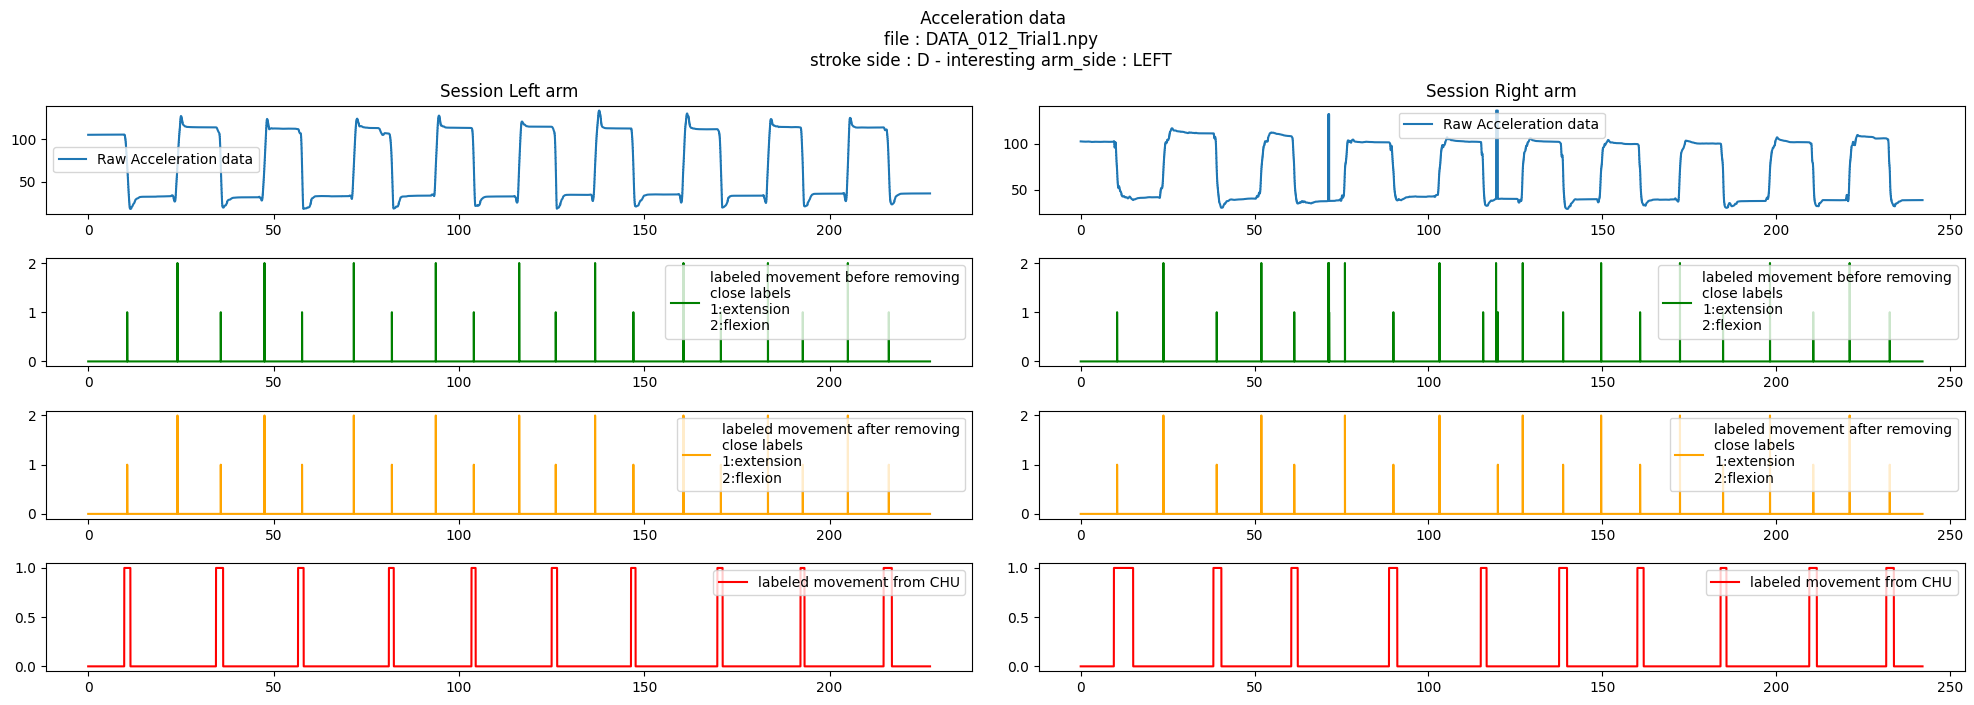

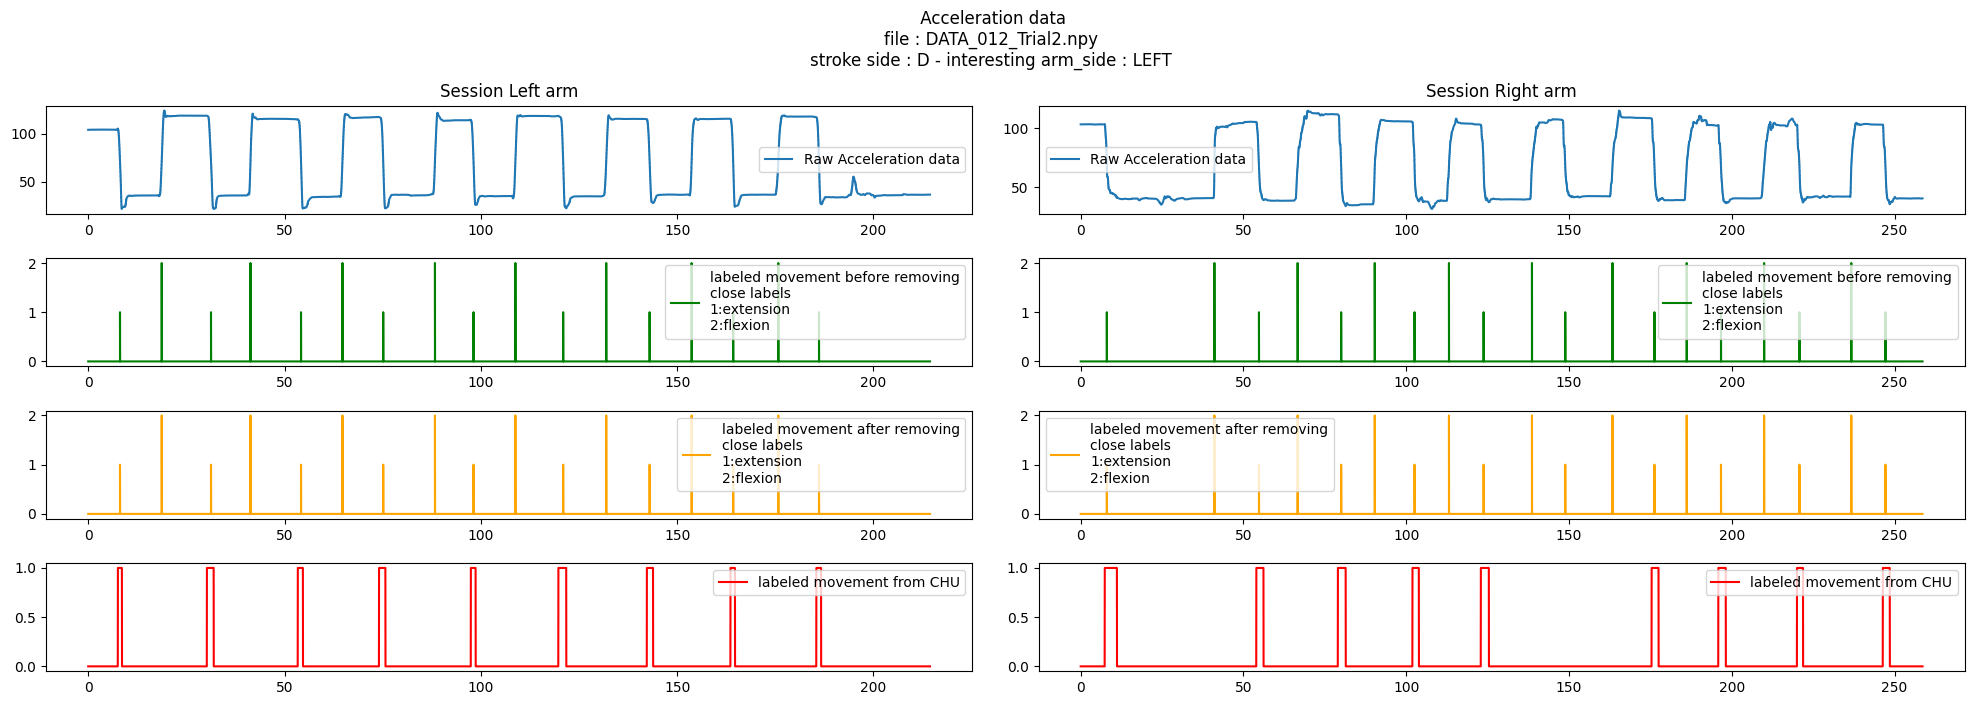

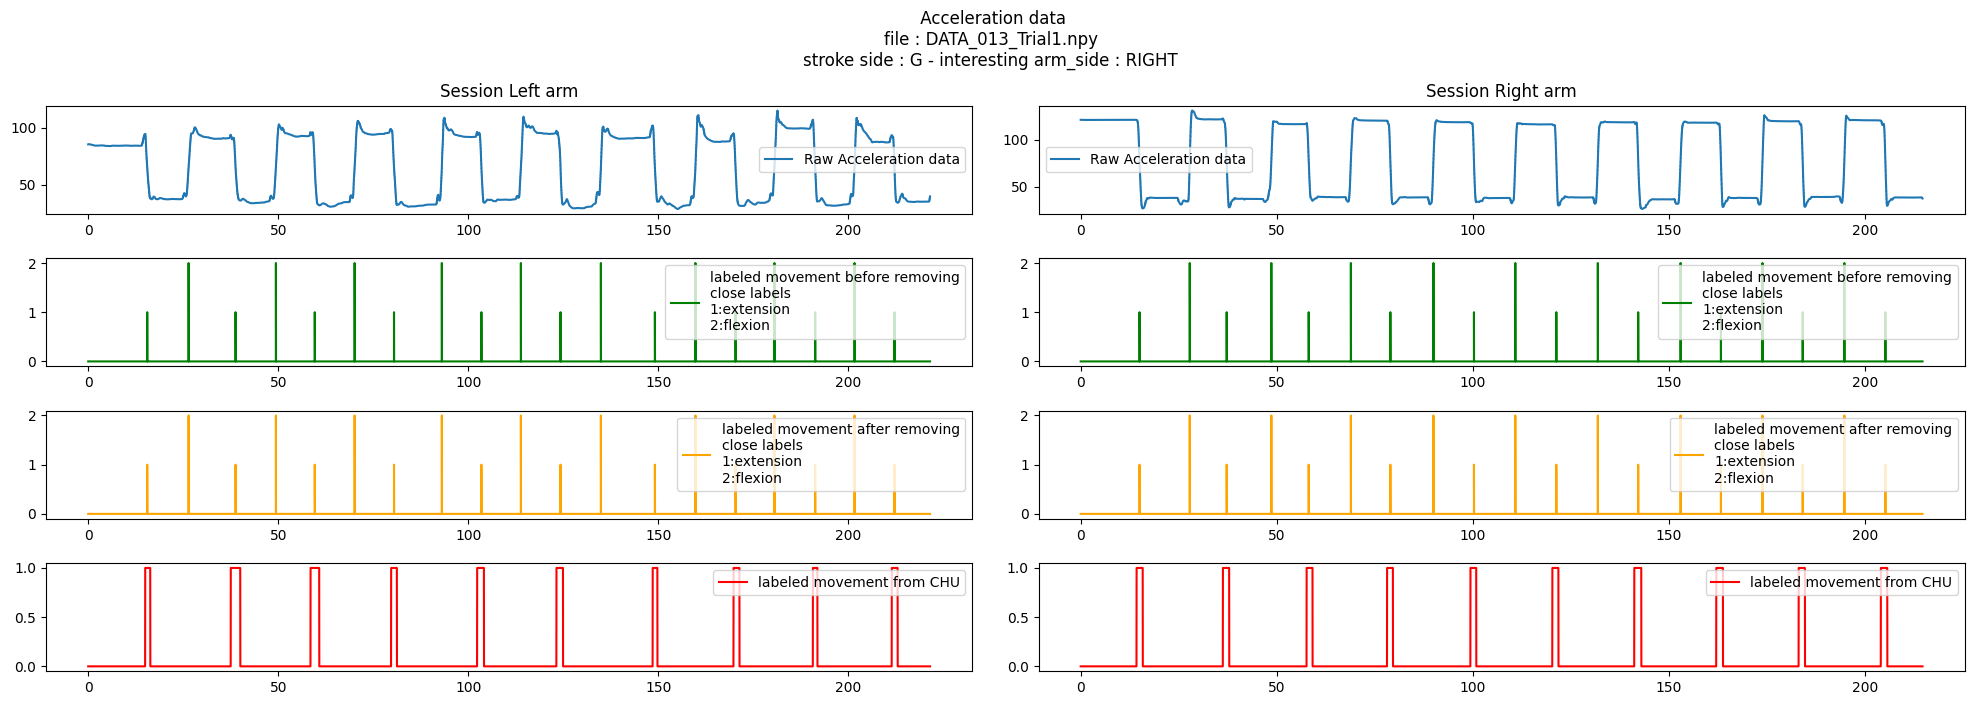

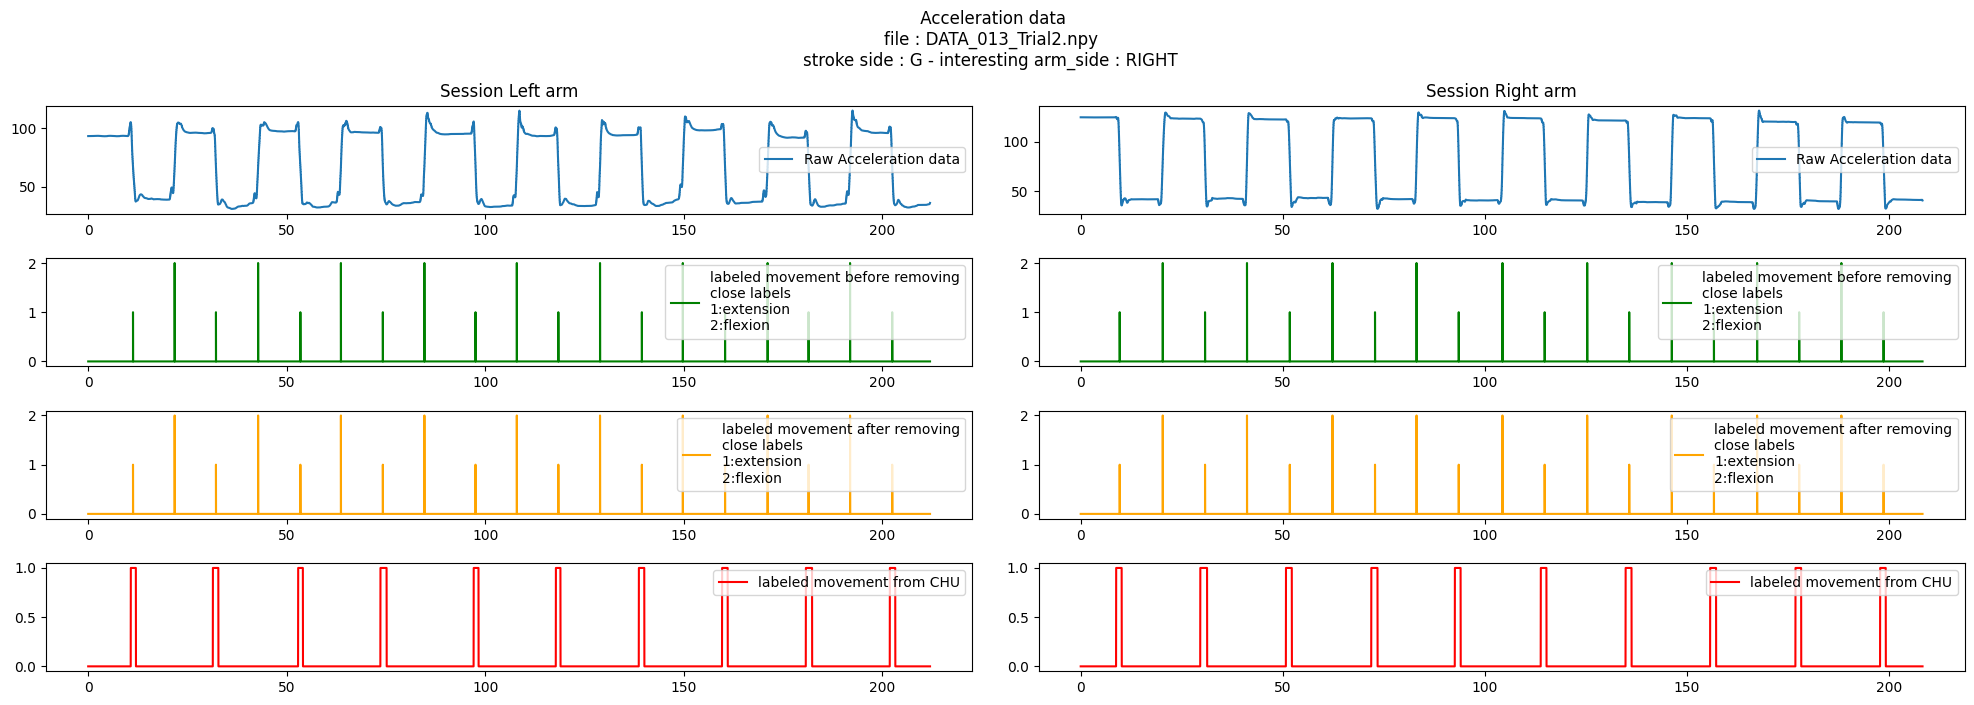

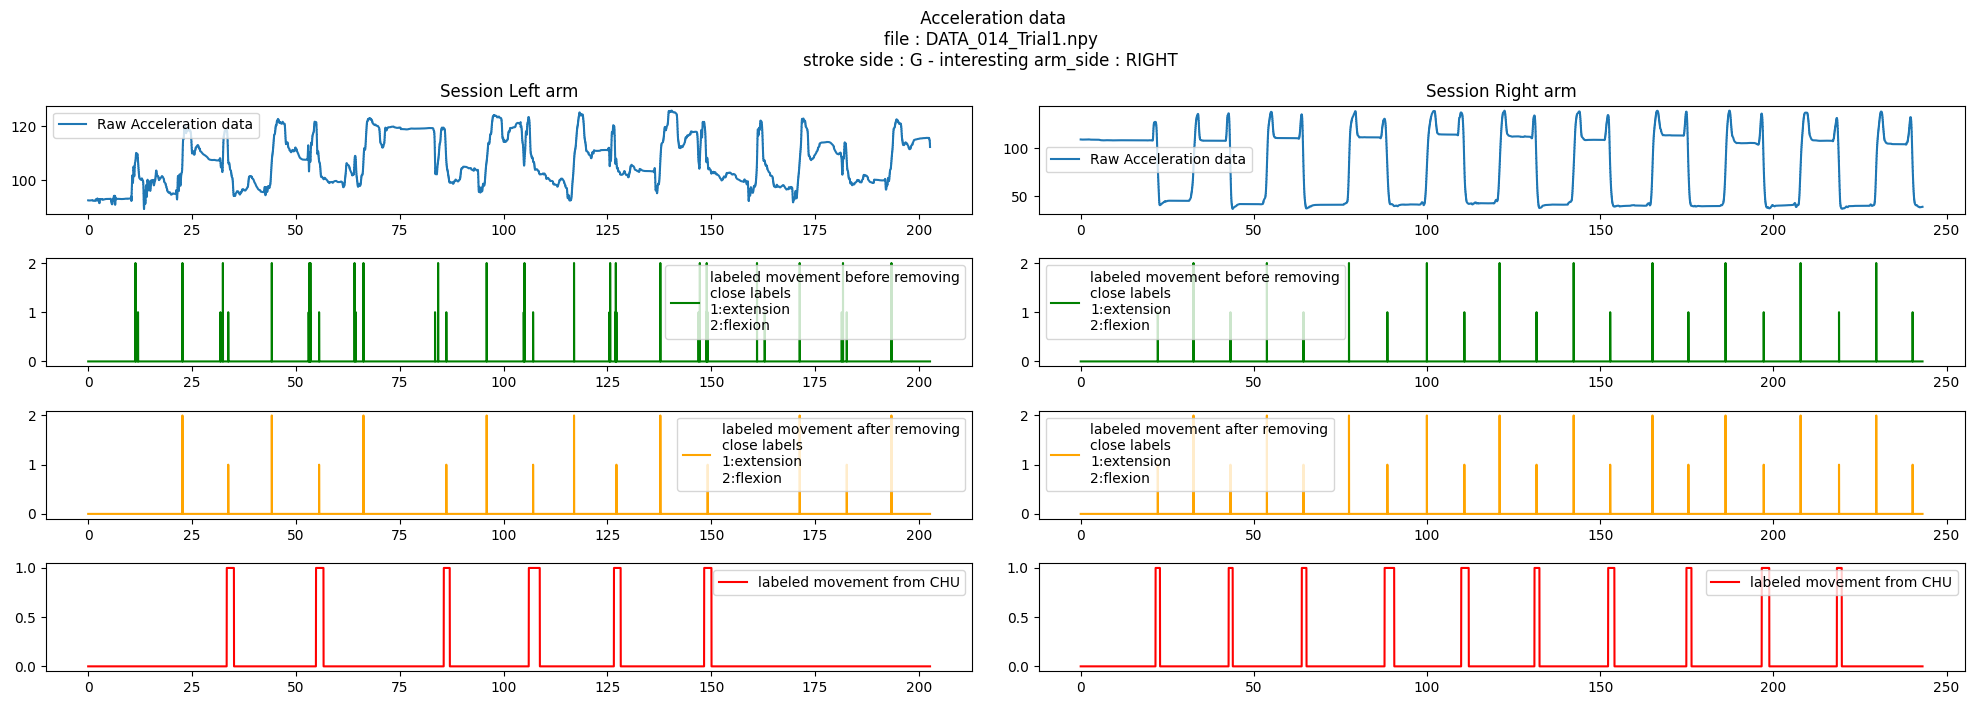

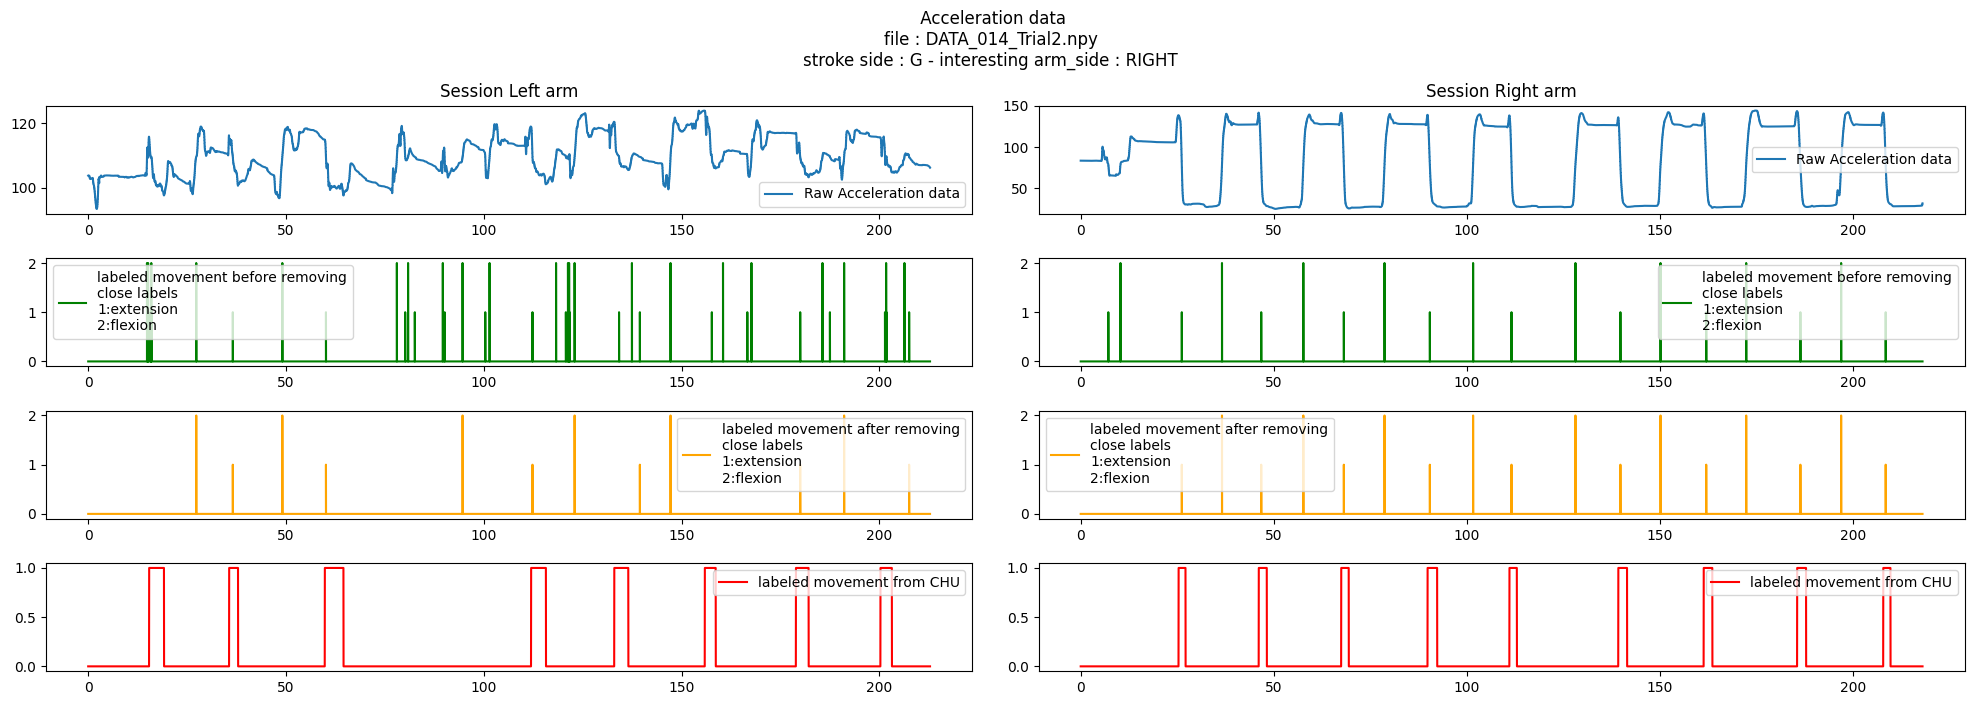

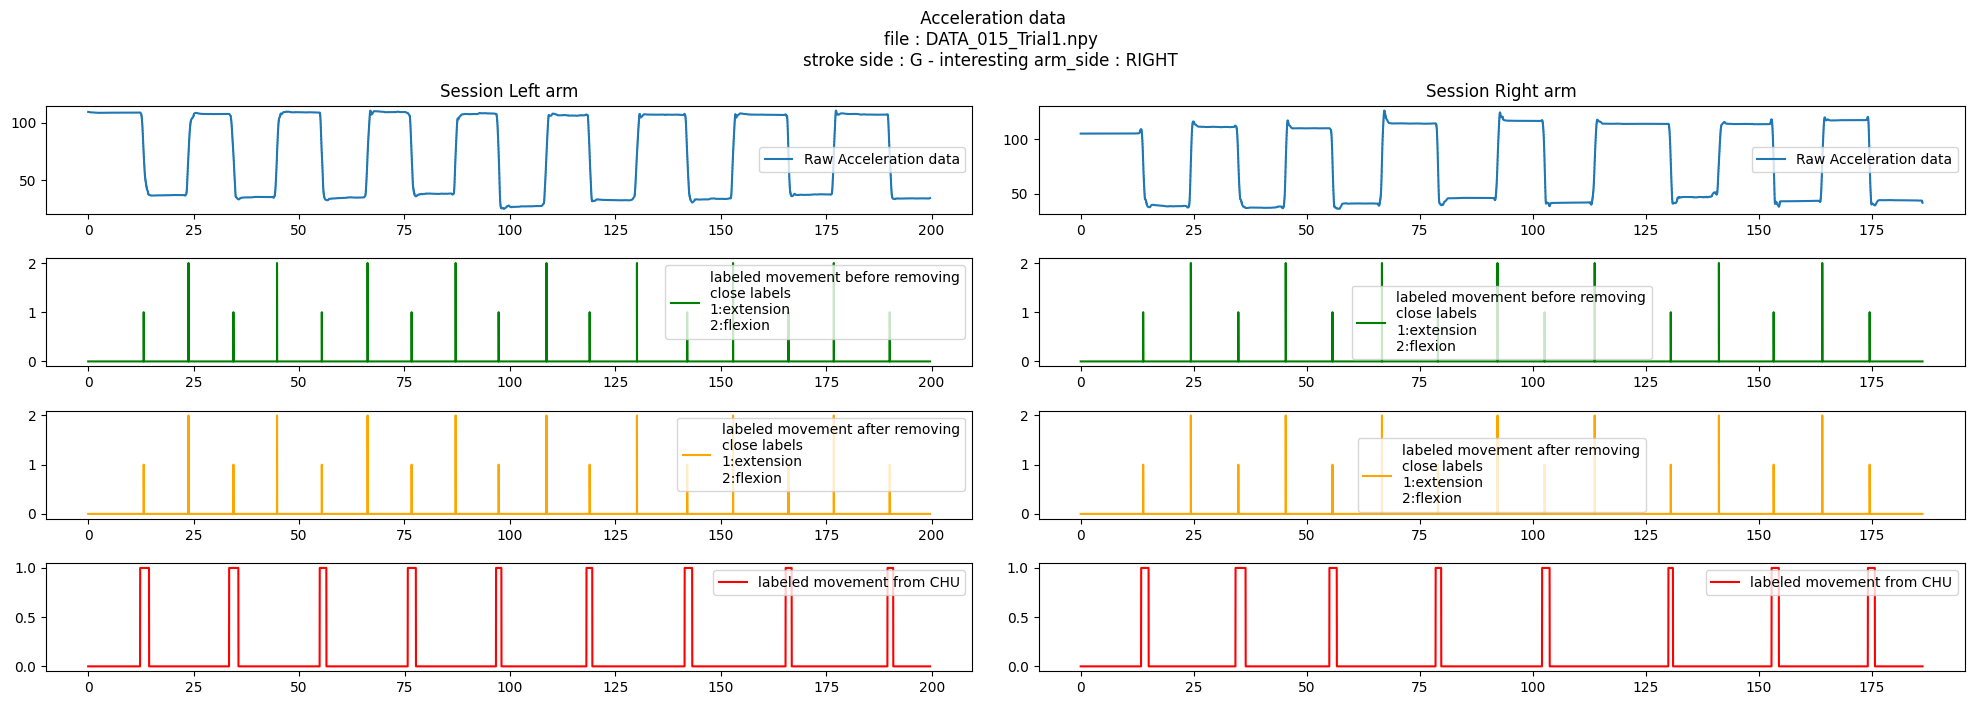

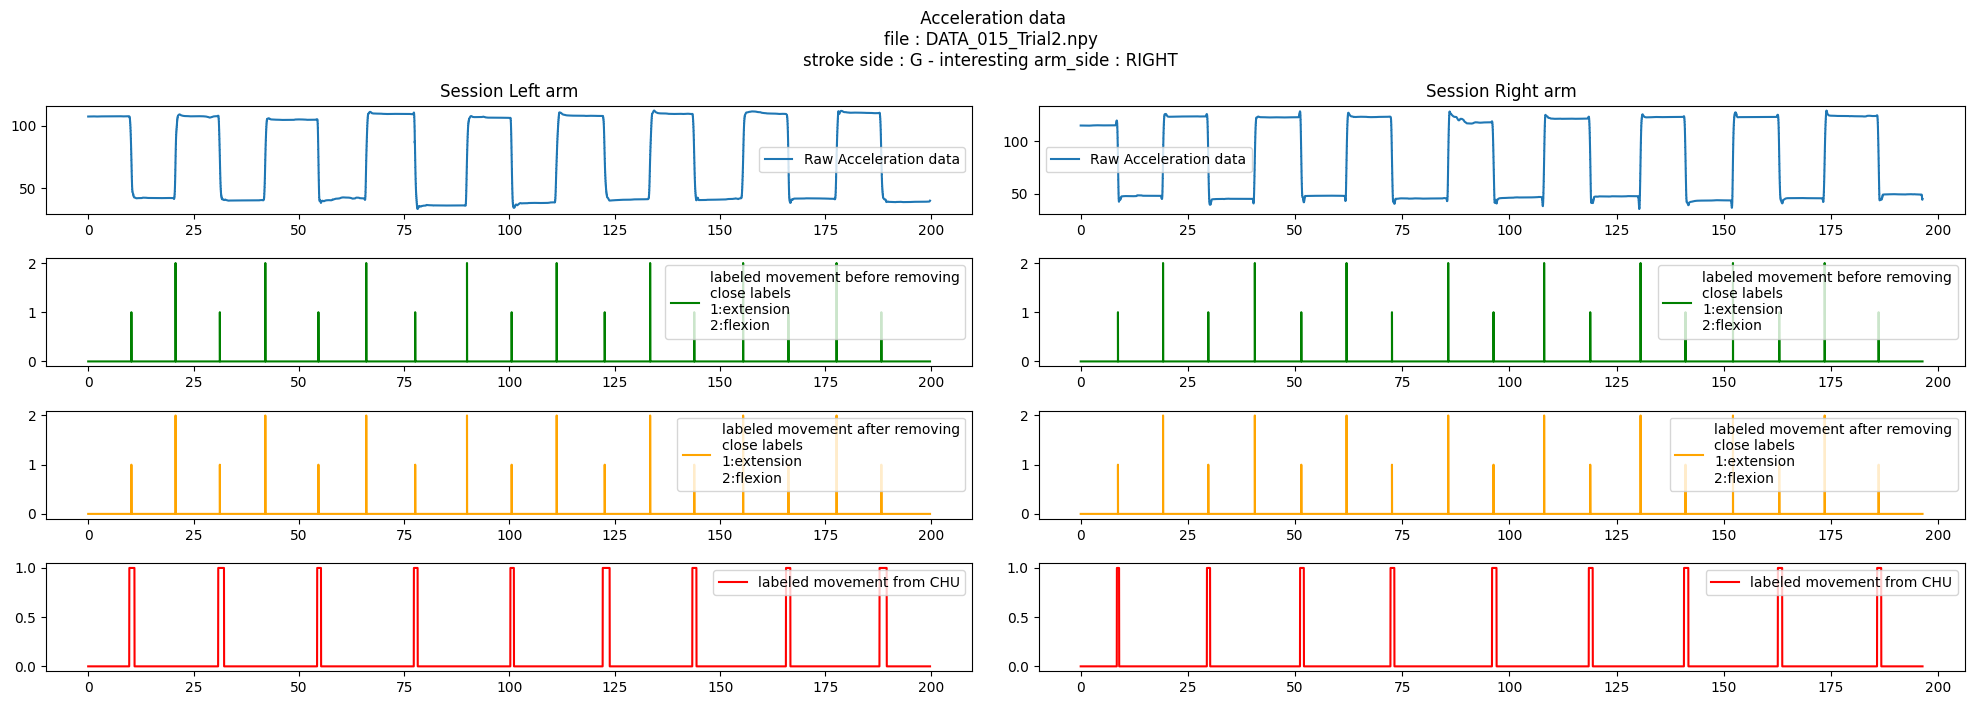

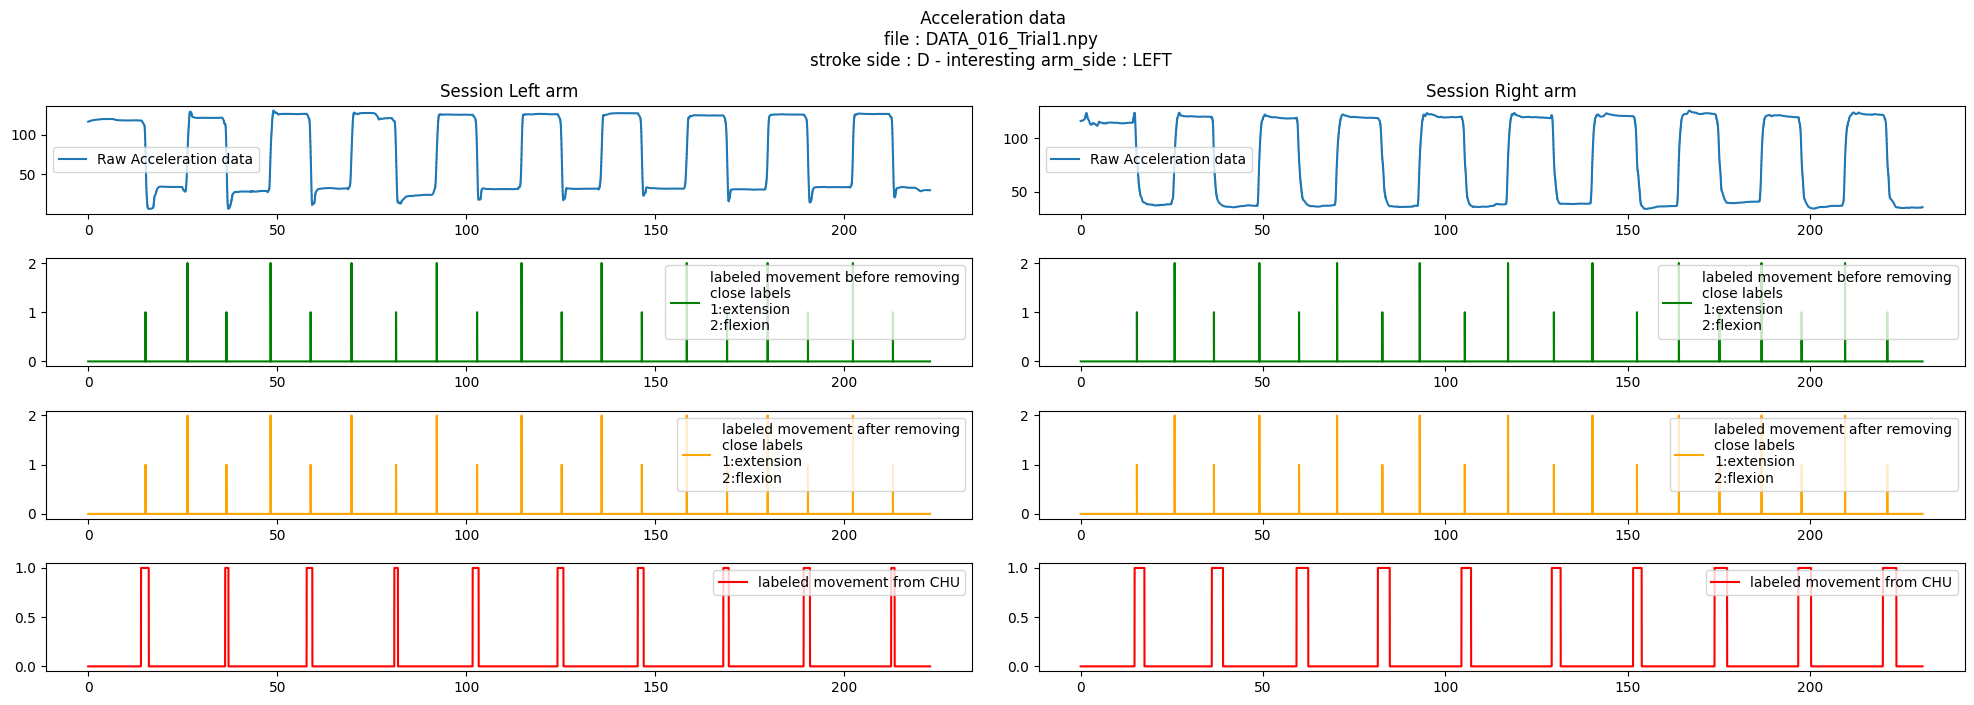

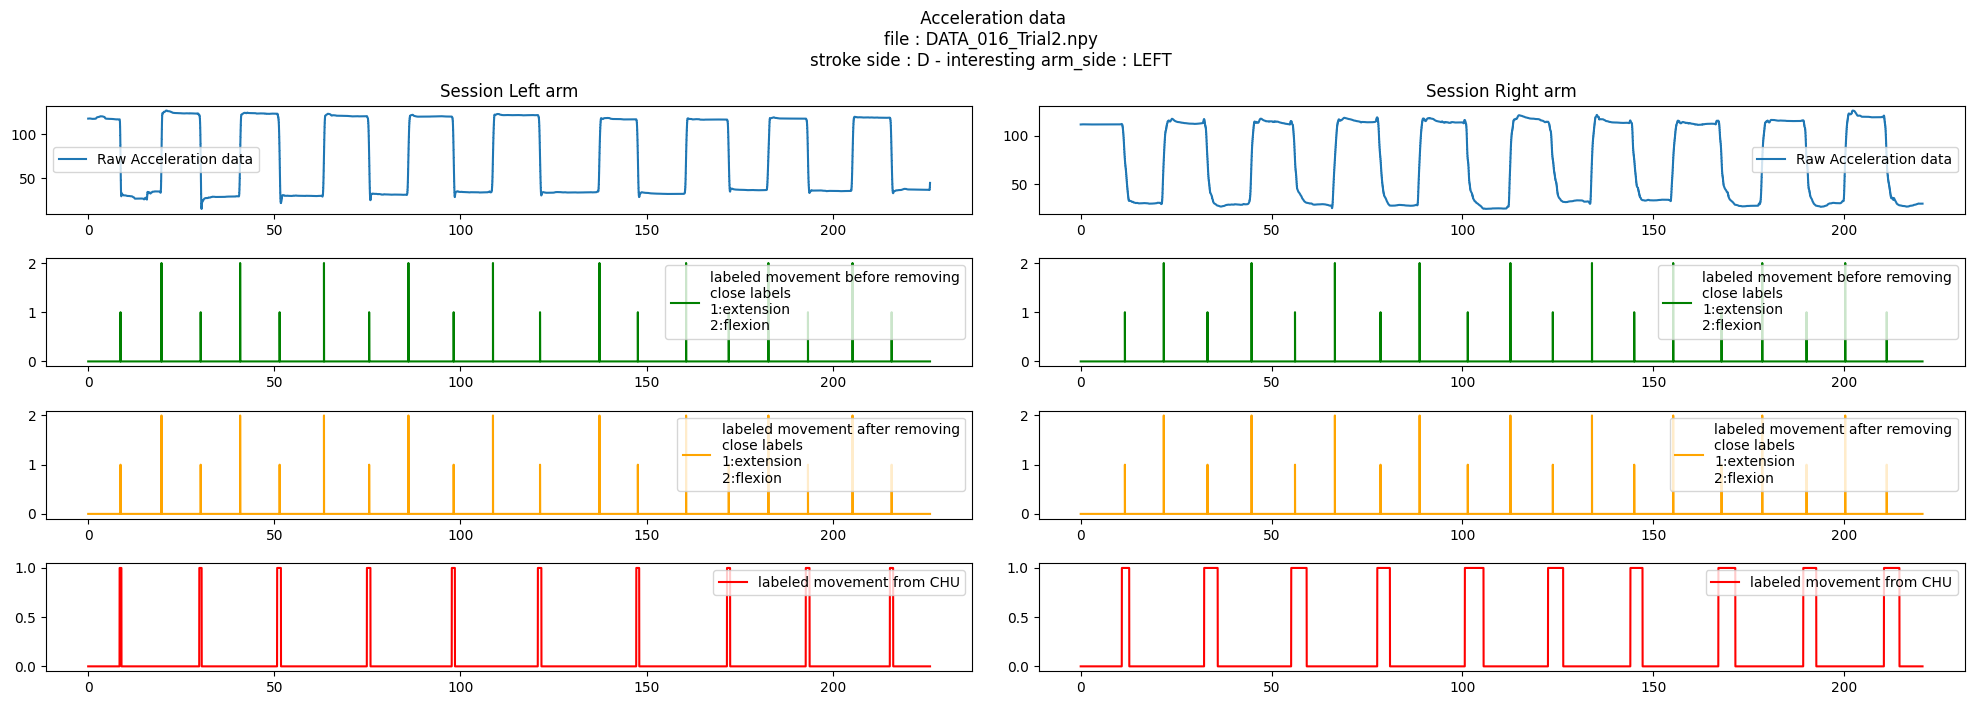

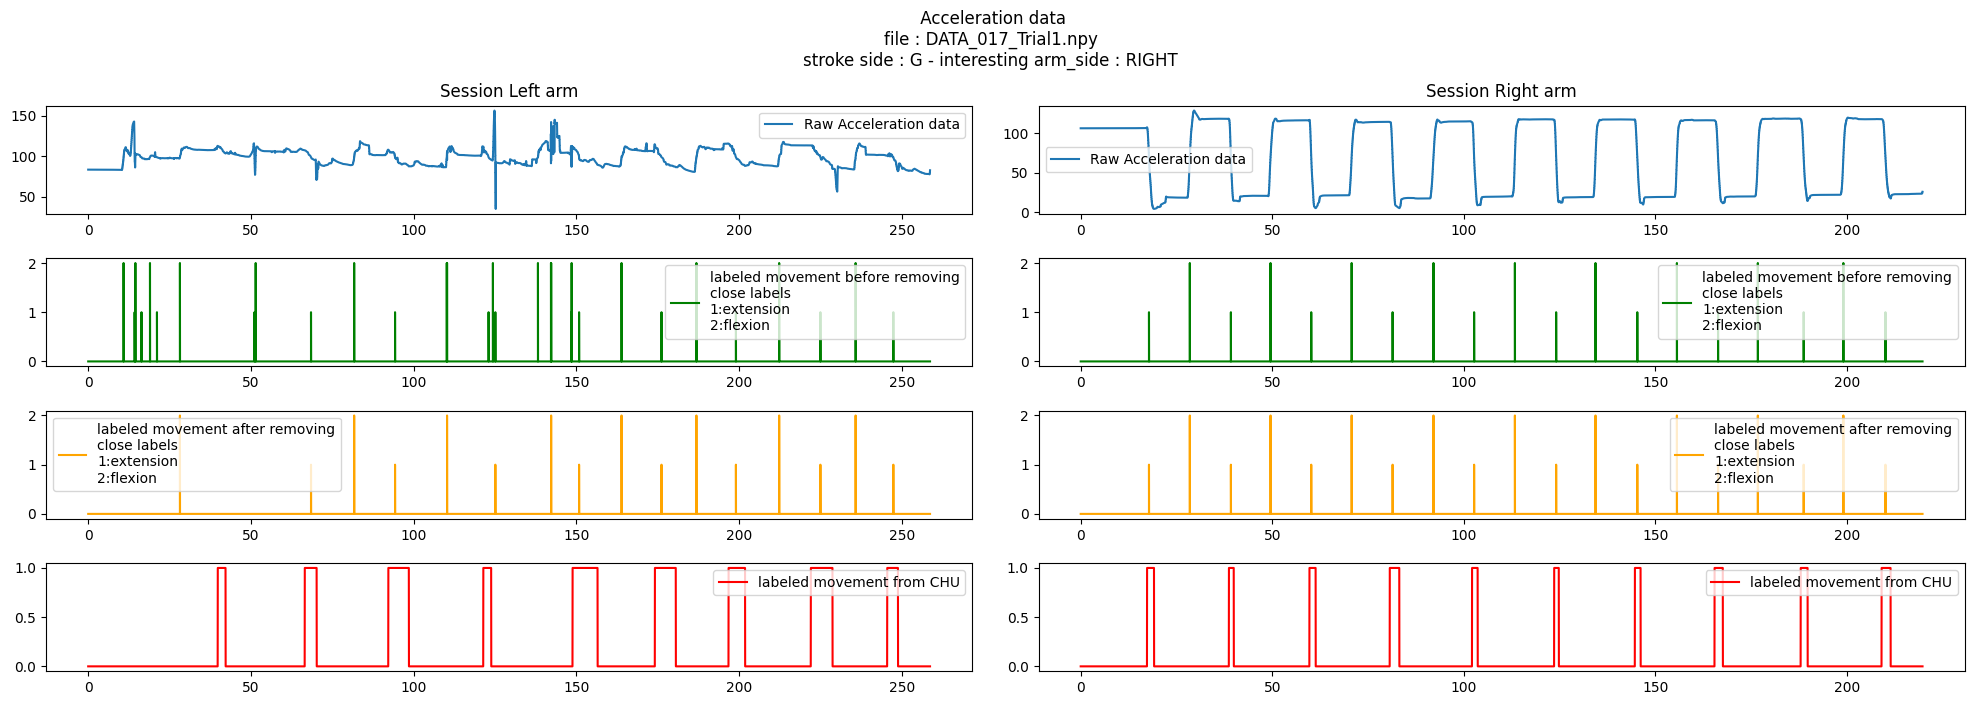

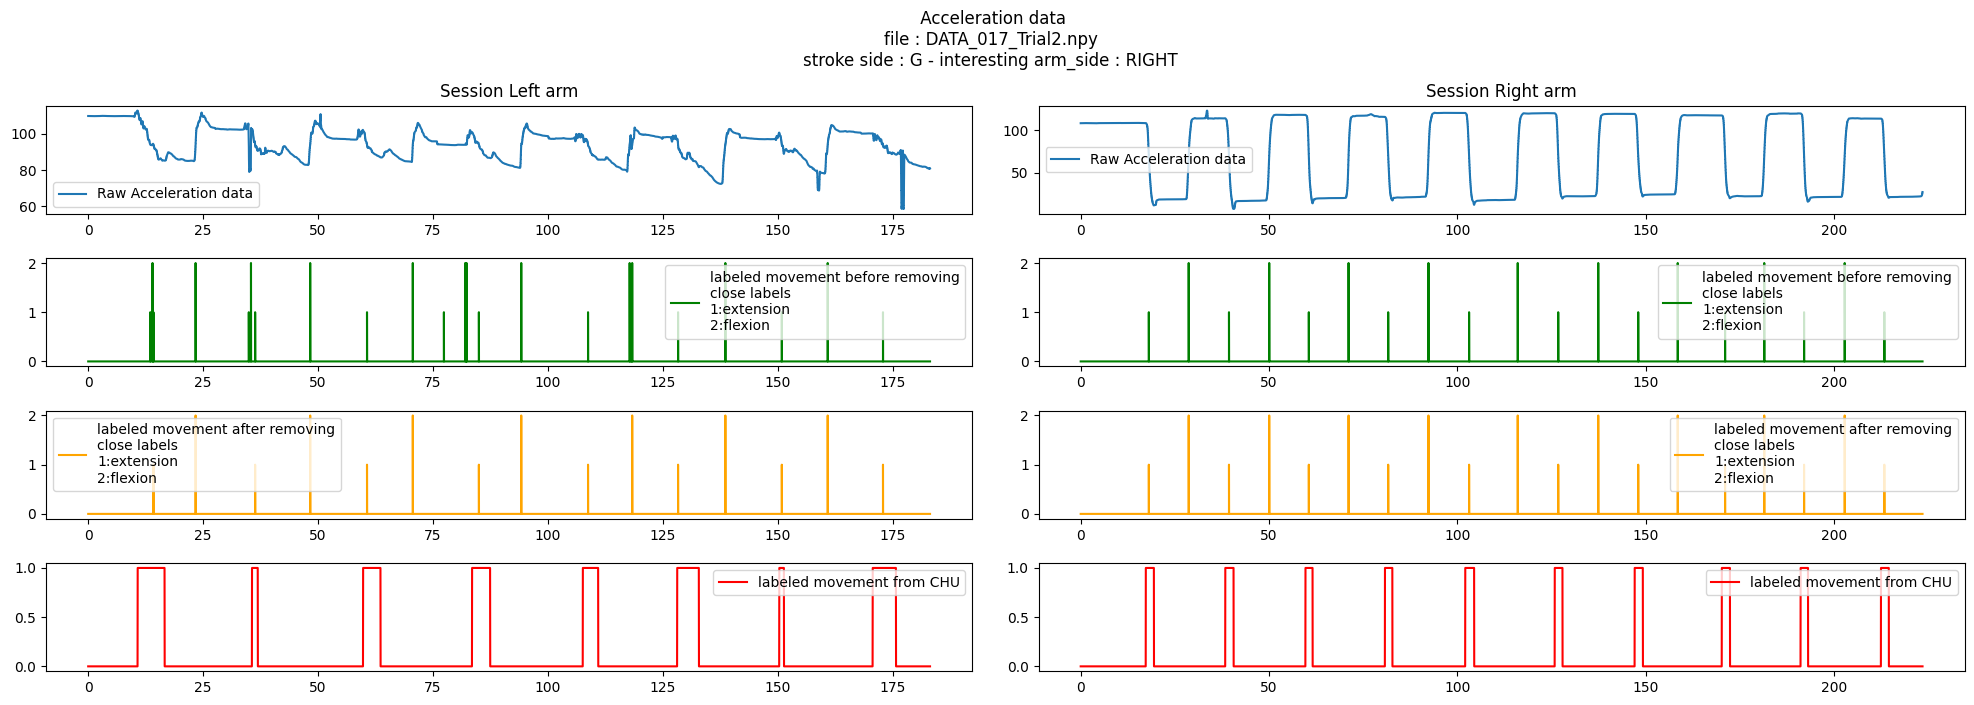

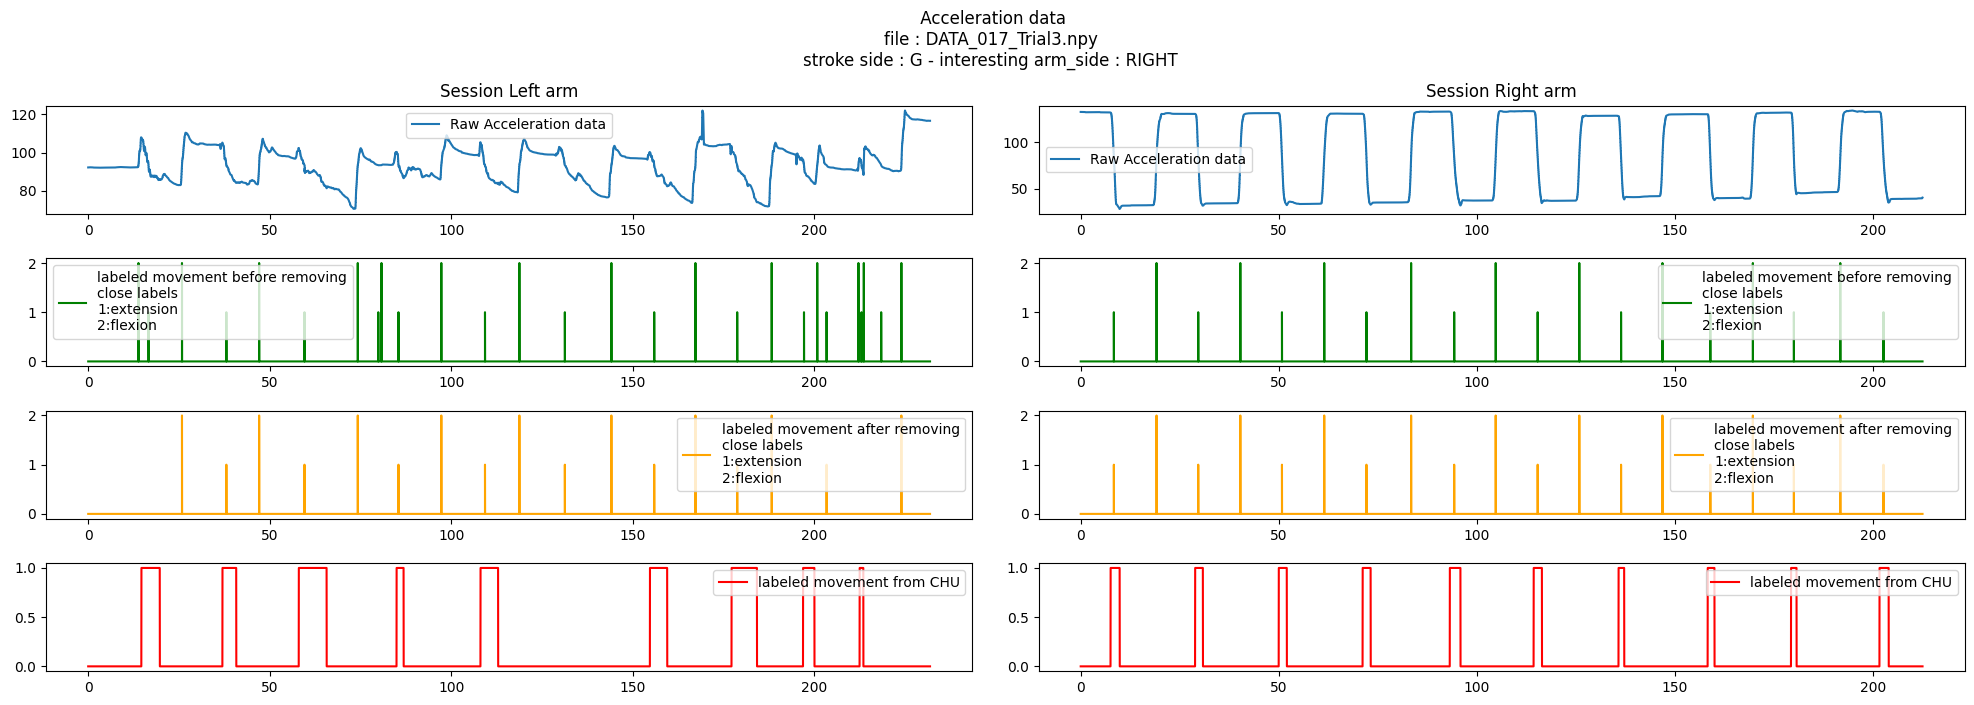

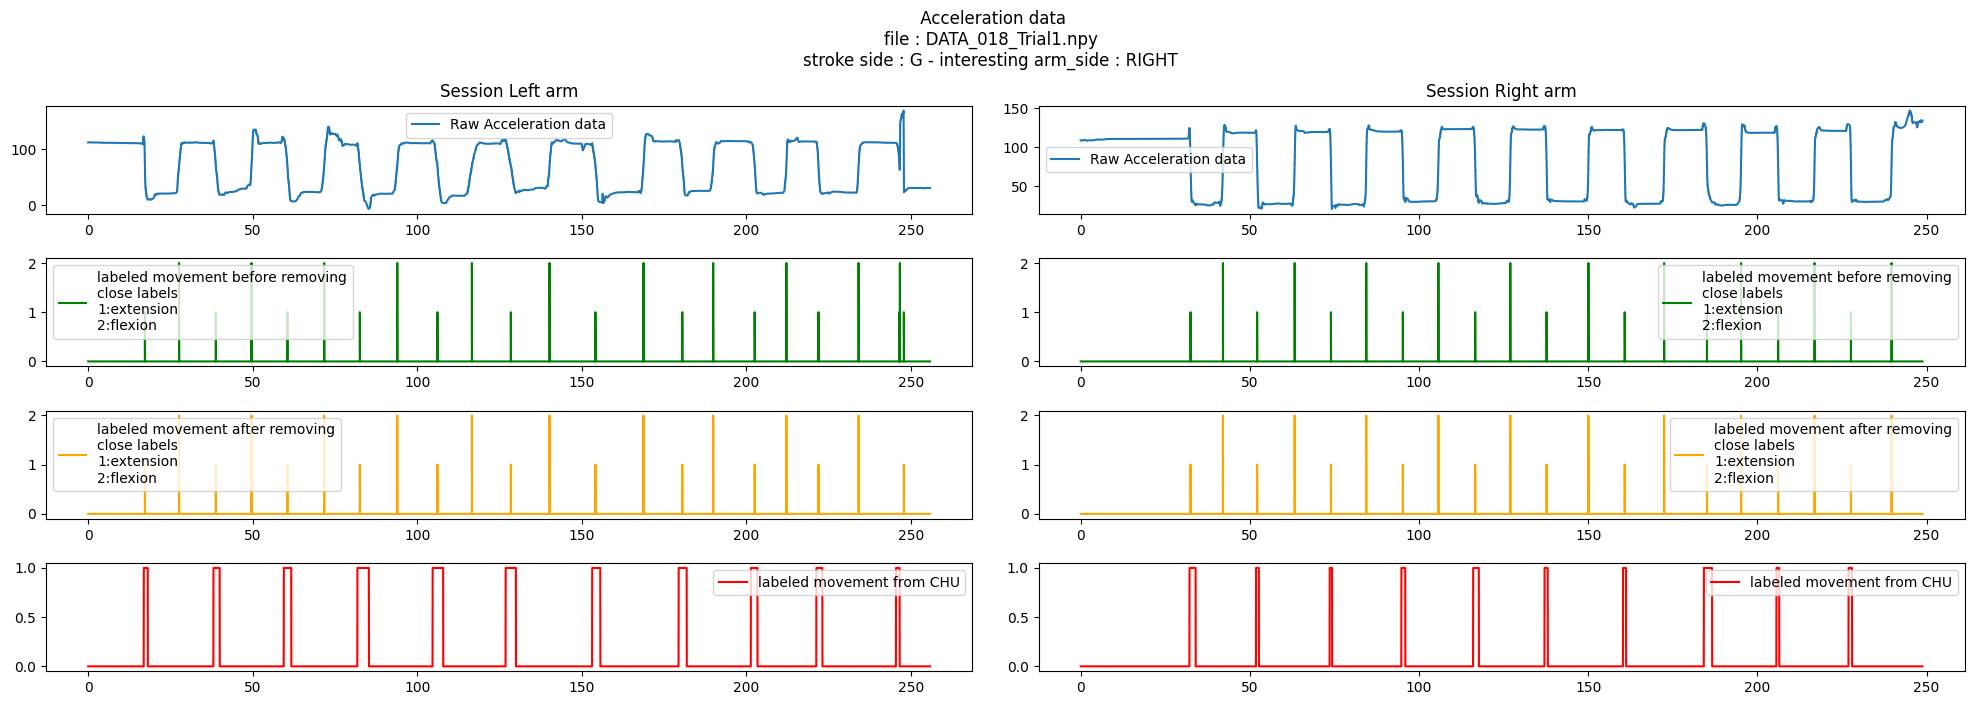

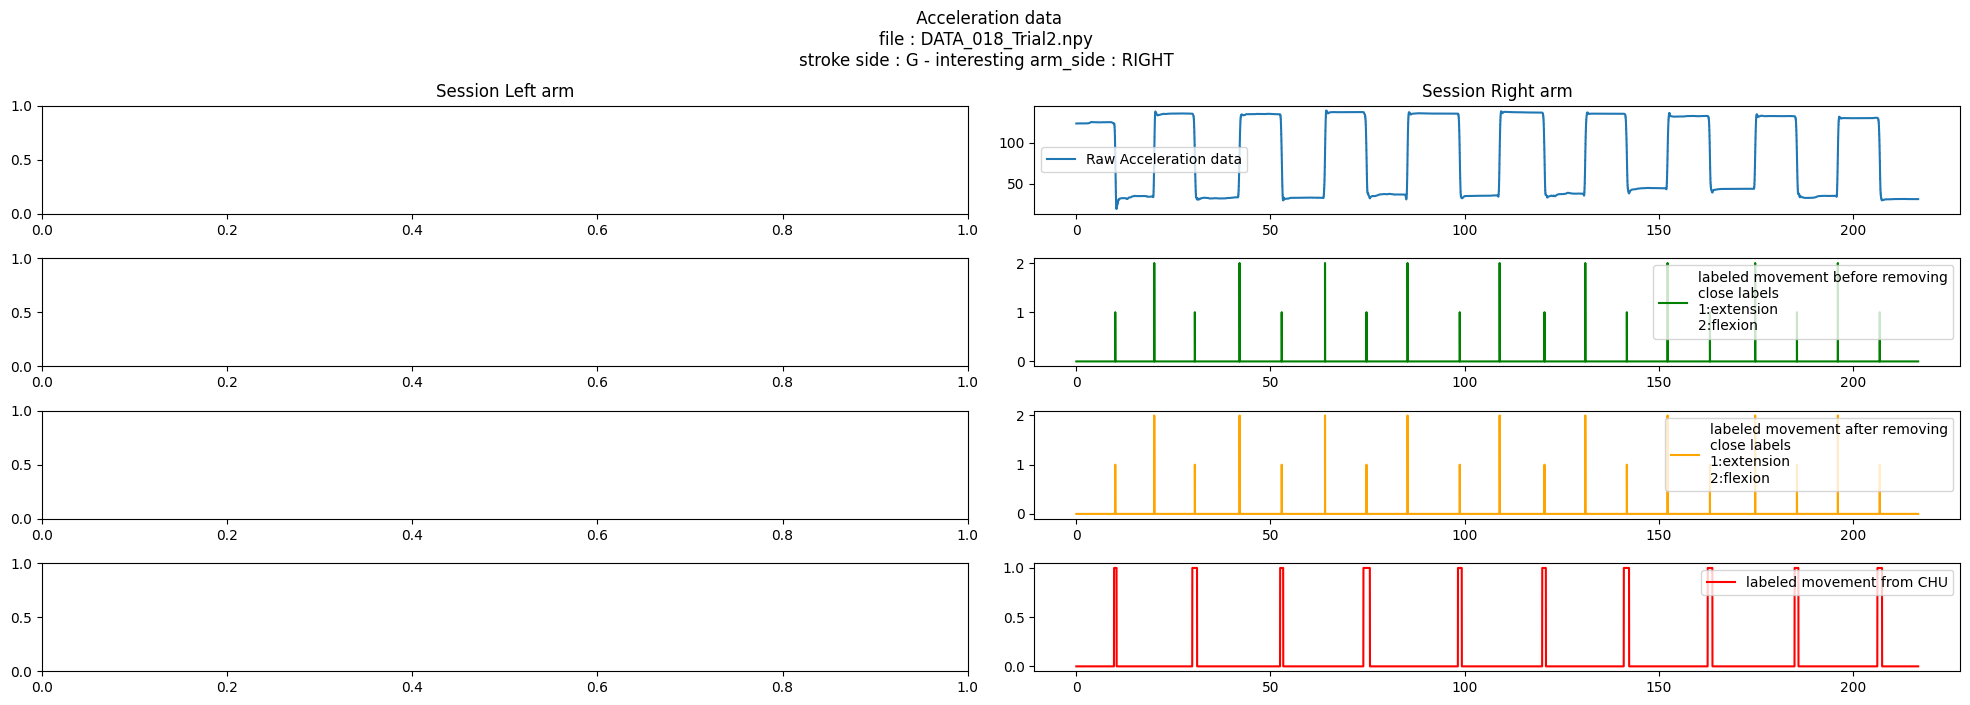

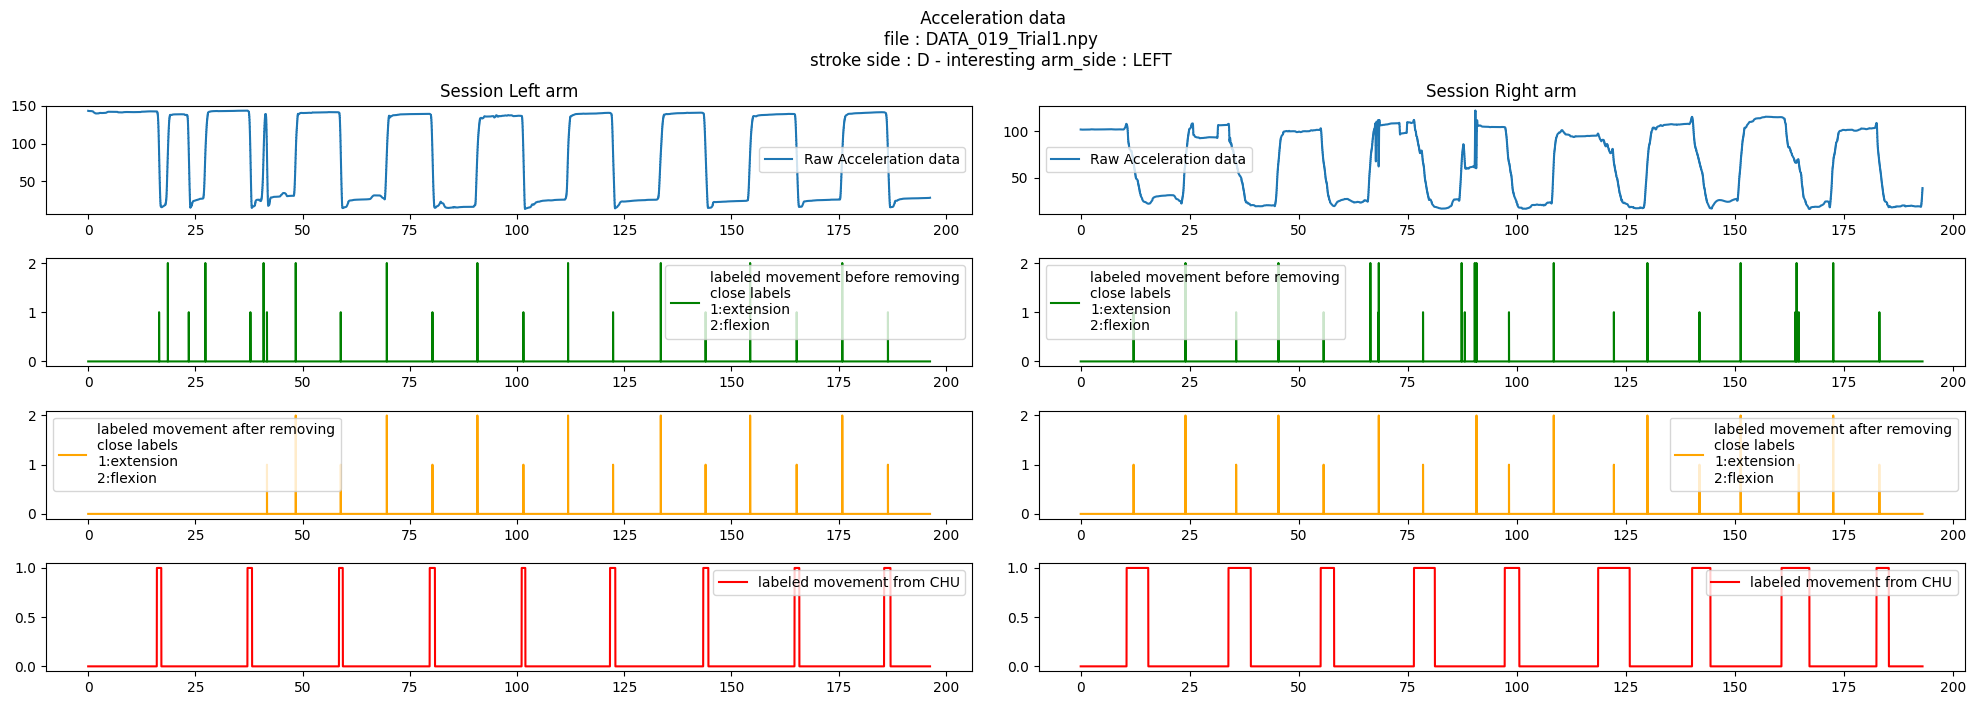

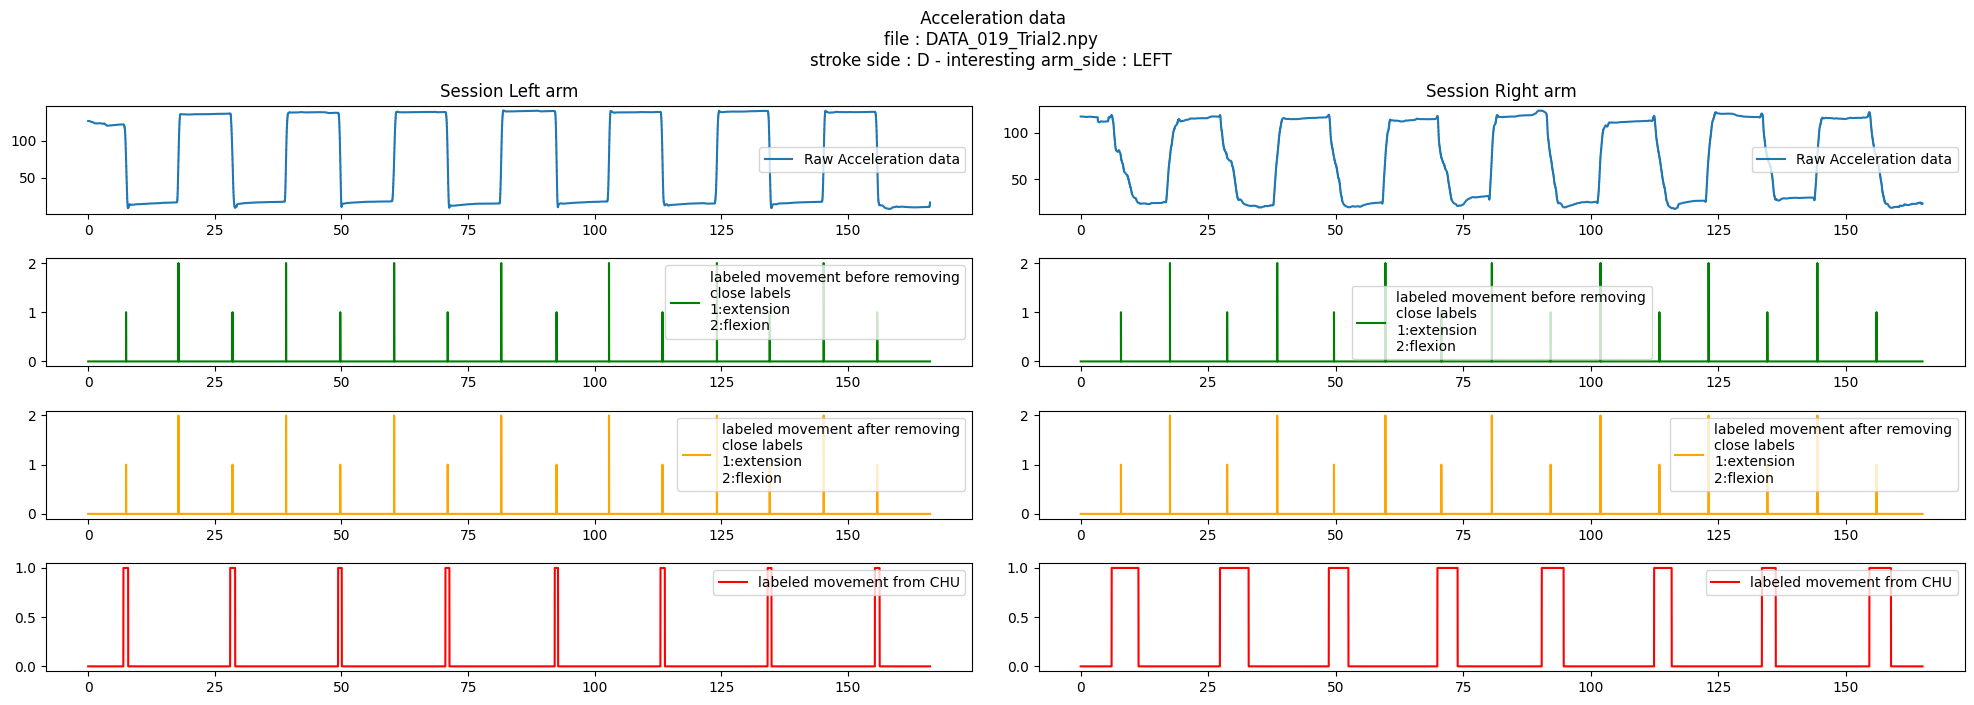

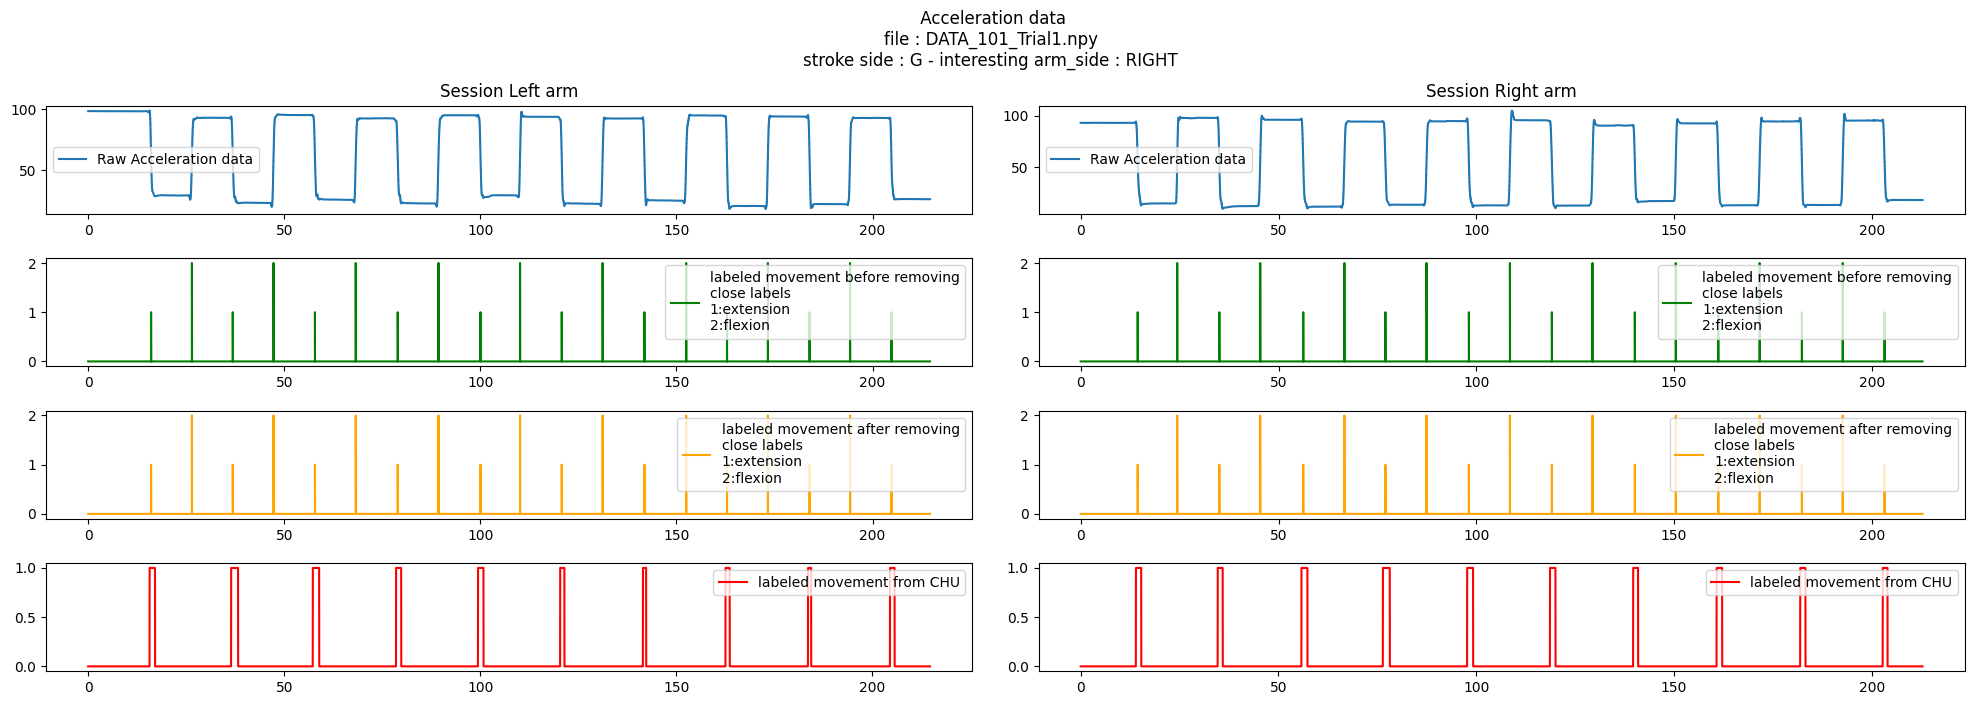

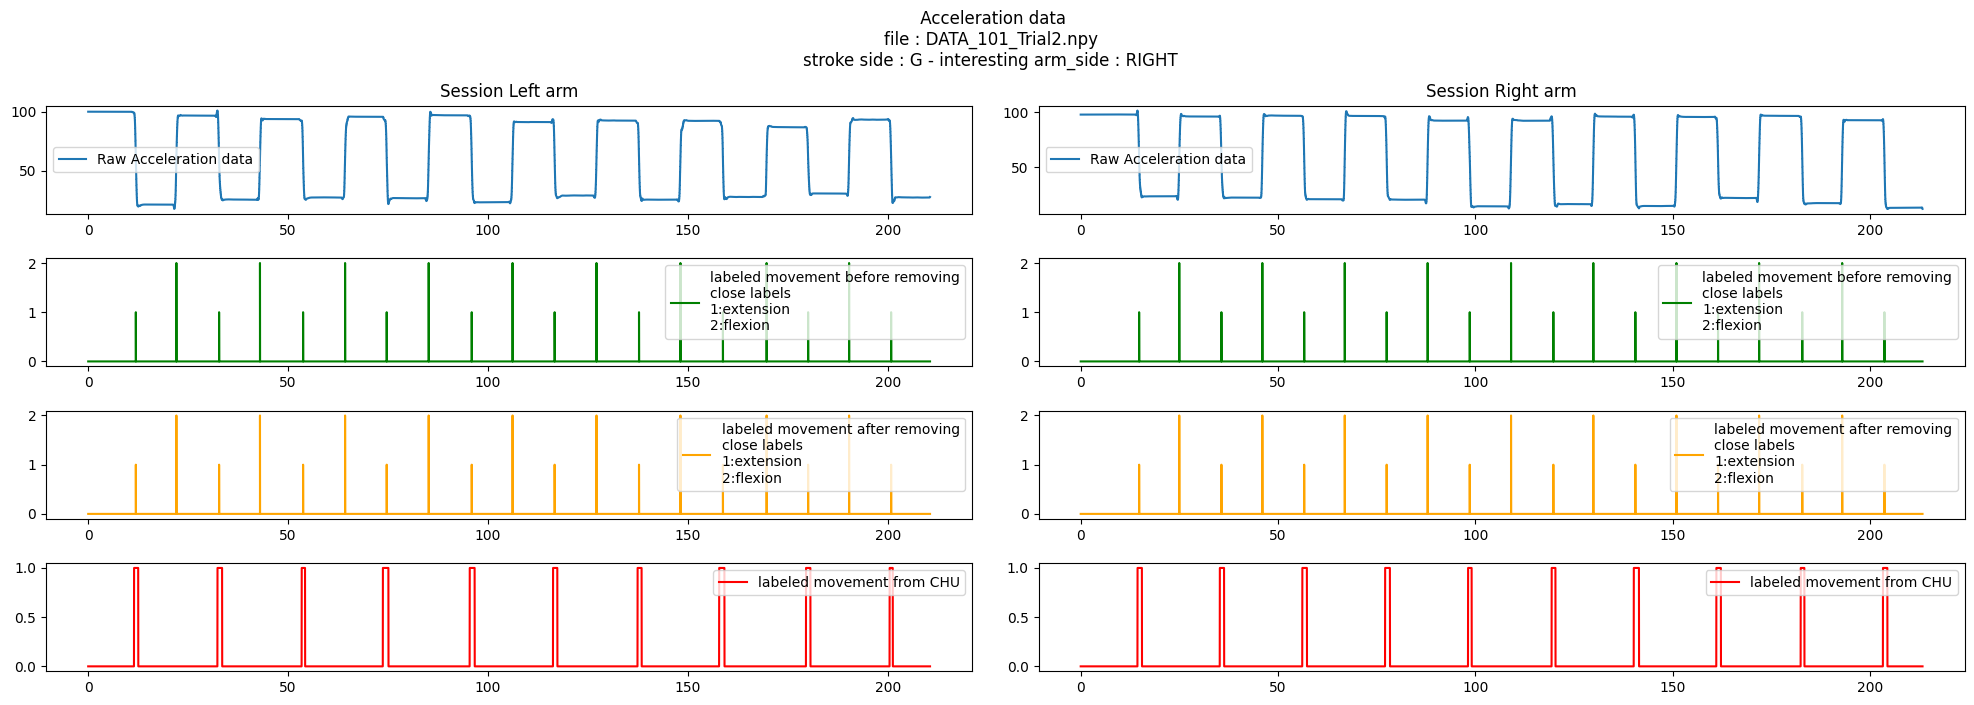

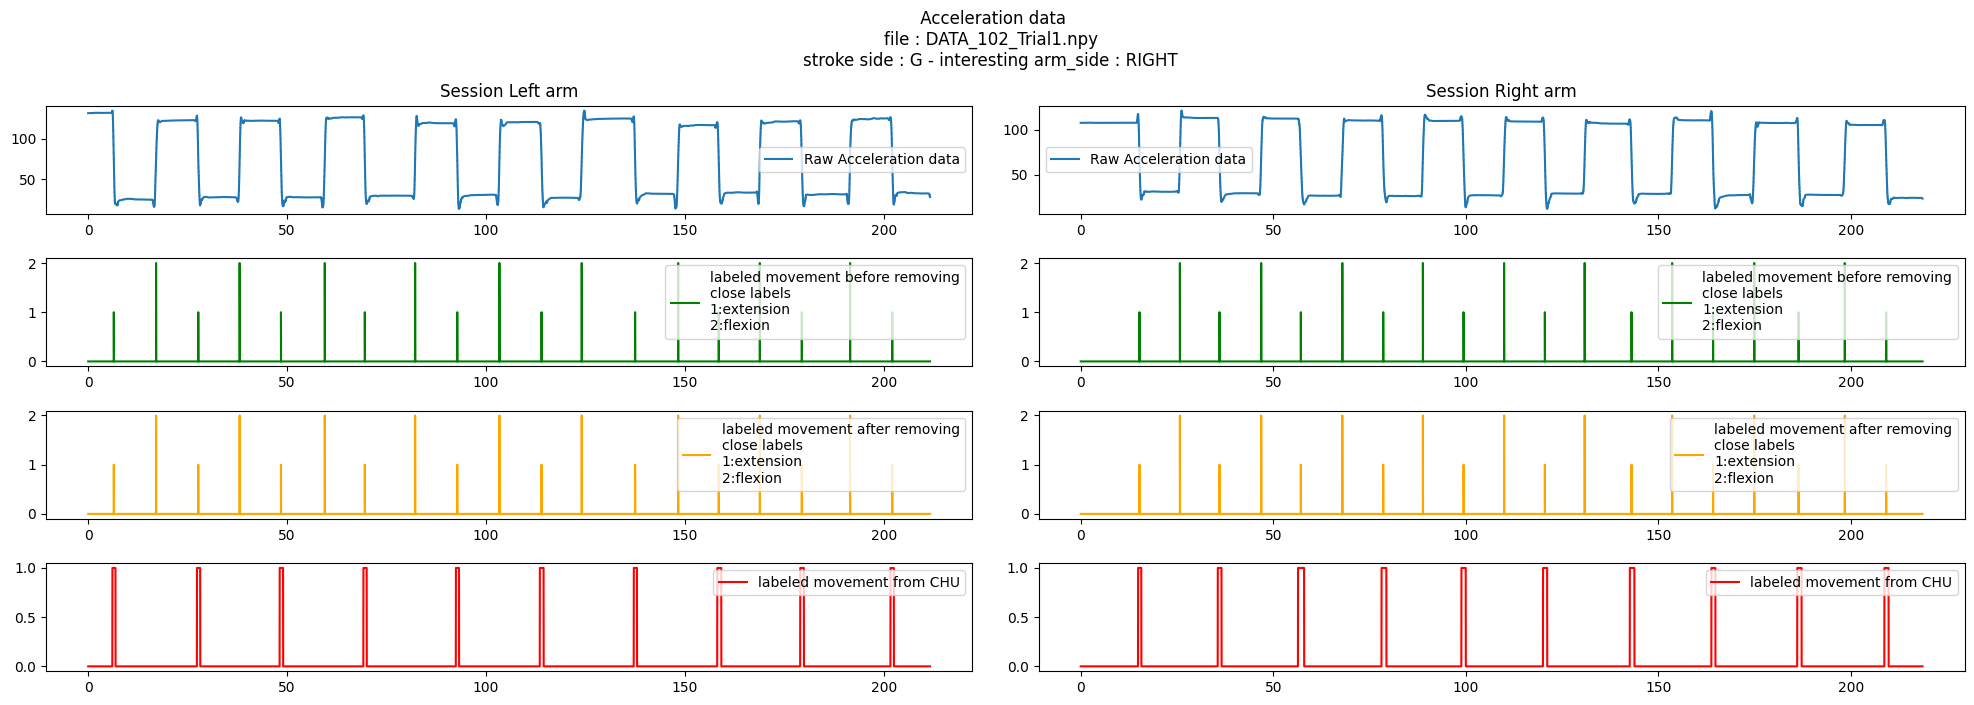

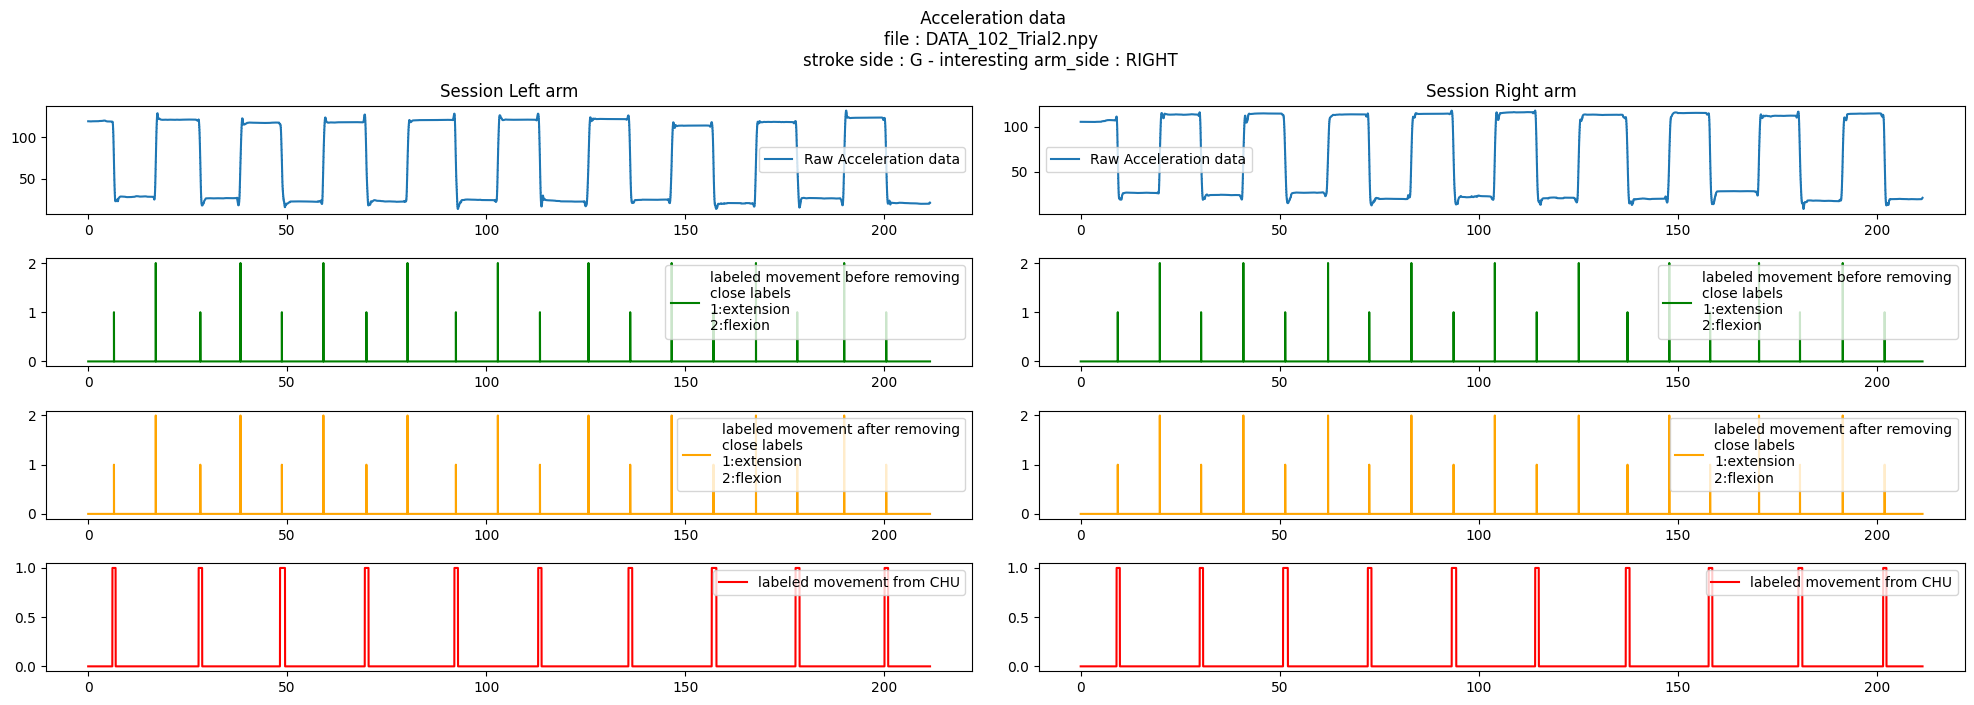

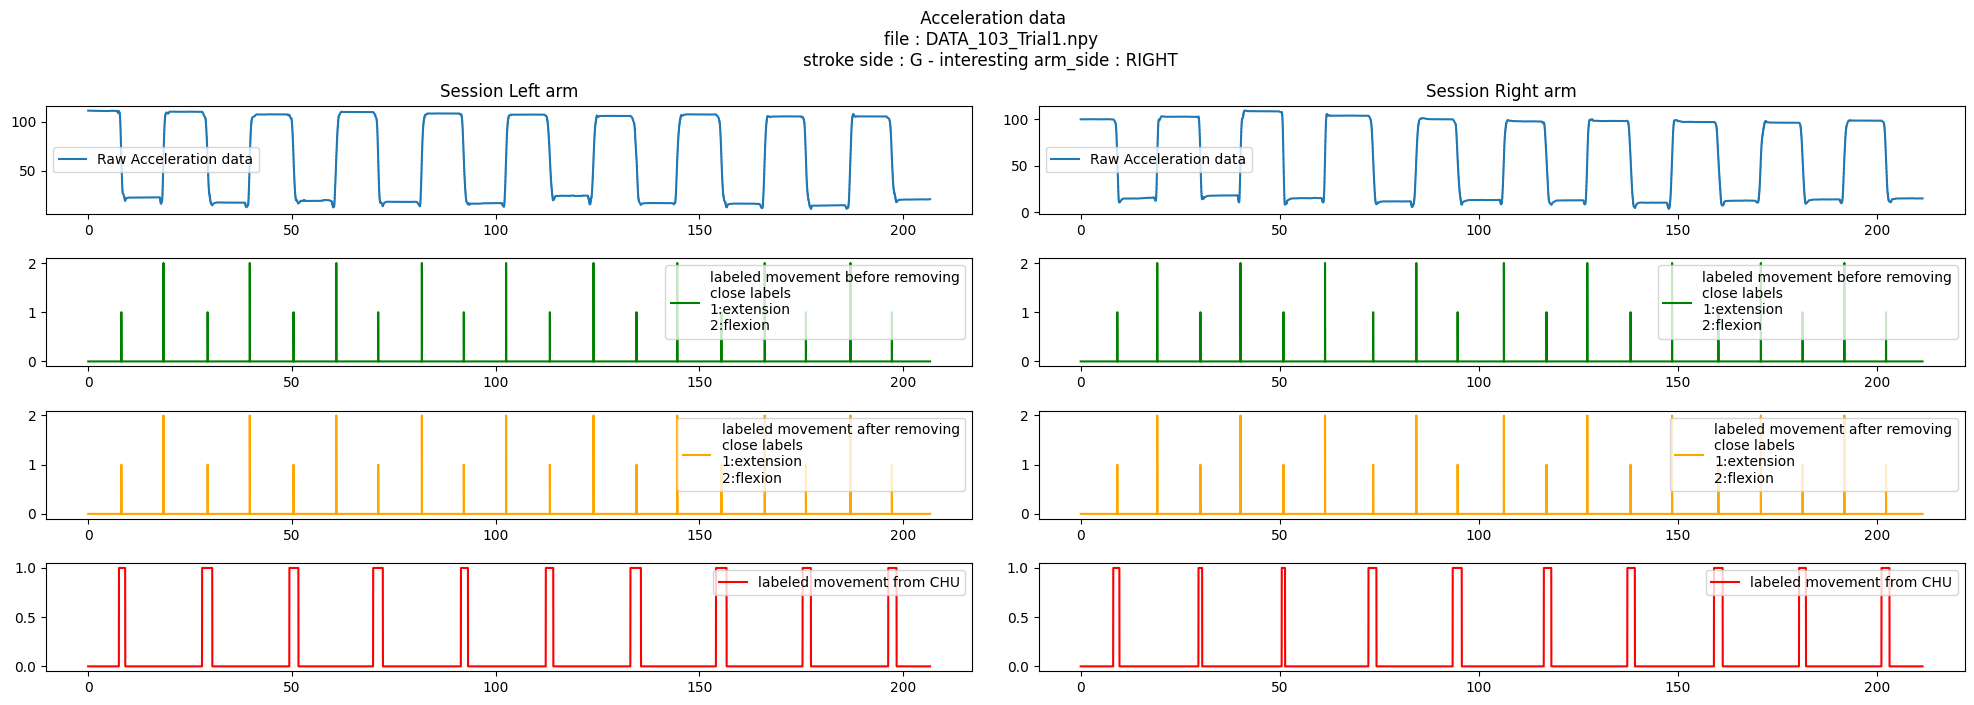

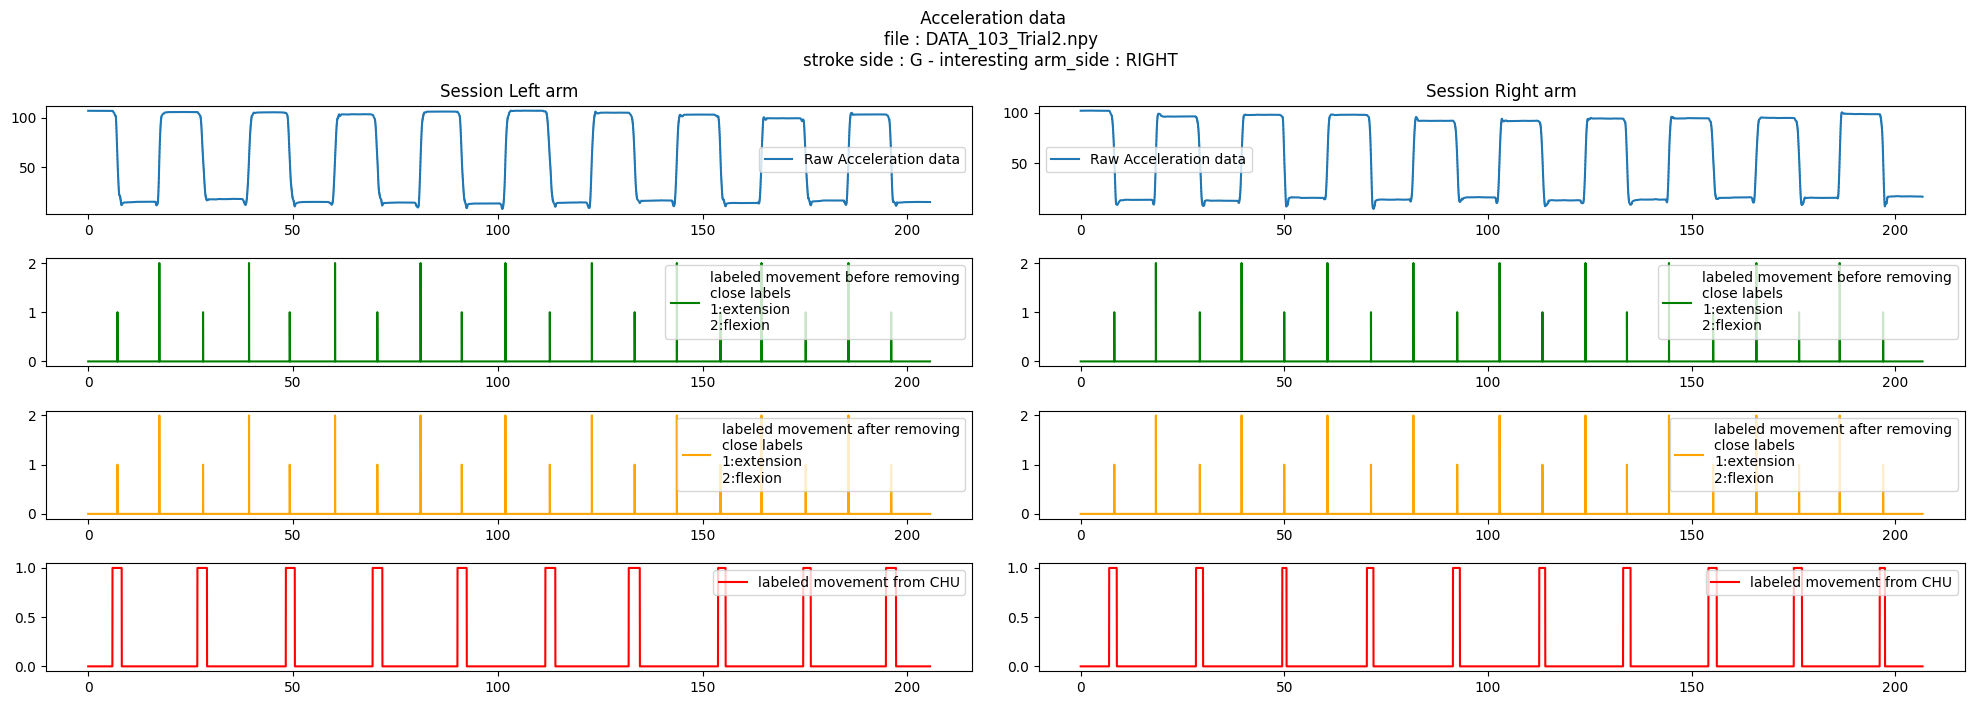

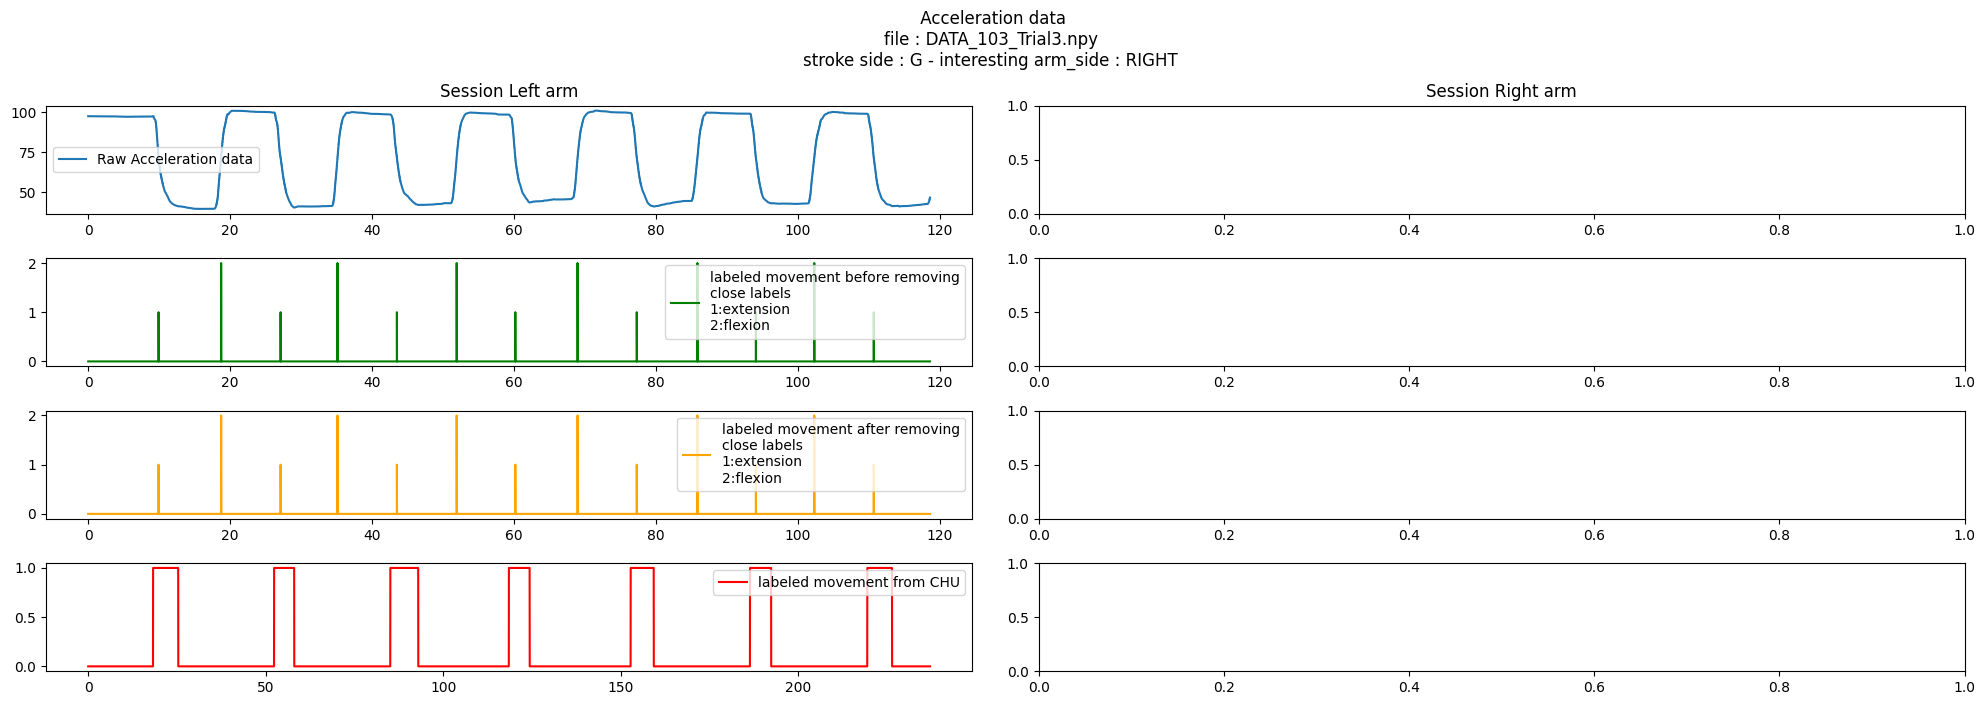

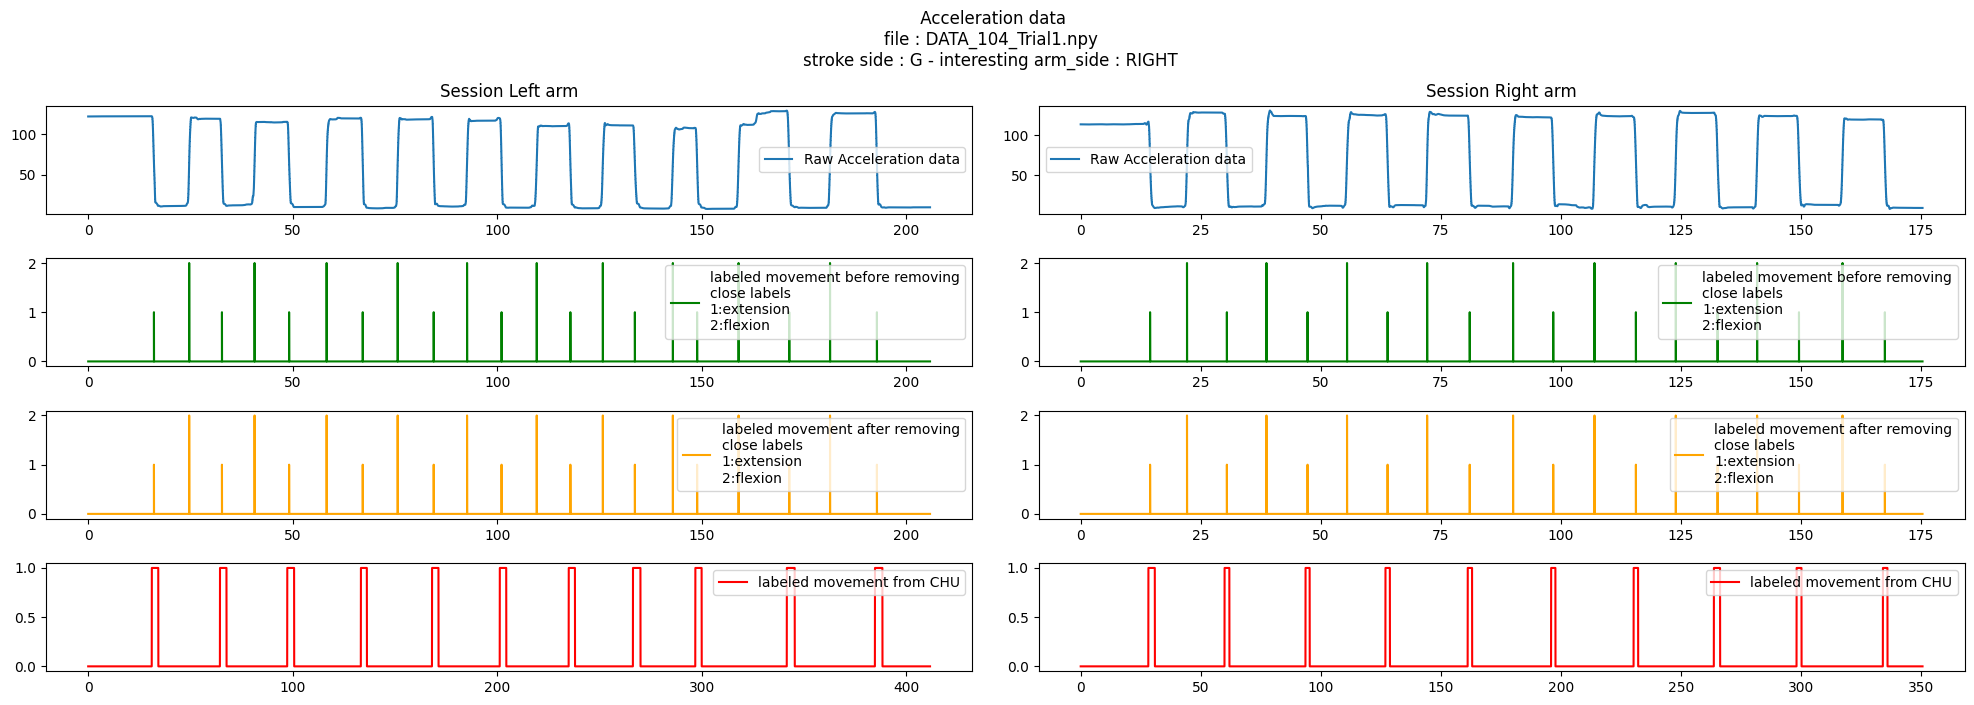

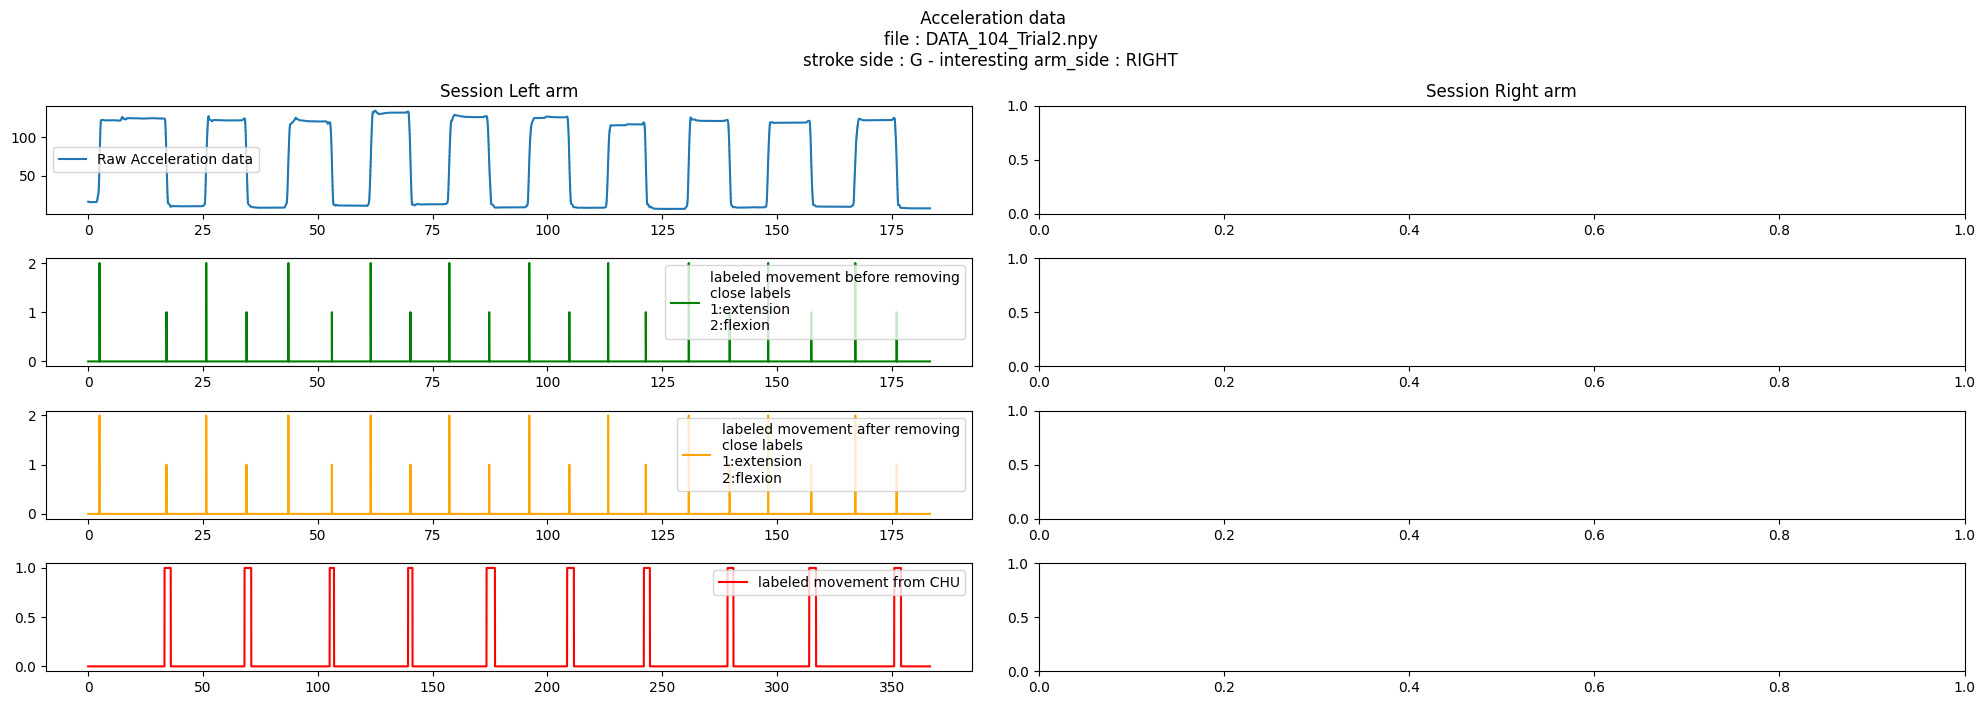

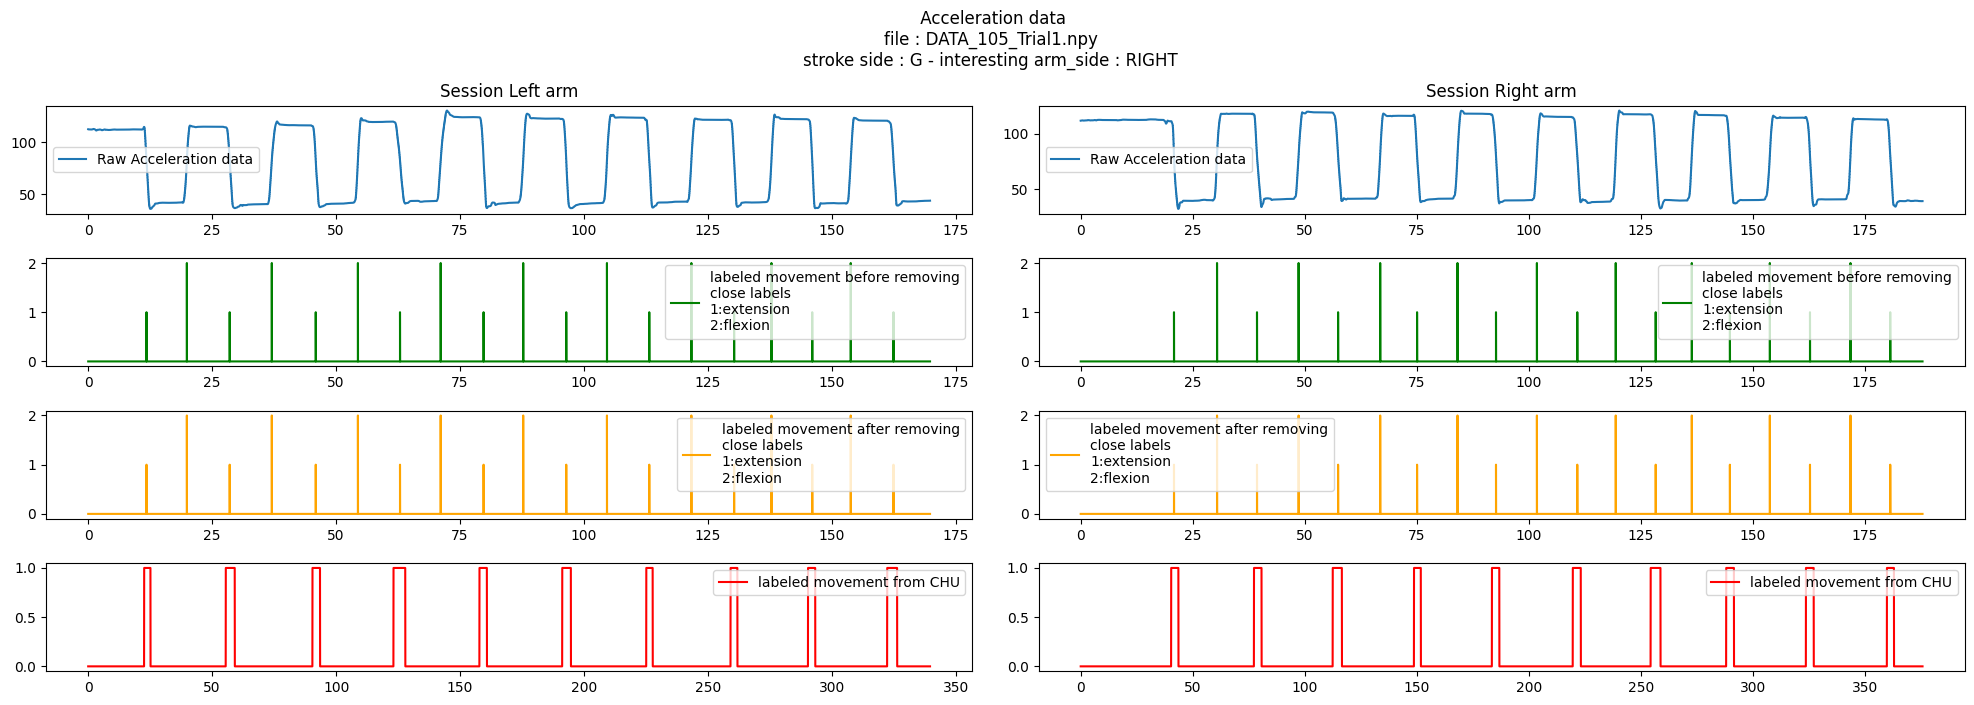

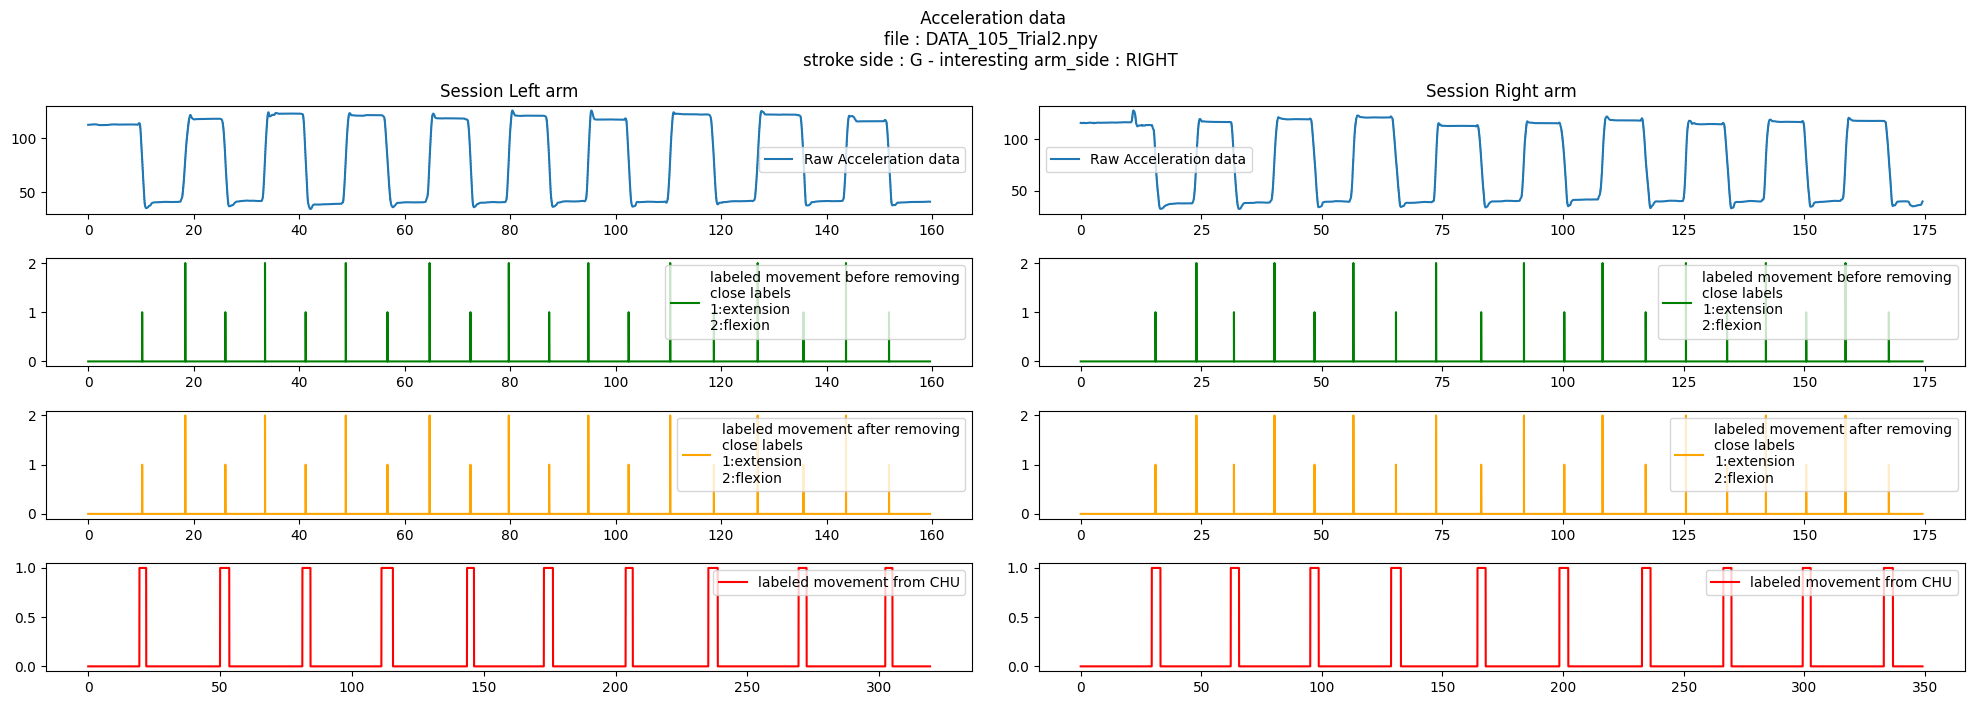

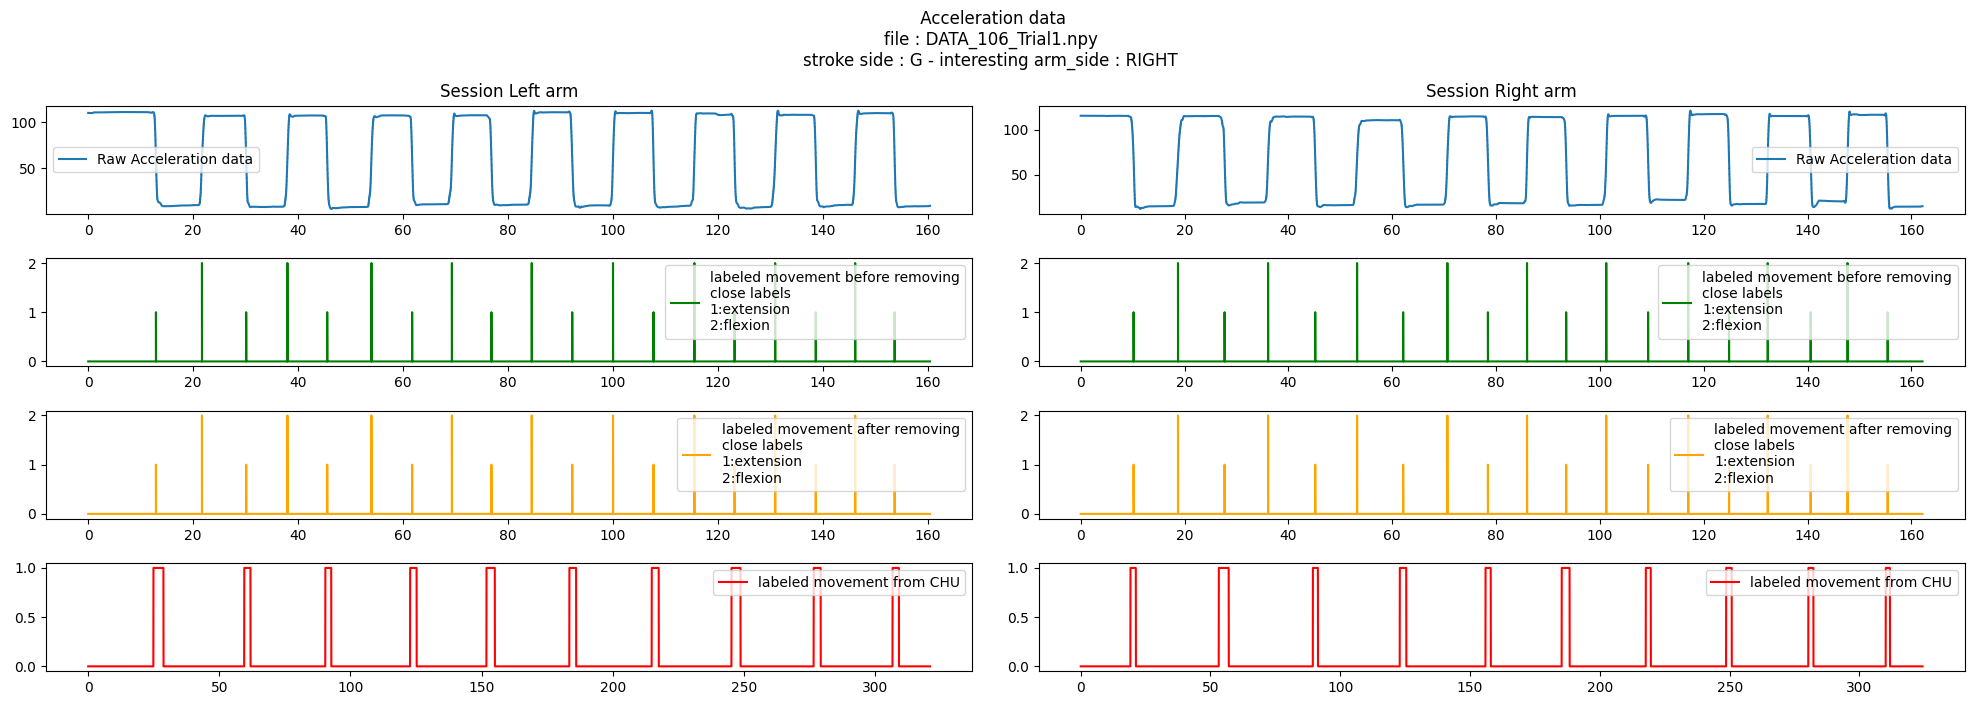

KeyboardInterrupt: 

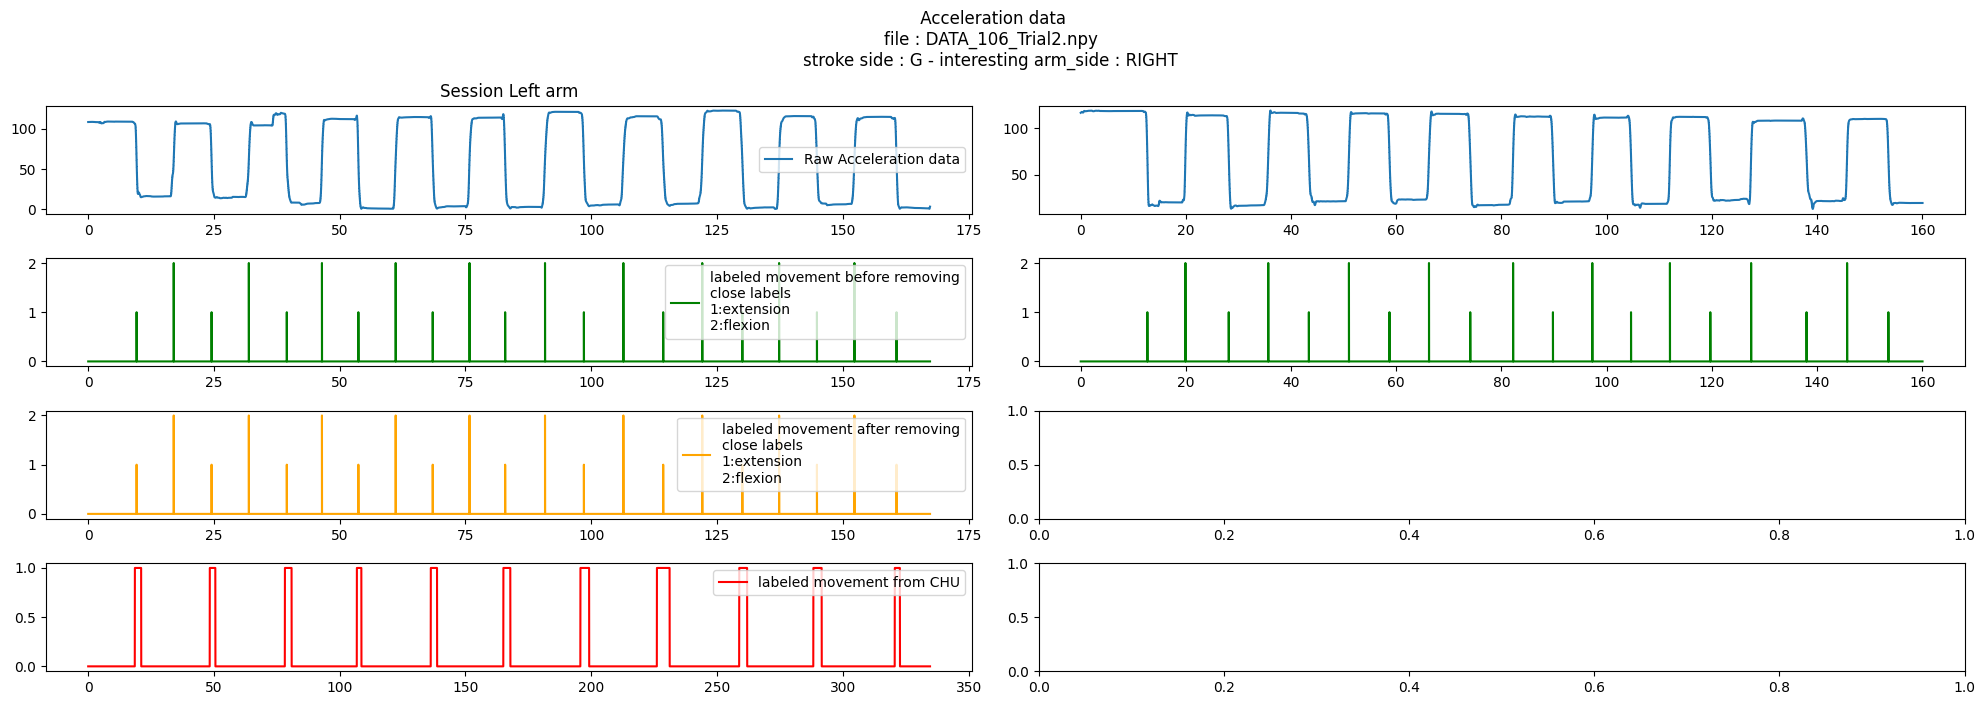

In [3]:
for file in FILE_PATH_LIST[:]:

    # Loading data from npy file using DataLoader class (built in class for the PIE data)
    data_loader = DataLoader(file)
    raws_left = data_loader.get_raws(side='G')
    raws_right = data_loader.get_raws(side='D')

    stroke = data_loader.stroke_side
    arm_side = 'LEFT' if stroke == 'D' else 'RIGHT'

    fig, ax = plt.subplots(4, 2, figsize=(20, 7))
    fig.suptitle(f' Acceleration data\nfile : {file.split("/")[-1]}\nstroke side : {stroke} - interesting arm_side : {arm_side}', y=1.00)
    fig.tight_layout()

    if raws_left is not None:
        # Displaying raw acceleration data
        time_left, data_left = raws_left['AC'][1], raws_left['AC'][0][0]
        ax[0,0].plot(time_left, data_left, label='Raw Acceleration data')

        # Displaying extracted movement time from AC raw data -> still some noise in the labels extracted
        data_left_modified = data_left.copy()
        data_left_modified = fill_with_last_non_nan(data_left_modified)
        data_left_modified = acc_to_movement(data_left_modified)
        ax[1,0].plot(time_left, data_left_modified, label='labeled movement before removing\nclose labels\n1:extension\n2:flexion', c='green')

        # Displaying extracted movement time from AC raw data noise removed by removing close labels (keeping only the last of the close labels)
        data_left_modified = remove_close_labels_all(data_left_modified)
        ax[2,0].plot(time_left, data_left_modified, label='labeled movement after removing\nclose labels\n1:extension\n2:flexion', c='orange')

        # Displaying movement time labeled by CHU (only accessing extension)
        data_left_original = data_loader.cinematic_signals_left_arm['AC']
        time_left_raw = np.arange(len(data_left_original)) / 125
        mvt_index_left_arm = data_loader.movement_index_left_arm
        mvt_left_arm = np.zeros(len(data_left_original))
        mvt_left_arm[mvt_index_left_arm] = 1
        ax[3,0].plot(time_left_raw, mvt_left_arm, label='labeled movement from CHU', c='red')
        [ax[i,0].legend() for i in range(4)]

    ax[0,0].set_title('Session Left arm')
    

    if raws_right is not None:
        time_right, data_right = raws_right['AC'][1], raws_right['AC'][0][0]
        ax[0,1].plot(time_right, data_right, label='Raw Acceleration data')
        
        data_right_modified = data_right.copy()
        data_right_modified = fill_with_last_non_nan(data_right_modified)
        data_right_modified = acc_to_movement(data_right_modified)
        ax[1,1].plot(time_right, data_right_modified, label='labeled movement before removing\nclose labels\n1:extension\n2:flexion', c='green')

        data_right_modified = remove_close_labels_all(data_right_modified)
        ax[2,1].plot(time_right, data_right_modified, label='labeled movement after removing\nclose labels\n1:extension\n2:flexion', c='orange')

        data_right_original = data_loader.cinematic_signals_right_arm['AC']
        time_right_raw = np.arange(len(data_right_original)) / 125
        mvt_index_right_arm = data_loader.movement_index_right_arm
        mvt_right_arm = np.zeros(len(data_right_original))
        mvt_right_arm[mvt_index_right_arm] = 1
        ax[3,1].plot(time_right_raw, mvt_right_arm, label='labeled movement from CHU', c='red')
        [ax[i,1].legend() for i in range(4)]

    ax[0,1].set_title('Session Right arm')
    

    plt.show()

